## With in-sample test and out-of-sample forecasts

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Obtain OHLC data from Yahoo Finance

In [2]:
import yfinance as yf

In [3]:
start_date = '2004-11-29'
end_date = '2020-04-06'

In [4]:
tickers = ['EEM', 'EFA', 'GLD', 'IYR', 'TLT']

In [5]:
# Get data
assets = yf.download(tickers, start=start_date, end=end_date, interval='1wk').dropna()
bm = yf.download('IWB', start=start_date, end=end_date, interval='1wk').dropna()
rf = yf.download('^IRX', start=start_date, end=end_date, interval='1wk').dropna()
spx = yf.download('^GSPC', start=start_date, end=end_date, interval='1wk').dropna()
vix = yf.download('^VIX', start=start_date, end=end_date, interval='1wk').dropna()
tb_10 = yf.download('^TNX', start=start_date, end=end_date, interval='1wk').dropna()

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
assets

Adj Close                                                \
                  EEM        EFA         GLD        IYR         TLT   
Date                                                                  
2004-11-29  16.216082  34.008682   45.599998  32.357956   52.040035   
2004-12-06  15.586849  33.125443   43.439999  32.690216   53.095985   
2004-12-13  16.072138  33.528469   44.189999  32.676926   53.036236   
2004-12-20  16.346045  33.828598   44.270000  32.320759   52.940662   
2004-12-27  16.805626  34.881714   43.799999  33.089478   52.916718   
...               ...        ...         ...        ...         ...   
2020-03-02  40.130001  61.750000  157.550003  90.595863  166.283859   
2020-03-09  36.139999  52.910000  143.279999  80.374481  153.717911   
2020-03-16  31.360001  47.049999  140.110001  60.337811  159.199982   
2020-03-23  33.349998  52.860001  152.250000  69.529121  167.458054   
2020-03-30  33.130001  50.900002  152.649994  64.239998  168.256912   

                Close                                                ...  \
                  EEM        EFA         GLD        IYR         TLT  ...   
Date                                                                 ...   
2004-11-29  21.905556  52.880001   45.599998  60.869999   87.440002  ...   
2004-12-06  21.055555  51.506668   43.439999  61.494999   88.849998  ...   
2004-12-13  21.711111  52.133335   44.189999  61.470001   88.750000  ...   
2004-12-20  22.081112  52.599998   44.270000  60.799999   88.589996  ...   
2004-12-27  22.427778  53.416668   43.799999  61.599998   88.550003  ...   
...               ...        ...         ...        ...         ...  ...   
2020-03-02  40.130001  61.750000  157.550003  91.470001  166.770004  ...   
2020-03-09  36.139999  52.910000  143.279999  81.150002  153.940002  ...   
2020-03-16  31.360001  47.049999  140.110001  60.919998  159.429993  ...   
2020-03-23  33.349998  52.860001  152.250000  70.199997  167.699997  ...   
2020-03-30  33.130001  50.900002  152.649994  64.239998  168.500000  ...   

                 Open                                                \
                  EEM        EFA         GLD        IYR         TLT   
Date                                                                  
2004-11-29  21.788889  52.283333   45.099998  59.000000   87.470001   
2004-12-06  21.888889  52.696667   45.389999  60.924999   87.489998   
2004-12-13  21.266666  51.950001   43.610001  61.474998   88.820000   
2004-12-20  21.944445  52.880001   44.330002  61.384998   88.870003   
2004-12-27  22.144444  52.896667   44.290001  61.250000   88.330002   
...               ...        ...         ...        ...         ...   
2020-03-02  40.639999  62.230000  150.000000  88.489998  155.300003   
2020-03-09  37.230000  57.630001  158.600006  85.150002  179.100006   
2020-03-16  32.000000  46.590000  137.559998  72.849998  160.380005   
2020-03-23  31.059999  47.340000  142.679993  60.660000  157.500000   
2020-03-30  33.470001  53.049999  152.410004  70.790001  168.300003   

                 Volume                                                     
                    EEM          EFA          GLD         IYR          TLT  
Date                                                                        
2004-11-29   20484000.0   13353600.0   20329800.0   8934200.0   10905900.0  
2004-12-06   12392100.0   10113300.0   19066000.0   6154200.0    7612000.0  
2004-12-13    9791100.0   13519500.0   11486200.0   3793600.0    8075100.0  
2004-12-20    9610200.0   14902800.0    6661100.0   4321800.0    1725900.0  
2004-12-27    7321500.0   18855900.0   10870100.0   3538600.0    4826400.0  
...                 ...          ...          ...         ...          ...  
2020-03-02  568496900.0  308680500.0  102245500.0  83508300.0  184298600.0  
2020-03-09  723560100.0  420925400.0  129910700.0  71413400.0  152975100.0  
2020-03-16  464210800.0  312753400.0  111824600.0  53874900.0  138167000.0  
2020-03-23  425967600.0  28711630

In [7]:
# Check if there is any NaN
print(assets.isnull().any().any(), bm.isnull().any().any(), rf.isnull().any().any(), spx.isnull().any().any(), vix.isnull().any().any(), tb_10.isnull().any().any(), sep='\n')

False
False
False
False
False
False


C:\Users\Stephen\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


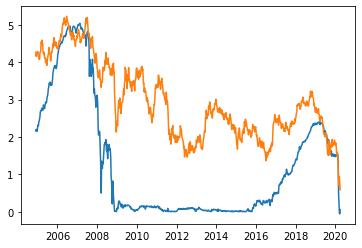

In [8]:
plt.plot(rf['Adj Close'])
plt.plot(tb_10['Adj Close'])

In [9]:
# Convert the annualized rate to weekly rate
rf['Adj Close'] = rf['Adj Close']/5200
rf['Close'] = rf['Close']/5200
rf['Open'] = rf['Open']/5200
rf['High'] = rf['High']/5200
rf['Low'] = rf['Low']/5200

tb_10['Adj Close'] = tb_10['Adj Close']/5200
tb_10['Close'] = tb_10['Close']/5200
tb_10['Open'] = tb_10['Open']/5200
tb_10['High'] = tb_10['High']/5200
tb_10['Low'] = tb_10['Low']/5200

In [10]:
rf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-11-29,0.000414,0.000421,0.000413,0.000417,0.000417,0
2004-12-06,0.000418,0.000424,0.000417,0.000423,0.000423,0
2004-12-13,0.000424,0.000425,0.000412,0.000414,0.000414,0
2004-12-20,0.000414,0.000418,0.000413,0.000413,0.000413,0
2004-12-27,0.000414,0.000436,0.000414,0.000420,0.000420,0


In [11]:
tb_10.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-11-29,0.000812,0.000850,0.000812,0.000821,0.000821,0
2004-12-06,0.000816,0.000819,0.000791,0.000799,0.000799,0
2004-12-13,0.000796,0.000817,0.000782,0.000809,0.000809,0
2004-12-20,0.000806,0.000813,0.000802,0.000811,0.000811,0
2004-12-27,0.000815,0.000836,0.000811,0.000811,0.000811,0


## Compute excess returns

In [12]:
# Create matrices for prices
AdjClose = assets['Adj Close']
bm_AdjClose = bm['Adj Close']
rf_AdjClose = rf['Adj Close']

In [13]:
AdjClose.head()

,EEM,EFA,GLD,IYR,TLT
Date,,,,,
2004-11-29,16.216082,34.008682,45.599998,32.357956,52.040035
2004-12-06,15.586849,33.125443,43.439999,32.690216,53.095985
2004-12-13,16.072138,33.528469,44.189999,32.676926,53.036236
2004-12-20,16.346045,33.828598,44.270000,32.320759,52.940662
2004-12-27,16.805626,34.881714,43.799999,33.089478,52.916718


In [14]:
print(AdjClose.shape, bm_AdjClose.shape, rf_AdjClose.shape, sep='\n')

(801, 5)
(801,)
(801,)


In [15]:
# Create a matrix for returns
ret = AdjClose.pct_change()
ret.shape

(801, 5)

In [16]:
ret.head()

,EEM,EFA,GLD,IYR,TLT
Date,,,,,
2004-11-29,NaN,NaN,NaN,NaN,NaN
2004-12-06,-0.038803,-0.025971,-0.047368,0.010268,0.020291
2004-12-13,0.031134,0.012167,0.017265,-0.000407,-0.001125
2004-12-20,0.017042,0.008951,0.001810,-0.010900,-0.001802
2004-12-27,0.028116,0.031131,-0.010617,0.023784,-0.000452


In [17]:
# Create benchmark returns
bm_ret = bm_AdjClose.pct_change()

In [18]:
# Create risk-free rate returns
rf_ret = rf_AdjClose

In [19]:
# Create excess returns
xs_ret = pd.DataFrame(np.full(ret.shape, np.nan), index=ret.index, columns=tickers)
for i in range(xs_ret.shape[1]):
    xs_ret.iloc[:, i] = ret.iloc[:, i].sub(rf_ret)
xs_ret.shape

(801, 5)

In [20]:
xs_ret.head()

,EEM,EFA,GLD,IYR,TLT
Date,,,,,
2004-11-29,NaN,NaN,NaN,NaN,NaN
2004-12-06,-0.039226,-0.026394,-0.047792,0.009845,0.019868
2004-12-13,0.030721,0.011753,0.016851,-0.000820,-0.001539
2004-12-20,0.016629,0.008539,0.001398,-0.011313,-0.002215
2004-12-27,0.027696,0.030711,-0.011036,0.023364,-0.000872


In [21]:
# Create excess benchmark returns
xs_bm_ret = bm_ret.sub(rf_ret)
xs_bm_ret.shape

(801,)

In [22]:
xs_bm_ret.head()

Date
2004-11-29         NaN
2004-12-06   -0.003381
2004-12-13    0.007236
2004-12-20    0.006869
2004-12-27    0.004654
Name: Adj Close, dtype: float64

In [23]:
cum_ret = xs_ret.cumsum()
cum_ret = cum_ret.fillna(0)

In [24]:
cum_ret.head()

,EEM,EFA,GLD,IYR,TLT
Date,,,,,
2004-11-29,0.000000,0.000000,0.000000,0.000000,0.000000
2004-12-06,-0.039226,-0.026394,-0.047792,0.009845,0.019868
2004-12-13,-0.008506,-0.014641,-0.030940,0.009025,0.018329
2004-12-20,0.008124,-0.006103,-0.029543,-0.002288,0.016114
2004-12-27,0.035820,0.024608,-0.040579,0.021077,0.015242


In [25]:
print(cum_ret.min(), cum_ret.max(), sep='\n')

EEM   -0.039226
EFA   -0.387087
GLD   -0.097502
IYR   -0.731229
TLT   -0.032738
dtype: float64
EEM    1.404104
EFA    0.843324
GLD    1.390994
IYR    1.385495
TLT    1.117738
dtype: float64


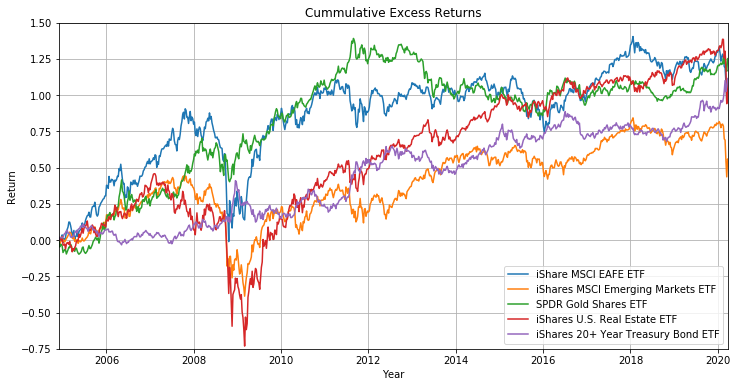

In [256]:
plt.figure(figsize=(12, 6))

plt.plot(cum_ret.EEM, label='iShare MSCI EAFE ETF')
plt.plot(cum_ret.EFA, label='iShares MSCI Emerging Markets ETF')
plt.plot(cum_ret.GLD, label='SPDR Gold Shares ETF')
plt.plot(cum_ret.IYR, label='iShares U.S. Real Estate ETF')
plt.plot(cum_ret.TLT, label='iShares 20+ Year Treasury Bond ETF')
plt.xlim(cum_ret.index[0], cum_ret.index[-1])
plt.ylim(-0.75, 1.5)
plt.xlabel('Year')
plt.ylabel('Return')
plt.title('Cummulative Excess Returns')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('figure1.png', bbox_inches='tight')

## Compute various decriptive statistics and performs statistical tests on excess returns

In [27]:
xs_ret = xs_ret.iloc[1:,]
xs_ret

,EEM,EFA,GLD,IYR,TLT
Date,,,,,
2004-12-06,-0.039226,-0.026394,-0.047792,0.009845,0.019868
2004-12-13,0.030721,0.011753,0.016851,-0.000820,-0.001539
2004-12-20,0.016629,0.008539,0.001398,-0.011313,-0.002215
2004-12-27,0.027696,0.030711,-0.011036,0.023364,-0.000872
2005-01-03,-0.051862,-0.031639,-0.045187,-0.054902,0.003257
...,...,...,...,...,...
2020-03-02,-0.009705,-0.007953,0.061721,0.046488,0.073708
2020-03-09,-0.099474,-0.143205,-0.090621,-0.112871,-0.075616
2020-03-16,-0.132257,-0.110748,-0.022118,-0.249285,0.035670


In [28]:
# Descriptive statistics
assets_ds = xs_ret.describe()

In [29]:
from scipy import stats

In [30]:
# Skewness
assets_skew = pd.Series(stats.skew(xs_ret), index=tickers, name='skewness')
assets_ds = assets_ds.append(assets_skew)

In [31]:
# Kurtosis
assets_kurt = pd.Series(stats.kurtosis(xs_ret), index=tickers, name='kurtosis')
assets_ds = assets_ds.append(assets_kurt)

In [32]:
# Higher moments
moment_4 = pd.Series(stats.moment(xs_ret, 4), index=tickers, name='Moment of order 4')
moment_6 = pd.Series(stats.moment(xs_ret, 6), index=tickers, name='Moment of order 6')
moment_8 = pd.Series(stats.moment(xs_ret, 8), index=tickers, name='Moment of order 8')
print(pd.concat([moment_4, moment_6, moment_8], axis=1))

     Moment of order 4  Moment of order 6  Moment of order 8
EEM       1.648210e-05       8.131491e-07       5.569229e-08
EFA       5.591565e-06       1.279344e-07       4.390459e-09
GLD       1.872741e-06       1.474319e-08       1.903851e-10
IYR       2.096002e-05       7.639330e-07       3.521199e-08
TLT       6.113981e-07       2.337720e-09       1.235919e-11


In [33]:
# Normality tests
jb_stat = pd.Series(np.full(xs_ret.shape[1], np.nan), index=tickers, name='JB-stat')
p_normal = pd.Series(np.full(xs_ret.shape[1], np.nan), index=tickers, name='P-value')
for i in range(xs_ret.shape[1]):
     jb_stat[i], p_normal[i] = stats.jarque_bera(xs_ret.iloc[:, i])
assets_ds = assets_ds.append(jb_stat)

In [34]:
# Sharpe ratio
assets_ds.loc['Sharpe Ratio'] = assets_ds.loc['mean']/assets_ds.loc['std']

In [35]:
assets_ds

,EEM,EFA,GLD,IYR,TLT
count,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.001266,0.000653,0.001567,0.001271,0.001397
std,0.035109,0.027838,0.024514,0.036101,0.018703
min,-0.200887,-0.204249,-0.092201,-0.249285,-0.075616
25%,-0.017089,-0.011212,-0.011987,-0.013378,-0.009627
50%,0.001857,0.002069,0.003058,0.003829,0.002233
75%,0.020836,0.014975,0.016316,0.017988,0.012454
max,0.282964,0.125706,0.137877,0.218689,0.088012
skewness,0.059535,-0.797988,-0.161541,-0.243253,0.017652
kurtosis,7.875108,6.334249,2.198694,9.371073,2.009239


In [36]:
# Maximum drawdown
def max_dd(returns):  # Pavan's way
    cr = returns.cumsum()  # calculate cumulative returns
    dd = cr.cummax() - cr  # calculate drawdown
    mdd = dd.max()
    end = dd.idxmax().strftime('%x')
    start = cr.loc[:end].idxmax().strftime('%x')
    return mdd, start, end

In [37]:
MDD = list(np.full(xs_ret.shape[1], np.nan))
MDDs = list(np.full(xs_ret.shape[1], np.nan))
MDDe = list(np.full(xs_ret.shape[1], np.nan))
for i in range(xs_ret.shape[1]):
    MDD[i], MDDs[i], MDDe[i] = max_dd(xs_ret.iloc[:, i])
MDDinfo = pd.DataFrame([MDD, MDDs, MDDe], index=['MDD', 'MDD Start Date', 'MDD End Date'], columns=tickers)
assets_ds = assets_ds.append(MDDinfo)

In [38]:
assets_ds

,EEM,EFA,GLD,IYR,TLT
count,800,800,800,800,800
mean,0.00126624,0.000653049,0.00156734,0.00127129,0.00139717
std,0.0351088,0.0278378,0.0245142,0.0361009,0.0187029
min,-0.200887,-0.204249,-0.0922011,-0.249285,-0.075616
25%,-0.017089,-0.0112119,-0.0119868,-0.0133783,-0.0096271
50%,0.001857,0.00206858,0.00305767,0.00382856,0.00223275
75%,0.0208363,0.0149748,0.0163156,0.0179885,0.0124539
max,0.282964,0.125706,0.137877,0.218689,0.0880121
skewness,0.0595351,-0.797988,-0.161541,-0.243253,0.0176522
kurtosis,7.87511,6.33425,2.19869,9.37107,2.00924


In [39]:
import statsmodels.api as sm

In [40]:
# Autocorrelation
acf = []
for i in range(xs_ret.shape[1]):
    acf.append(sm.tsa.acf(xs_ret.iloc[:, i], nlags=5))
acf = pd.DataFrame(acf, index=tickers, columns=['ACF(0)', 'ACF(1)', 'ACF(2)', 'ACF(3)', 'ACF(4)', 'ACF(5)'])
acf

C:\Users\Stephen\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


,ACF(0),ACF(1),ACF(2),ACF(3),ACF(4),ACF(5)
EEM,1.0,-0.065461,0.030835,-0.042681,0.006101,-0.013966
EFA,1.0,-0.059904,0.013252,-0.010904,-0.013917,0.011022
GLD,1.0,-0.003216,-0.035578,-0.015784,-0.008465,-0.052498
IYR,1.0,-0.103495,-0.009383,0.114389,-0.087644,-0.002951
TLT,1.0,-0.097736,0.067455,-0.002395,0.083066,-0.056234


In [41]:
# Ljun-Box Q test
resid = xs_ret.sub(xs_ret.mean())
lbqtest = []
for i in range(resid.shape[1]):
    lbqtest.append(sm.stats.acorr_ljungbox(resid.iloc[:, i], lags=[5, 10, 15])[0])
lbqtest = pd.DataFrame(lbqtest, index=tickers, columns=['LB-Q(5)', 'LB-Q(10)', 'LB-Q(15)'])
lbqtest

C:\Users\Stephen\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


,LB-Q(5),LB-Q(10),LB-Q(15)
EEM,5.859353,14.734366,24.112698
EFA,3.372639,12.820807,27.677069
GLD,3.508559,7.726928,16.363733
IYR,25.404052,32.809230,45.517967
TLT,19.447229,23.951575,26.631893


In [42]:
# ARCH test of Engle
archtest = []
for i in range(resid.shape[1]):
    archtest.append(sm.stats.het_arch(resid.iloc[:, i])[0])
archtest = pd.DataFrame(archtest, index=tickers, columns=['Engle\'s ARCH'])
archtest

C:\Users\Stephen\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:625: FutureWarning: The default value of nlags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setmaxlags or period to silence this warning.
  FutureWarning)


,Engle's ARCH
EEM,206.974050
EFA,166.799933
GLD,134.466556
IYR,292.374215
TLT,87.492793


In [43]:
# Time series properties of excess returns
ts_propty = pd.concat([acf.iloc[:, 1:], archtest, lbqtest], axis=1)
ts_propty

,ACF(1),ACF(2),ACF(3),ACF(4),ACF(5),Engle's ARCH,LB-Q(5),LB-Q(10),LB-Q(15)
EEM,-0.065461,0.030835,-0.042681,0.006101,-0.013966,206.974050,5.859353,14.734366,24.112698
EFA,-0.059904,0.013252,-0.010904,-0.013917,0.011022,166.799933,3.372639,12.820807,27.677069
GLD,-0.003216,-0.035578,-0.015784,-0.008465,-0.052498,134.466556,3.508559,7.726928,16.363733
IYR,-0.103495,-0.009383,0.114389,-0.087644,-0.002951,292.374215,25.404052,32.809230,45.517967
TLT,-0.097736,0.067455,-0.002395,0.083066,-0.056234,87.492793,19.447229,23.951575,26.631893


In [44]:
# Sample correlation
corrcoef = xs_ret.corr()
corrcoef

,EEM,EFA,GLD,IYR,TLT
EEM,1.000000,0.866094,0.222608,0.654125,-0.298145
EFA,0.866094,1.000000,0.185269,0.677210,-0.320376
GLD,0.222608,0.185269,1.000000,0.117335,0.145214
IYR,0.654125,0.677210,0.117335,1.000000,-0.122819
TLT,-0.298145,-0.320376,0.145214,-0.122819,1.000000


In [45]:
# Sample covariance
covariance = xs_ret.cov()
covariance

,EEM,EFA,GLD,IYR,TLT
EEM,0.001233,0.000846,0.000192,0.000829,-0.000196
EFA,0.000846,0.000775,0.000126,0.000681,-0.000167
GLD,0.000192,0.000126,0.000601,0.000104,0.000067
IYR,0.000829,0.000681,0.000104,0.001303,-0.000083
TLT,-0.000196,-0.000167,0.000067,-0.000083,0.000350


## Calculate Information sets 1-3

In [46]:
# Information set 1
info_1prep = pd.concat([spx['Adj Close'], vix['Adj Close'], tb_10['Adj Close']], axis=1)
info_1prep.columns = ['spx', 'vix', 'tb_10']
info_1prep.head()

,spx,vix,tb_10
Date,,,
2004-11-29,1191.170044,12.96,0.000821
2004-12-06,1188.000000,12.76,0.000799
2004-12-13,1194.199951,11.95,0.000809
2004-12-20,1210.130005,11.23,0.000811
2004-12-27,1211.920044,13.29,0.000811


In [47]:
ret_1w = info_1prep.pct_change()
ret_2w = info_1prep.pct_change(periods=2)
ret_3w = info_1prep.pct_change(periods=3)
ret_4w = info_1prep.pct_change(periods=4)

In [48]:
def info_1(ticker):
    ret_data = pd.concat([ticker.pct_change(), ret_1w, 
                          ticker.pct_change(periods=2), ret_2w, 
                          ticker.pct_change(periods=3), ret_3w, 
                          ticker.pct_change(periods=4), ret_4w], axis=1)
    ret_data.columns = ['ret_1w', 'ret_1w_spx', 'ret_1w_vix','ret_1w_tb_10', 
                        'ret_2w', 'ret_2w_spx', 'ret_2w_vix','ret_2w_tb_10', 
                        'ret_3w', 'ret_3w_spx', 'ret_3w_vix','ret_3w_tb_10', 
                        'ret_4w', 'ret_4w_spx', 'ret_4w_vix','ret_4w_tb_10',]
    return ret_data

In [49]:
info_1(AdjClose['EEM']).head()

,ret_1w,ret_1w_spx,ret_1w_vix,ret_1w_tb_10,ret_2w,ret_2w_spx,ret_2w_vix,ret_2w_tb_10,ret_3w,ret_3w_spx,ret_3w_vix,ret_3w_tb_10,ret_4w,ret_4w_spx,ret_4w_vix,ret_4w_tb_10
Date,,,,,,,,,,,,,,,,
2004-11-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-06,-0.038803,-0.002661,-0.015432,-0.026698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-13,0.031134,0.005219,-0.063480,0.012271,-0.008877,0.002544,-0.077932,-0.014754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-20,0.017042,0.013340,-0.060251,0.002615,0.048707,0.018628,-0.119906,0.014918,0.008014,0.015917,-0.133488,-0.012178,NaN,NaN,NaN,NaN
2004-12-27,0.028116,0.001479,0.183437,-0.000474,0.045637,0.014838,0.112134,0.002139,0.078193,0.020135,0.041536,0.014437,0.036356,0.01742,0.025463,-0.012646


In [50]:
# Information set 2
xs_ret_1w = ret_1w.sub([rf_ret, rf_ret, rf_ret])
xs_ret_2w = xs_ret_1w.rolling(2).sum()
xs_ret_3w = xs_ret_1w.rolling(3).sum()
xs_ret_4w = xs_ret_1w.rolling(4).sum()

In [51]:
def info_2(ticker):
    xs_1w = ticker.pct_change().sub(rf_ret)
    xs_2w = xs_1w.rolling(2).sum()
    xs_3w = xs_1w.rolling(3).sum()
    xs_4w = xs_1w.rolling(4).sum()
    xs_ret_data = pd.concat([xs_1w, xs_ret_1w, 
                             xs_2w, xs_ret_2w, 
                             xs_3w, xs_ret_3w, 
                             xs_4w, xs_ret_4w], axis=1)
    xs_ret_data.columns = ['xs_ret_1w', 'xs_ret_1w_spx', 'xs_ret_1w_vix','xs_ret_1w_tb_10', 
                           'xs_ret_2w', 'xs_ret_2w_spx', 'xs_ret_2w_vix','xs_ret_2w_tb_10', 
                           'xs_ret_3w', 'xs_ret_3w_spx', 'xs_ret_3w_vix','xs_ret_3w_tb_10', 
                           'xs_ret_4w', 'xs_ret_4w_spx', 'xs_ret_4w_vix','xs_ret_4w_tb_10',]
    return xs_ret_data

In [52]:
info_2(AdjClose['EEM']).head()

,xs_ret_1w,xs_ret_1w_spx,xs_ret_1w_vix,xs_ret_1w_tb_10,xs_ret_2w,xs_ret_2w_spx,xs_ret_2w_vix,xs_ret_2w_tb_10,xs_ret_3w,xs_ret_3w_spx,xs_ret_3w_vix,xs_ret_3w_tb_10,xs_ret_4w,xs_ret_4w_spx,xs_ret_4w_vix,xs_ret_4w_tb_10
Date,,,,,,,,,,,,,,,,
2004-11-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-06,-0.039226,-0.003085,-0.015855,-0.027121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-13,0.030721,0.004805,-0.063894,0.011857,-0.008506,0.001720,-0.079749,-0.015264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-20,0.016629,0.012927,-0.060664,0.002202,0.047350,0.017732,-0.124557,0.014059,0.008124,0.014647,-0.140413,-0.013062,NaN,NaN,NaN,NaN
2004-12-27,0.027696,0.001060,0.183018,-0.000894,0.044326,0.013986,0.122354,0.001308,0.075046,0.018791,0.058460,0.013166,0.03582,0.015707,0.042605,-0.013956


In [53]:
# Information set 3
def info_3(ticker):
    v_rate_1w = ticker.pct_change()
    v_rate_2w = ticker.pct_change(periods=2)
    v_rate_3w = ticker.pct_change(periods=3)
    v_rate_4w = ticker.pct_change(periods=4)
    v_rate_data = pd.concat([ticker, v_rate_1w, v_rate_2w, v_rate_3w, v_rate_4w], axis=1)
    v_rate_data.columns = ['vol', 'v_rate_1w', 'v_rate_2w', 'v_rate_3w', 'v_rate_4w']
    return v_rate_data

In [54]:
info_3(assets.Volume['EEM']).head()

,vol,v_rate_1w,v_rate_2w,v_rate_3w,v_rate_4w
Date,,,,,
2004-11-29,20484000.0,NaN,NaN,NaN,NaN
2004-12-06,12392100.0,-0.395035,NaN,NaN,NaN
2004-12-13,9791100.0,-0.209892,-0.522012,NaN,NaN
2004-12-20,9610200.0,-0.018476,-0.224490,-0.530844,NaN
2004-12-27,7321500.0,-0.238153,-0.252229,-0.409180,-0.642575


In [55]:
names = locals()
for i in tickers:
    names['info_1_{}'.format(i)] = info_1(AdjClose[i])
    names['info_2_{}'.format(i)] = info_2(AdjClose[i])
    names['info_3_{}'.format(i)] = info_3(assets.Volume[i])

In [56]:
info_1_EEM.head()

,ret_1w,ret_1w_spx,ret_1w_vix,ret_1w_tb_10,ret_2w,ret_2w_spx,ret_2w_vix,ret_2w_tb_10,ret_3w,ret_3w_spx,ret_3w_vix,ret_3w_tb_10,ret_4w,ret_4w_spx,ret_4w_vix,ret_4w_tb_10
Date,,,,,,,,,,,,,,,,
2004-11-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-06,-0.038803,-0.002661,-0.015432,-0.026698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-13,0.031134,0.005219,-0.063480,0.012271,-0.008877,0.002544,-0.077932,-0.014754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-20,0.017042,0.013340,-0.060251,0.002615,0.048707,0.018628,-0.119906,0.014918,0.008014,0.015917,-0.133488,-0.012178,NaN,NaN,NaN,NaN
2004-12-27,0.028116,0.001479,0.183437,-0.000474,0.045637,0.014838,0.112134,0.002139,0.078193,0.020135,0.041536,0.014437,0.036356,0.01742,0.025463,-0.012646


In [57]:
info_2_EEM.head()

,xs_ret_1w,xs_ret_1w_spx,xs_ret_1w_vix,xs_ret_1w_tb_10,xs_ret_2w,xs_ret_2w_spx,xs_ret_2w_vix,xs_ret_2w_tb_10,xs_ret_3w,xs_ret_3w_spx,xs_ret_3w_vix,xs_ret_3w_tb_10,xs_ret_4w,xs_ret_4w_spx,xs_ret_4w_vix,xs_ret_4w_tb_10
Date,,,,,,,,,,,,,,,,
2004-11-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-06,-0.039226,-0.003085,-0.015855,-0.027121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-13,0.030721,0.004805,-0.063894,0.011857,-0.008506,0.001720,-0.079749,-0.015264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-20,0.016629,0.012927,-0.060664,0.002202,0.047350,0.017732,-0.124557,0.014059,0.008124,0.014647,-0.140413,-0.013062,NaN,NaN,NaN,NaN
2004-12-27,0.027696,0.001060,0.183018,-0.000894,0.044326,0.013986,0.122354,0.001308,0.075046,0.018791,0.058460,0.013166,0.03582,0.015707,0.042605,-0.013956


In [58]:
info_3_EEM.head()

,vol,v_rate_1w,v_rate_2w,v_rate_3w,v_rate_4w
Date,,,,,
2004-11-29,20484000.0,NaN,NaN,NaN,NaN
2004-12-06,12392100.0,-0.395035,NaN,NaN,NaN
2004-12-13,9791100.0,-0.209892,-0.522012,NaN,NaN
2004-12-20,9610200.0,-0.018476,-0.224490,-0.530844,NaN
2004-12-27,7321500.0,-0.238153,-0.252229,-0.409180,-0.642575


In [59]:
def feature(ticker):
    status1 = np.sign(names['info_2_{}'.format(ticker)].iloc[:, 0])  # 1: 超額報酬為正, 0: 超額報酬為零, -1: 超額報酬為負
    status_target = status1.shift(periods=-1)  # create Y1 classifier: 下周超額報酬正負
    status_target = status_target.rename('Y1')
    
    zscore1 = names['info_2_{}'.format(ticker)].iloc[:, 0].sub(names['info_2_{}'.format(ticker)].iloc[:, 0].rolling(3).mean())/names['info_2_{}'.format(ticker)].iloc[:, 0].rolling(3).std()
    zscore = pd.Series(np.full(len(zscore1), np.nan), index=names['info_2_{}'.format(ticker)].index)
    
    for i in range(3, len(zscore1)):
        if abs(zscore1[i]) <= 1:
            zscore[i] = 1
        else:
            zscore[i] = 2
    
    zscore_target = zscore.shift(periods=-1)  # create Y2 classifier: 下周超額報酬幅度
    zscore_target = zscore_target.rename('Y2')
    final_target = zscore_target.multiply(status_target)  # create Y1Y2 classifier: 下周超額報酬
    final_target = final_target.rename('Y1Y2')
    
    initial = pd.concat([names['info_2_{}'.format(ticker)], 
                         names['info_1_{}'.format(ticker)], 
                         names['info_3_{}'.format(ticker)].iloc[:, 1:]], axis=1)
    lags = pd.concat([initial.shift(), initial.shift(2), initial.shift(3), initial.shift(4), initial.shift(5)], axis=1)
    final = pd.concat([initial, lags, status_target, zscore_target, final_target], axis=1)
    return final

In [60]:
for i in tickers:
    names['{}_data'.format(i)] = feature(i)

C:\Users\Stephen\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: invalid value encountered in sign
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [61]:
EEM_data

,xs_ret_1w,xs_ret_1w_spx,xs_ret_1w_vix,xs_ret_1w_tb_10,xs_ret_2w,xs_ret_2w_spx,xs_ret_2w_vix,xs_ret_2w_tb_10,xs_ret_3w,xs_ret_3w_spx,...,ret_4w_spx,ret_4w_vix,ret_4w_tb_10,v_rate_1w,v_rate_2w,v_rate_3w,v_rate_4w,Y1,Y2,Y1Y2
Date,,,,,,,,,,,,,,,,,,,,,
2004-11-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
2004-12-06,-0.039226,-0.003085,-0.015855,-0.027121,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2004-12-13,0.030721,0.004805,-0.063894,0.011857,-0.008506,0.001720,-0.079749,-0.015264,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
2004-12-20,0.016629,0.012927,-0.060664,0.002202,0.047350,0.017732,-0.124557,0.014059,0.008124,0.014647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
2004-12-27,0.027696,0.001060,0.183018,-0.000894,0.044326,0.013986,0.122354,0.001308,0.075046,0.018791,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,2.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-02,-0.009705,0.006064,0.045545,-0.373638,-0.073928,-0.109079,1.393669,-0.607729,-0.094808,-0.121918,...,-0.002884,0.343795,-0.149888,0.372679,0.383044,0.495897,0.880352,-1.0,1.0,-1.0
2020-03-09,-0.099474,-0.087973,0.378828,0.346979,-0.109178,-0.081909,0.424373,-0.026659,-0.173402,-0.197053,...,0.019097,0.231688,-0.135343,-0.236196,0.048458,0.056375,0.142573,-1.0,1.0,-1.0
2020-03-16,-0.132257,-0.149790,0.141974,-0.013663,-0.231731,-0.237763,0.520802,0.333315,-0.241435,-0.231699,...,0.015179,0.130579,-0.135076,-0.286504,-0.455029,-0.251929,-0.246281,1.0,2.0,2.0


## Calculate Information sets 4-7

In [62]:
import talib

In [63]:
def IND_TSI(close, r, s):
    mtm = close - close.shift(1)
    absmtm = abs(mtm)
    k1 = 2/(r+1)
    k2 = 2/(s+1)
    ema1 = talib.EMA(mtm, r)
    ema2 = talib.EMA(ema1, s)
    ema3 = talib.EMA(absmtm, r)
    ema4 = talib.EMA(ema3, s)
    tsi = 100*ema2/ema4
    return tsi

In [64]:
def IND_CMF(high, low, close, volume, timeperiod):
    mfm = ((close-low)-(high-close)).div(high-low)
    mfv = mfm*volume
    cmf = mfv.rolling(window=timeperiod).sum()/volume.rolling(window=timeperiod).sum()
    return cmf

In [65]:
def IND_FI(close, volume ,timeperiod):
    fi =close.diff(timeperiod)*volume
    return fi

In [66]:
def IND_HHLL(high, low, timeperiod):
    llv = low.rolling(window=timeperiod).min()
    hhv = high.rolling(window=timeperiod).max()
    mp = (hhv+llv)/2
    return hhv, llv, mp

In [67]:
assets1 = assets.copy()

In [68]:
assets1.columns = assets1.columns.swaplevel(0, 1)

In [69]:
def tech_feature(df):
    df = df[['Open', 'High', 'Low', 'Volume', 'Adj Close']]
    
    # TSI
    tsi1 = IND_TSI(df['Adj Close'], 3, 2)
    tsi2 = IND_TSI(df['Adj Close'], 4, 2)
    tsi3 = IND_TSI(df['Adj Close'], 5, 2)
    tsi4 = IND_TSI(df['Adj Close'], 4, 3)
    tsi5 = IND_TSI(df['Adj Close'], 5, 3)
    tsi6 = IND_TSI(df['Adj Close'], 5, 4)
    TSI = pd.concat([tsi1, tsi2, tsi3, tsi4, tsi5, tsi6], axis=1)
    
    # CCI
    cci1 = talib.CCI(df['High'], df['Low'], df['Adj Close'], timeperiod=3)
    cci2 = talib.CCI(df['High'], df['Low'], df['Adj Close'], timeperiod=4)
    cci3 = talib.CCI(df['High'], df['Low'], df['Adj Close'], timeperiod=5)
    CCI = pd.concat([cci1, cci2, cci3], axis=1)
    
    # RSI
    rsi1 = talib.RSI(df['Open'], timeperiod=2)
    rsi2 = talib.RSI(df['Open'], timeperiod=3)
    rsi3 = talib.RSI(df['Open'], timeperiod=4)
    rsi4 = talib.RSI(df['Open'], timeperiod=5)
    rsi5 = talib.RSI(df['High'], timeperiod=2)
    rsi6 = talib.RSI(df['High'], timeperiod=3)
    rsi7 = talib.RSI(df['High'], timeperiod=4)
    rsi8 = talib.RSI(df['High'], timeperiod=5)
    rsi9 = talib.RSI(df['Low'], timeperiod=2)
    rsi10 = talib.RSI(df['Low'], timeperiod=3)
    rsi11 = talib.RSI(df['Low'], timeperiod=4)
    rsi12 = talib.RSI(df['Low'], timeperiod=5)
    rsi13 = talib.RSI(df['Adj Close'], timeperiod=2)
    rsi14 = talib.RSI(df['Adj Close'], timeperiod=3)
    rsi15 = talib.RSI(df['Adj Close'], timeperiod=4)
    rsi16 = talib.RSI(df['Adj Close'], timeperiod=5)
    RSI = pd.concat([rsi1, rsi2, rsi3, rsi4, rsi5, rsi6, rsi7, rsi8, rsi9, rsi10, rsi11, rsi12, rsi13, rsi14, rsi15, rsi16], axis=1)
    
    # ROC
    roc1 = talib.ROC(df['Open'], timeperiod=2)
    roc2 = talib.ROC(df['Open'], timeperiod=3)
    roc3 = talib.ROC(df['Open'], timeperiod=4)
    roc4 = talib.ROC(df['Open'], timeperiod=5)
    roc5 = talib.ROC(df['High'], timeperiod=2)
    roc6 = talib.ROC(df['High'], timeperiod=3)
    roc7 = talib.ROC(df['High'], timeperiod=4)
    roc8 = talib.ROC(df['High'], timeperiod=5)
    roc9 = talib.ROC(df['Low'], timeperiod=2)
    roc10 = talib.ROC(df['Low'], timeperiod=3)
    roc11 = talib.ROC(df['Low'], timeperiod=4)
    roc12 = talib.ROC(df['Low'], timeperiod=5)
    roc13 = talib.ROC(df['Adj Close'], timeperiod=2)
    roc14 = talib.ROC(df['Adj Close'], timeperiod=3)
    roc15 = talib.ROC(df['Adj Close'], timeperiod=4)
    roc16 = talib.ROC(df['Adj Close'], timeperiod=5)
    ROC = pd.concat([roc1, roc2, roc3, roc4, roc5, roc6, roc7, roc8, roc9, roc10, roc11, roc12, roc13, roc14, roc15, roc16], axis=1)
    
    # Slow Stochastic Oscillator
    sso1 = talib.STOCH(df['High'], df['Low'], df['Adj Close'], fastk_period=3, slowk_period=3, slowd_period=3)
    sso2 = talib.STOCH(df['High'], df['Low'], df['Adj Close'], fastk_period=3, slowk_period=3, slowd_period=4)
    sso3 = talib.STOCH(df['High'], df['Low'], df['Adj Close'], fastk_period=3, slowk_period=3, slowd_period=5)
    sso4 = talib.STOCH(df['High'], df['Low'], df['Adj Close'], fastk_period=4, slowk_period=4, slowd_period=3)
    sso5 = talib.STOCH(df['High'], df['Low'], df['Adj Close'], fastk_period=4, slowk_period=4, slowd_period=4)
    sso6 = talib.STOCH(df['High'], df['Low'], df['Adj Close'], fastk_period=4, slowk_period=4, slowd_period=5)
    sso7 = talib.STOCH(df['High'], df['Low'], df['Adj Close'], fastk_period=5, slowk_period=5, slowd_period=3)
    sso8 = talib.STOCH(df['High'], df['Low'], df['Adj Close'], fastk_period=5, slowk_period=5, slowd_period=4)
    sso9 = talib.STOCH(df['High'], df['Low'], df['Adj Close'], fastk_period=5, slowk_period=5, slowd_period=5)
    sso1 = pd.DataFrame(np.vstack(sso1).T, index=df.index)
    sso2 = pd.DataFrame(np.vstack(sso2).T, index=df.index)
    sso3 = pd.DataFrame(np.vstack(sso3).T, index=df.index)
    sso4 = pd.DataFrame(np.vstack(sso4).T, index=df.index)
    sso5 = pd.DataFrame(np.vstack(sso5).T, index=df.index)
    sso6 = pd.DataFrame(np.vstack(sso6).T, index=df.index)
    sso7 = pd.DataFrame(np.vstack(sso7).T, index=df.index)
    sso8 = pd.DataFrame(np.vstack(sso8).T, index=df.index)
    sso9 = pd.DataFrame(np.vstack(sso9).T, index=df.index)
    SSO = pd.concat([sso1, sso2, sso3, sso4, sso5, sso6, sso7, sso8, sso9], axis=1)
    
    # Fast Stochastic Oscillator
    fso1 = talib.STOCHF(df['High'], df['Low'], df['Adj Close'], fastk_period=3, fastd_period=3)
    fso2 = talib.STOCHF(df['High'], df['Low'], df['Adj Close'], fastk_period=3, fastd_period=4)
    fso3 = talib.STOCHF(df['High'], df['Low'], df['Adj Close'], fastk_period=3, fastd_period=5)
    fso4 = talib.STOCHF(df['High'], df['Low'], df['Adj Close'], fastk_period=4, fastd_period=3)
    fso5 = talib.STOCHF(df['High'], df['Low'], df['Adj Close'], fastk_period=4, fastd_period=4)
    fso6 = talib.STOCHF(df['High'], df['Low'], df['Adj Close'], fastk_period=4, fastd_period=5)
    fso7 = talib.STOCHF(df['High'], df['Low'], df['Adj Close'], fastk_period=5, fastd_period=3)
    fso8 = talib.STOCHF(df['High'], df['Low'], df['Adj Close'], fastk_period=5, fastd_period=4)
    fso9 = talib.STOCHF(df['High'], df['Low'], df['Adj Close'], fastk_period=5, fastd_period=5)
    fso1 = pd.DataFrame(np.vstack(fso1).T, index=df.index)
    fso2 = pd.DataFrame(np.vstack(fso2).T, index=df.index)
    fso3 = pd.DataFrame(np.vstack(fso3).T, index=df.index)
    fso4 = pd.DataFrame(np.vstack(fso4).T, index=df.index)
    fso5 = pd.DataFrame(np.vstack(fso5).T, index=df.index)
    fso6 = pd.DataFrame(np.vstack(fso6).T, index=df.index)
    fso7 = pd.DataFrame(np.vstack(fso7).T, index=df.index)
    fso8 = pd.DataFrame(np.vstack(fso8).T, index=df.index)
    fso9 = pd.DataFrame(np.vstack(fso9).T, index=df.index)
    FSO = pd.concat([fso1, fso2, fso3, fso4, fso5, fso6, fso7, fso8, fso9], axis=1)
    
    # William
    willr1 = talib.WILLR(df['High'], df['Low'], df['Adj Close'], timeperiod=3)
    willr2 = talib.WILLR(df['High'], df['Low'], df['Adj Close'], timeperiod=4)
    willr3 = talib.WILLR(df['High'], df['Low'], df['Adj Close'], timeperiod=5)
    willr4 = talib.WILLR(df['High'], df['Low'], df['Adj Close'], timeperiod=6)
    WI = pd.concat([willr1, willr2, willr3, willr4], axis=1)
    
    # Aroon
    aroon1 = talib.AROONOSC(df['High'], df['Low'], timeperiod=3)
    aroon2 = talib.AROONOSC(df['High'], df['Low'], timeperiod=4)
    aroon3 = talib.AROONOSC(df['High'], df['Low'], timeperiod=5)
    aroon4 = talib.AROONOSC(df['High'], df['Low'], timeperiod=6)
    AROON = pd.concat([aroon1, aroon2, aroon3, aroon4], axis=1)
    
    # SMA
    sma1 = talib.SMA(df['Adj Close'], timeperiod=2)
    sma2 = talib.SMA(df['Adj Close'], timeperiod=3)
    sma3 = talib.SMA(df['Adj Close'], timeperiod=4)
    sma4 = talib.SMA(df['Adj Close'], timeperiod=5)
    sma5 = talib.SMA(df['Adj Close'], timeperiod=6)
    SMA = pd.concat([sma1, sma2, sma3, sma4, sma5], axis=1)
    
    # EMA
    ema1 = talib.EMA(df['Adj Close'], timeperiod=2)
    ema2 = talib.EMA(df['Adj Close'], timeperiod=3)
    ema3 = talib.EMA(df['Adj Close'], timeperiod=4)
    ema4 = talib.EMA(df['Adj Close'], timeperiod=5)
    ema5 = talib.EMA(df['Adj Close'], timeperiod=6)
    EMA = pd.concat([ema1, ema2, ema3, ema4, ema5], axis=1)
    
    # MACD
    macd1 = talib.MACD(df['Adj Close'], fastperiod=2, slowperiod=3, signalperiod=1)  # 輸出為tuple
    macd2 = talib.MACD(df['Adj Close'], fastperiod=3, slowperiod=4, signalperiod=1)
    macd3 = talib.MACD(df['Adj Close'], fastperiod=4, slowperiod=5, signalperiod=1)
    macd4 = talib.MACD(df['Adj Close'], fastperiod=5, slowperiod=6, signalperiod=1)
    macd1 = pd.DataFrame(np.vstack(macd1).T, index=df.index)  # 將tuple垂直合併後轉置
    macd2 = pd.DataFrame(np.vstack(macd2).T, index=df.index)
    macd3 = pd.DataFrame(np.vstack(macd3).T, index=df.index)
    macd4 = pd.DataFrame(np.vstack(macd4).T, index=df.index)
    MACD = pd.concat([macd1, macd2, macd3, macd4], axis=1)
    
    # ADX
    adx1 = talib.ADX(df['High'], df['Low'], df['Adj Close'], timeperiod=2)
    adx2 = talib.ADX(df['High'], df['Low'], df['Adj Close'], timeperiod=3)
    adx3 = talib.ADX(df['High'], df['Low'], df['Adj Close'], timeperiod=4)
    adx4 = talib.ADX(df['High'], df['Low'], df['Adj Close'], timeperiod=5)
    adx5 = talib.ADX(df['High'], df['Low'], df['Adj Close'], timeperiod=6)
    ADX = pd.concat([adx1, adx2, adx3, adx4, adx5], axis=1)
    
    # T3
    t31 = talib.TEMA(df['Adj Close'], timeperiod=2)
    t32 = talib.TEMA(df['Adj Close'], timeperiod=3)
    t33 = talib.TEMA(df['Adj Close'], timeperiod=4)
    t34 = talib.TEMA(df['Adj Close'], timeperiod=5)
    t35 = talib.TEMA(df['Adj Close'], timeperiod=6)
    T3 = pd.concat([t31, t32, t33, t34, t35], axis=1)
    
    # OBV
    OBV = talib.OBV(df['Adj Close'], df['Volume'])
    
    # MFI
    mfi1 = talib.MFI(df['High'], df['Low'], df['Adj Close'], df['Volume'], timeperiod=2)
    mfi2 = talib.MFI(df['High'], df['Low'], df['Adj Close'], df['Volume'], timeperiod=3)
    mfi3 = talib.MFI(df['High'], df['Low'], df['Adj Close'], df['Volume'], timeperiod=4)
    mfi4 = talib.MFI(df['High'], df['Low'], df['Adj Close'], df['Volume'], timeperiod=5)
    mfi5 = talib.MFI(df['High'], df['Low'], df['Adj Close'], df['Volume'], timeperiod=6)
    MFI = pd.concat([mfi1, mfi2, mfi3, mfi4, mfi5], axis=1)
    
    # CMF
    cmf1 = IND_CMF(df['High'], df['Low'], df['Adj Close'], df['Volume'], timeperiod=2)
    cmf2 = IND_CMF(df['High'], df['Low'], df['Adj Close'], df['Volume'], timeperiod=3)
    cmf3 = IND_CMF(df['High'], df['Low'], df['Adj Close'], df['Volume'], timeperiod=4)
    cmf4 = IND_CMF(df['High'], df['Low'], df['Adj Close'], df['Volume'], timeperiod=5)
    cmf5 = IND_CMF(df['High'], df['Low'], df['Adj Close'], df['Volume'], timeperiod=6)
    CMF = pd.concat([cmf1, cmf2, cmf3, cmf4, cmf5], axis=1)
    
    # Force
    force1 = IND_FI(df['Adj Close'], df['Volume'], timeperiod=2)
    force2 = IND_FI(df['Adj Close'], df['Volume'], timeperiod=3)
    force3 = IND_FI(df['Adj Close'], df['Volume'], timeperiod=4)
    force4 = IND_FI(df['Adj Close'], df['Volume'], timeperiod=5)
    force5 = IND_FI(df['Adj Close'], df['Volume'], timeperiod=6)
    FORCE = pd.concat([force1, force2, force3, force4, force5], axis=1)
    
    # Bollinger Bands
    boll1 = talib.BBANDS(df['Adj Close'], timeperiod=3, nbdevup=2, nbdevdn=1)
    boll2 = talib.BBANDS(df['Adj Close'], timeperiod=4, nbdevup=2, nbdevdn=1)
    boll3 = talib.BBANDS(df['Adj Close'], timeperiod=5, nbdevup=2, nbdevdn=1)
    boll4 = talib.BBANDS(df['Adj Close'], timeperiod=6, nbdevup=2, nbdevdn=1)
    boll5 = talib.BBANDS(df['Adj Close'], timeperiod=3, nbdevup=2, nbdevdn=2)
    boll6 = talib.BBANDS(df['Adj Close'], timeperiod=4, nbdevup=2, nbdevdn=2)
    boll7 = talib.BBANDS(df['Adj Close'], timeperiod=5, nbdevup=2, nbdevdn=2)
    boll8 = talib.BBANDS(df['Adj Close'], timeperiod=6, nbdevup=2, nbdevdn=2)
    boll1 = pd.DataFrame(np.vstack(boll1).T, index=df.index)
    boll2 = pd.DataFrame(np.vstack(boll2).T, index=df.index)
    boll3 = pd.DataFrame(np.vstack(boll3).T, index=df.index)
    boll4 = pd.DataFrame(np.vstack(boll4).T, index=df.index)
    boll5 = pd.DataFrame(np.vstack(boll5).T, index=df.index)
    boll6 = pd.DataFrame(np.vstack(boll6).T, index=df.index)
    boll7 = pd.DataFrame(np.vstack(boll7).T, index=df.index)
    boll8 = pd.DataFrame(np.vstack(boll8).T, index=df.index)
    BOL = pd.concat([boll1, boll2, boll3, boll4, boll5, boll6, boll7, boll8], axis=1)
    
    # ATR
    atr1 = talib.ATR(df['High'], df['Low'], df['Adj Close'], timeperiod=3)
    atr2 = talib.ATR(df['High'], df['Low'], df['Adj Close'], timeperiod=4)
    atr3 = talib.ATR(df['High'], df['Low'], df['Adj Close'], timeperiod=5)
    atr4 = talib.ATR(df['High'], df['Low'], df['Adj Close'], timeperiod=6)
    ATR = pd.concat([atr1, atr2, atr3, atr4], axis=1)
    
    # VR
    vr1 = talib.TRANGE(df['High'], df['Low'], df['Adj Close']).div(atr1)
    vr2 = talib.TRANGE(df['High'], df['Low'], df['Adj Close']).div(atr2)
    vr3 = talib.TRANGE(df['High'], df['Low'], df['Adj Close']).div(atr3)
    vr4 = talib.TRANGE(df['High'], df['Low'], df['Adj Close']).div(atr4)
    VR = pd.concat([vr1, vr2, vr3, vr4], axis=1)
    
    # HHLL
    hhll1 = IND_HHLL(df['High'], df['Low'], timeperiod=3)
    hhll2 = IND_HHLL(df['High'], df['Low'], timeperiod=4)
    hhll3 = IND_HHLL(df['High'], df['Low'], timeperiod=5)
    hhll4 = IND_HHLL(df['High'], df['Low'], timeperiod=6)
    hhll1 = pd.DataFrame(np.vstack(hhll1).T, index=df.index)
    hhll2 = pd.DataFrame(np.vstack(hhll2).T, index=df.index)
    hhll3 = pd.DataFrame(np.vstack(hhll3).T, index=df.index)
    hhll4 = pd.DataFrame(np.vstack(hhll4).T, index=df.index)
    HHLL = pd.concat([hhll1, hhll2, hhll3, hhll4], axis=1)
    
    momentum = pd.concat([CCI, RSI, ROC, SSO, FSO, WI, AROON, TSI], axis=1)
    trend = pd.concat([EMA, SMA, MACD, ADX, T3], axis=1)
    volume = pd.concat([OBV, MFI, CMF, FORCE], axis=1)
    volatility = pd.concat([BOL, ATR, VR, HHLL], axis=1)
    
    tech = pd.concat([momentum, trend, volume, volatility], axis=1)
    final = pd.concat([tech, tech.shift(), tech.shift(2), tech.shift(3), tech.shift(4), tech.shift(5)], axis=1)
    return final

In [70]:
for i in tickers:
    names['{}_tech_data'.format(i)] = tech_feature(assets1[i])

In [71]:
def tech_feature1(df):
    df = df[['Open', 'High', 'Low', 'Volume', 'Adj Close']]
    
    # TSI
    tsi1 = IND_TSI(df['Adj Close'], 3, 2)
    tsi2 = IND_TSI(df['Adj Close'], 4, 2)
    tsi3 = IND_TSI(df['Adj Close'], 5, 2)
    tsi4 = IND_TSI(df['Adj Close'], 4, 3)
    tsi5 = IND_TSI(df['Adj Close'], 5, 3)
    tsi6 = IND_TSI(df['Adj Close'], 5, 4)
    TSI = pd.concat([tsi1, tsi2, tsi3, tsi4, tsi5, tsi6], axis=1)
    
    # CCI
    cci1 = talib.CCI(df['High'], df['Low'], df['Adj Close'], timeperiod=3)
    cci2 = talib.CCI(df['High'], df['Low'], df['Adj Close'], timeperiod=4)
    cci3 = talib.CCI(df['High'], df['Low'], df['Adj Close'], timeperiod=5)
    CCI = pd.concat([cci1, cci2, cci3], axis=1)
    
    # RSI
    rsi1 = talib.RSI(df['Open'], timeperiod=2)
    rsi2 = talib.RSI(df['Open'], timeperiod=3)
    rsi3 = talib.RSI(df['Open'], timeperiod=4)
    rsi4 = talib.RSI(df['Open'], timeperiod=5)
    rsi5 = talib.RSI(df['High'], timeperiod=2)
    rsi6 = talib.RSI(df['High'], timeperiod=3)
    rsi7 = talib.RSI(df['High'], timeperiod=4)
    rsi8 = talib.RSI(df['High'], timeperiod=5)
    rsi9 = talib.RSI(df['Low'], timeperiod=2)
    rsi10 = talib.RSI(df['Low'], timeperiod=3)
    rsi11 = talib.RSI(df['Low'], timeperiod=4)
    rsi12 = talib.RSI(df['Low'], timeperiod=5)
    rsi13 = talib.RSI(df['Adj Close'], timeperiod=2)
    rsi14 = talib.RSI(df['Adj Close'], timeperiod=3)
    rsi15 = talib.RSI(df['Adj Close'], timeperiod=4)
    rsi16 = talib.RSI(df['Adj Close'], timeperiod=5)
    RSI = pd.concat([rsi1, rsi2, rsi3, rsi4, rsi5, rsi6, rsi7, rsi8, rsi9, rsi10, rsi11, rsi12, rsi13, rsi14, rsi15, rsi16], axis=1)
    
    # ROC
    roc1 = talib.ROC(df['Open'], timeperiod=2)
    roc2 = talib.ROC(df['Open'], timeperiod=3)
    roc3 = talib.ROC(df['Open'], timeperiod=4)
    roc4 = talib.ROC(df['Open'], timeperiod=5)
    roc5 = talib.ROC(df['High'], timeperiod=2)
    roc6 = talib.ROC(df['High'], timeperiod=3)
    roc7 = talib.ROC(df['High'], timeperiod=4)
    roc8 = talib.ROC(df['High'], timeperiod=5)
    roc9 = talib.ROC(df['Low'], timeperiod=2)
    roc10 = talib.ROC(df['Low'], timeperiod=3)
    roc11 = talib.ROC(df['Low'], timeperiod=4)
    roc12 = talib.ROC(df['Low'], timeperiod=5)
    roc13 = talib.ROC(df['Adj Close'], timeperiod=2)
    roc14 = talib.ROC(df['Adj Close'], timeperiod=3)
    roc15 = talib.ROC(df['Adj Close'], timeperiod=4)
    roc16 = talib.ROC(df['Adj Close'], timeperiod=5)
    ROC = pd.concat([roc1, roc2, roc3, roc4, roc5, roc6, roc7, roc8, roc9, roc10, roc11, roc12, roc13, roc14, roc15, roc16], axis=1)
    
    # Slow Stochastic Oscillator
    sso1 = talib.STOCH(df['High'], df['Low'], df['Adj Close'], fastk_period=3, slowk_period=3, slowd_period=3)
    sso2 = talib.STOCH(df['High'], df['Low'], df['Adj Close'], fastk_period=3, slowk_period=3, slowd_period=4)
    sso3 = talib.STOCH(df['High'], df['Low'], df['Adj Close'], fastk_period=3, slowk_period=3, slowd_period=5)
    sso4 = talib.STOCH(df['High'], df['Low'], df['Adj Close'], fastk_period=4, slowk_period=4, slowd_period=3)
    sso5 = talib.STOCH(df['High'], df['Low'], df['Adj Close'], fastk_period=4, slowk_period=4, slowd_period=4)
    sso6 = talib.STOCH(df['High'], df['Low'], df['Adj Close'], fastk_period=4, slowk_period=4, slowd_period=5)
    sso7 = talib.STOCH(df['High'], df['Low'], df['Adj Close'], fastk_period=5, slowk_period=5, slowd_period=3)
    sso8 = talib.STOCH(df['High'], df['Low'], df['Adj Close'], fastk_period=5, slowk_period=5, slowd_period=4)
    sso9 = talib.STOCH(df['High'], df['Low'], df['Adj Close'], fastk_period=5, slowk_period=5, slowd_period=5)
    sso1 = pd.DataFrame(np.vstack(sso1).T, index=df.index)
    sso2 = pd.DataFrame(np.vstack(sso2).T, index=df.index)
    sso3 = pd.DataFrame(np.vstack(sso3).T, index=df.index)
    sso4 = pd.DataFrame(np.vstack(sso4).T, index=df.index)
    sso5 = pd.DataFrame(np.vstack(sso5).T, index=df.index)
    sso6 = pd.DataFrame(np.vstack(sso6).T, index=df.index)
    sso7 = pd.DataFrame(np.vstack(sso7).T, index=df.index)
    sso8 = pd.DataFrame(np.vstack(sso8).T, index=df.index)
    sso9 = pd.DataFrame(np.vstack(sso9).T, index=df.index)
    SSO = pd.concat([sso1, sso2, sso3, sso4, sso5, sso6, sso7, sso8, sso9], axis=1)
    
    # Fast Stochastic Oscillator
    fso1 = talib.STOCHF(df['High'], df['Low'], df['Adj Close'], fastk_period=3, fastd_period=3)
    fso2 = talib.STOCHF(df['High'], df['Low'], df['Adj Close'], fastk_period=3, fastd_period=4)
    fso3 = talib.STOCHF(df['High'], df['Low'], df['Adj Close'], fastk_period=3, fastd_period=5)
    fso4 = talib.STOCHF(df['High'], df['Low'], df['Adj Close'], fastk_period=4, fastd_period=3)
    fso5 = talib.STOCHF(df['High'], df['Low'], df['Adj Close'], fastk_period=4, fastd_period=4)
    fso6 = talib.STOCHF(df['High'], df['Low'], df['Adj Close'], fastk_period=4, fastd_period=5)
    fso7 = talib.STOCHF(df['High'], df['Low'], df['Adj Close'], fastk_period=5, fastd_period=3)
    fso8 = talib.STOCHF(df['High'], df['Low'], df['Adj Close'], fastk_period=5, fastd_period=4)
    fso9 = talib.STOCHF(df['High'], df['Low'], df['Adj Close'], fastk_period=5, fastd_period=5)
    fso1 = pd.DataFrame(np.vstack(fso1).T, index=df.index)
    fso2 = pd.DataFrame(np.vstack(fso2).T, index=df.index)
    fso3 = pd.DataFrame(np.vstack(fso3).T, index=df.index)
    fso4 = pd.DataFrame(np.vstack(fso4).T, index=df.index)
    fso5 = pd.DataFrame(np.vstack(fso5).T, index=df.index)
    fso6 = pd.DataFrame(np.vstack(fso6).T, index=df.index)
    fso7 = pd.DataFrame(np.vstack(fso7).T, index=df.index)
    fso8 = pd.DataFrame(np.vstack(fso8).T, index=df.index)
    fso9 = pd.DataFrame(np.vstack(fso9).T, index=df.index)
    FSO = pd.concat([fso1, fso2, fso3, fso4, fso5, fso6, fso7, fso8, fso9], axis=1)
    
    # William
    willr1 = talib.WILLR(df['High'], df['Low'], df['Adj Close'], timeperiod=3)
    willr2 = talib.WILLR(df['High'], df['Low'], df['Adj Close'], timeperiod=4)
    willr3 = talib.WILLR(df['High'], df['Low'], df['Adj Close'], timeperiod=5)
    willr4 = talib.WILLR(df['High'], df['Low'], df['Adj Close'], timeperiod=6)
    WI = pd.concat([willr1, willr2, willr3, willr4], axis=1)
    
    # Aroon
    aroon1 = talib.AROONOSC(df['High'], df['Low'], timeperiod=3)
    aroon2 = talib.AROONOSC(df['High'], df['Low'], timeperiod=4)
    aroon3 = talib.AROONOSC(df['High'], df['Low'], timeperiod=5)
    aroon4 = talib.AROONOSC(df['High'], df['Low'], timeperiod=6)
    AROON = pd.concat([aroon1, aroon2, aroon3, aroon4], axis=1)
    
    # SMA
    sma1 = talib.SMA(df['Adj Close'], timeperiod=2)
    sma2 = talib.SMA(df['Adj Close'], timeperiod=3)
    sma3 = talib.SMA(df['Adj Close'], timeperiod=4)
    sma4 = talib.SMA(df['Adj Close'], timeperiod=5)
    sma5 = talib.SMA(df['Adj Close'], timeperiod=6)
    SMA = pd.concat([sma1, sma2, sma3, sma4, sma5], axis=1)
    
    # EMA
    ema1 = talib.EMA(df['Adj Close'], timeperiod=2)
    ema2 = talib.EMA(df['Adj Close'], timeperiod=3)
    ema3 = talib.EMA(df['Adj Close'], timeperiod=4)
    ema4 = talib.EMA(df['Adj Close'], timeperiod=5)
    ema5 = talib.EMA(df['Adj Close'], timeperiod=6)
    EMA = pd.concat([ema1, ema2, ema3, ema4, ema5], axis=1)
    
    # MACD
    macd1 = talib.MACD(df['Adj Close'], fastperiod=2, slowperiod=3, signalperiod=1)  # 輸出為tuple
    macd2 = talib.MACD(df['Adj Close'], fastperiod=3, slowperiod=4, signalperiod=1)
    macd3 = talib.MACD(df['Adj Close'], fastperiod=4, slowperiod=5, signalperiod=1)
    macd4 = talib.MACD(df['Adj Close'], fastperiod=5, slowperiod=6, signalperiod=1)
    macd1 = pd.DataFrame(np.vstack(macd1).T, index=df.index)  # 將tuple垂直合併後轉置
    macd2 = pd.DataFrame(np.vstack(macd2).T, index=df.index)
    macd3 = pd.DataFrame(np.vstack(macd3).T, index=df.index)
    macd4 = pd.DataFrame(np.vstack(macd4).T, index=df.index)
    MACD = pd.concat([macd1, macd2, macd3, macd4], axis=1)
    
    # ADX
    adx1 = talib.ADX(df['High'], df['Low'], df['Adj Close'], timeperiod=2)
    adx2 = talib.ADX(df['High'], df['Low'], df['Adj Close'], timeperiod=3)
    adx3 = talib.ADX(df['High'], df['Low'], df['Adj Close'], timeperiod=4)
    adx4 = talib.ADX(df['High'], df['Low'], df['Adj Close'], timeperiod=5)
    adx5 = talib.ADX(df['High'], df['Low'], df['Adj Close'], timeperiod=6)
    ADX = pd.concat([adx1, adx2, adx3, adx4, adx5], axis=1)
    
    # T3
    t31 = talib.TEMA(df['Adj Close'], timeperiod=2)
    t32 = talib.TEMA(df['Adj Close'], timeperiod=3)
    t33 = talib.TEMA(df['Adj Close'], timeperiod=4)
    t34 = talib.TEMA(df['Adj Close'], timeperiod=5)
    t35 = talib.TEMA(df['Adj Close'], timeperiod=6)
    T3 = pd.concat([t31, t32, t33, t34, t35], axis=1)
    
    # Bollinger Bands
    boll1 = talib.BBANDS(df['Adj Close'], timeperiod=3, nbdevup=2, nbdevdn=1)
    boll2 = talib.BBANDS(df['Adj Close'], timeperiod=4, nbdevup=2, nbdevdn=1)
    boll3 = talib.BBANDS(df['Adj Close'], timeperiod=5, nbdevup=2, nbdevdn=1)
    boll4 = talib.BBANDS(df['Adj Close'], timeperiod=6, nbdevup=2, nbdevdn=1)
    boll5 = talib.BBANDS(df['Adj Close'], timeperiod=3, nbdevup=2, nbdevdn=2)
    boll6 = talib.BBANDS(df['Adj Close'], timeperiod=4, nbdevup=2, nbdevdn=2)
    boll7 = talib.BBANDS(df['Adj Close'], timeperiod=5, nbdevup=2, nbdevdn=2)
    boll8 = talib.BBANDS(df['Adj Close'], timeperiod=6, nbdevup=2, nbdevdn=2)
    boll1 = pd.DataFrame(np.vstack(boll1).T, index=df.index)
    boll2 = pd.DataFrame(np.vstack(boll2).T, index=df.index)
    boll3 = pd.DataFrame(np.vstack(boll3).T, index=df.index)
    boll4 = pd.DataFrame(np.vstack(boll4).T, index=df.index)
    boll5 = pd.DataFrame(np.vstack(boll5).T, index=df.index)
    boll6 = pd.DataFrame(np.vstack(boll6).T, index=df.index)
    boll7 = pd.DataFrame(np.vstack(boll7).T, index=df.index)
    boll8 = pd.DataFrame(np.vstack(boll8).T, index=df.index)
    BOL = pd.concat([boll1, boll2, boll3, boll4, boll5, boll6, boll7, boll8], axis=1)
    
    # ATR
    atr1 = talib.ATR(df['High'], df['Low'], df['Adj Close'], timeperiod=3)
    atr2 = talib.ATR(df['High'], df['Low'], df['Adj Close'], timeperiod=4)
    atr3 = talib.ATR(df['High'], df['Low'], df['Adj Close'], timeperiod=5)
    atr4 = talib.ATR(df['High'], df['Low'], df['Adj Close'], timeperiod=6)
    ATR = pd.concat([atr1, atr2, atr3, atr4], axis=1)
    
    # VR
    vr1 = talib.TRANGE(df['High'], df['Low'], df['Adj Close']).div(atr1)
    vr2 = talib.TRANGE(df['High'], df['Low'], df['Adj Close']).div(atr2)
    vr3 = talib.TRANGE(df['High'], df['Low'], df['Adj Close']).div(atr3)
    vr4 = talib.TRANGE(df['High'], df['Low'], df['Adj Close']).div(atr4)
    VR = pd.concat([vr1, vr2, vr3, vr4], axis=1)
    
    # HHLL
    hhll1 = IND_HHLL(df['High'], df['Low'], timeperiod=3)
    hhll2 = IND_HHLL(df['High'], df['Low'], timeperiod=4)
    hhll3 = IND_HHLL(df['High'], df['Low'], timeperiod=5)
    hhll4 = IND_HHLL(df['High'], df['Low'], timeperiod=6)
    hhll1 = pd.DataFrame(np.vstack(hhll1).T, index=df.index)
    hhll2 = pd.DataFrame(np.vstack(hhll2).T, index=df.index)
    hhll3 = pd.DataFrame(np.vstack(hhll3).T, index=df.index)
    hhll4 = pd.DataFrame(np.vstack(hhll4).T, index=df.index)
    HHLL = pd.concat([hhll1, hhll2, hhll3, hhll4], axis=1)
    
    momentum = pd.concat([CCI, RSI, ROC, SSO, FSO, WI, AROON, TSI], axis=1)
    trend = pd.concat([EMA, SMA, MACD, ADX, T3], axis=1)
    volatility = pd.concat([BOL, ATR, VR, HHLL], axis=1)
    
    tech = pd.concat([momentum, trend, volatility], axis=1)
    final = pd.concat([tech, tech.shift(), tech.shift(2), tech.shift(3), tech.shift(4), tech.shift(5)], axis=1)
    return final

In [72]:
spx_tech_data = tech_feature(spx)
rf_tech_data = tech_feature1(rf)
vix_tech_data = tech_feature1(vix)
tb_10_tech_data = tech_feature1(tb_10)

## Combine features

In [73]:
other_tech_data = pd.concat([rf_tech_data, spx_tech_data, vix_tech_data ,tb_10_tech_data], axis=1)

In [74]:
for i in tickers:
    names['features_{}_final'.format(i)] = pd.concat([other_tech_data, names['{}_data'.format(i)]], axis=1)

In [75]:
features_EEM_final

,0,1,2,0,1,2,3,4,5,6,...,ret_4w_spx,ret_4w_vix,ret_4w_tb_10,v_rate_1w,v_rate_2w,v_rate_3w,v_rate_4w,Y1,Y2,Y1Y2
Date,,,,,,,,,,,,,,,,,,,,,
2004-11-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2004-12-13,-49.006695,NaN,NaN,100.000000,NaN,NaN,NaN,100.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
2004-12-20,-78.378107,-91.442742,NaN,33.757931,50.476156,NaN,NaN,22.222281,36.363715,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
2004-12-27,100.000000,81.410278,99.548806,31.360903,48.401780,49.074031,NaN,84.978578,82.142901,76.510121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,2.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-02,-100.000000,-133.333333,-166.666667,1.702573,3.991701,6.139879,8.053065,0.479037,2.437374,5.881370,...,-0.002884,0.343795,-0.149888,0.372679,0.383044,0.495897,0.880352,-1.0,1.0,-1.0
2020-03-09,-81.297855,-91.573835,-108.364564,0.345251,1.048865,1.820950,2.590648,0.094840,0.629933,1.769222,...,0.019097,0.231688,-0.135343,-0.236196,0.048458,0.056375,0.142573,-1.0,1.0,-1.0
2020-03-16,-82.627423,-83.316162,-87.839316,0.288718,0.923453,1.632875,2.346335,0.068960,0.499853,1.452438,...,0.015179,0.130579,-0.135076,-0.286504,-0.455029,-0.251929,-0.246281,1.0,2.0,2.0


## Prepare for classification

In [76]:
xs_ret

,EEM,EFA,GLD,IYR,TLT
Date,,,,,
2004-12-06,-0.039226,-0.026394,-0.047792,0.009845,0.019868
2004-12-13,0.030721,0.011753,0.016851,-0.000820,-0.001539
2004-12-20,0.016629,0.008539,0.001398,-0.011313,-0.002215
2004-12-27,0.027696,0.030711,-0.011036,0.023364,-0.000872
2005-01-03,-0.051862,-0.031639,-0.045187,-0.054902,0.003257
...,...,...,...,...,...
2020-03-02,-0.009705,-0.007953,0.061721,0.046488,0.073708
2020-03-09,-0.099474,-0.143205,-0.090621,-0.112871,-0.075616
2020-03-16,-0.132257,-0.110748,-0.022118,-0.249285,0.035670


In [77]:
xs_ret = xs_ret.iloc[1:-1, :]

In [78]:
for i in tickers:
    names['features_{}_final'.format(i)] = names['features_{}_final'.format(i)].iloc[2:-1, :]

In [79]:
print(xs_ret.shape, features_EEM_final.shape, sep='\n')

(798, 5)
(798, 4179)


In [80]:
print(xs_ret.index, features_EEM_final.index, sep='\n')

DatetimeIndex(['2004-12-13', '2004-12-20', '2004-12-27', '2005-01-03',
               '2005-01-10', '2005-01-17', '2005-01-24', '2005-01-31',
               '2005-02-07', '2005-02-14',
               ...
               '2020-01-20', '2020-01-27', '2020-02-03', '2020-02-10',
               '2020-02-17', '2020-02-24', '2020-03-02', '2020-03-09',
               '2020-03-16', '2020-03-23'],
              dtype='datetime64[ns]', name='Date', length=798, freq=None)
DatetimeIndex(['2004-12-13', '2004-12-20', '2004-12-27', '2005-01-03',
               '2005-01-10', '2005-01-17', '2005-01-24', '2005-01-31',
               '2005-02-07', '2005-02-14',
               ...
               '2020-01-20', '2020-01-27', '2020-02-03', '2020-02-10',
               '2020-02-17', '2020-02-24', '2020-03-02', '2020-03-09',
               '2020-03-16', '2020-03-23'],
              dtype='datetime64[ns]', name='Date', length=798, freq=None)


## Feature selection for classification problem 1

In [81]:
from sklearn.impute import KNNImputer

In [82]:
from sklearn import preprocessing

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
# Weiss/Indurkhya 'independent features' significance testing method
def indep_features(X, Y):
    UniqueClass = np.unique(Y)  # array([0, 1])
    ClassA = (Y==np.unique(Y)[0])
    ClassB = (Y==np.unique(Y)[1])
    nA = ClassA.sum()
    nB = ClassB.sum()
    significance = abs(X.loc[ClassA, :].mean()-X.loc[ClassB, :].mean())/np.sqrt(np.var(X.loc[ClassA, :])/nA+np.var(X.loc[ClassB, :])/nB)
    return significance

In [85]:
def cl1_feat_sel(tickers):
    u = names['features_{}_final'.format(tickers)].drop(columns=['Y2', 'Y1Y2'])
    u = u.loc[:, u.diff(1).any()]  # remove columns with constant values
    u1 = u.isna()
    u2 = u1.sum()
    u3 = (u2<=10)  # remove columns with more than 10 NaNs
    u = u.loc[:, u3]
    index = u.index
    imputer = KNNImputer()
    u = imputer.fit_transform(u)
    u = pd.DataFrame(u, index=index)
    
    # Prepare X and Y
    X = u.iloc[:, :-1]
    Y1 = u.iloc[:, -1]
    n = len(Y1)
    Y = pd.Series(np.full(n, np.nan), index=index)
    for i in range(n):
        if Y1[i] == -1:
            Y[i] = 0
        else:
            Y[i] = 1
    Sig = indep_features(X.iloc[:round(n*0.8), :], Y[:round(n*0.8)])
    I1 = (Sig>1.5)
    X = X.loc[:, I1]
    forest = RandomForestClassifier(n_estimators=100, random_state=20200220)
    b = forest.fit(X.iloc[:round(n*0.8), :], Y[:round(n*0.8)])
    I2 = np.argsort(b.feature_importances_)[::-1][:10]
    X = X.iloc[:, I2]
    return Sig, X, Y

In [86]:
for i in tickers:
    names['FeatureSig1_{}'.format(i)], names['X1_{}'.format(i)] , names['Y1_{}'.format(i)] = cl1_feat_sel(i)

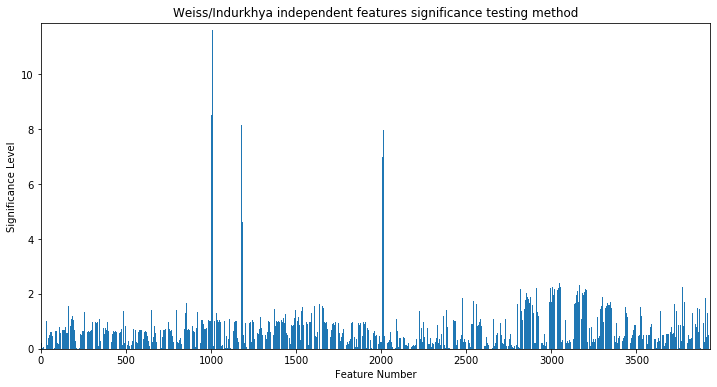

In [257]:
plt.figure(figsize=(12, 6))

plt.bar(FeatureSig1_EFA.index, FeatureSig1_EFA)
plt.xlabel('Feature Number')
plt.ylabel('Significance Level')
plt.xlim(0, FeatureSig1_EFA.index[-1])
plt.ylim(0, FeatureSig1_EFA.max())
plt.title('Weiss/Indurkhya independent features significance testing method')
plt.savefig('figure2.png', bbox_inches='tight')

## Feature selection for classification problem 2

In [88]:
def cl2_feat_sel(tickers):
    u = names['features_{}_final'.format(tickers)].drop(columns=['Y1', 'Y1Y2'])
    u = u.loc[:, u.diff(1).any()]  # remove columns with constant values
    u1 = u.isna()
    u2 = u1.sum()
    u3 = (u2<=10)  # remove columns with more than 10 NaNs
    u = u.loc[:, u3]
    index = u.index
    imputer = KNNImputer()
    u = imputer.fit_transform(u)
    u = pd.DataFrame(u, index=index)
    
    # Prepare X and Y
    X = u.iloc[:, :-1]
    Y2 = u.iloc[:, -1]
    n = len(Y2)
    Y = pd.Series(np.full(n, np.nan), index=index)
    for i in range(n):
        if Y2[i] == 1:
            Y[i] = 0
        else:
            Y[i] = 1
    Sig = indep_features(X.iloc[:round(n*0.8), :], Y[:round(n*0.8)])
    I1 = (Sig>1.5)
    X = X.loc[:, I1]
    forest = RandomForestClassifier(n_estimators=100, random_state=20200220)
    b = forest.fit(X.iloc[:round(n*0.8), :], Y[:round(n*0.8)])
    I2 = np.argsort(b.feature_importances_)[::-1][:10]
    X = X.iloc[:, I2]
    return Sig, X, Y

In [89]:
for i in tickers:
    names['FeatureSig2_{}'.format(i)], names['X2_{}'.format(i)], names['Y2_{}'.format(i)] = cl2_feat_sel(i)

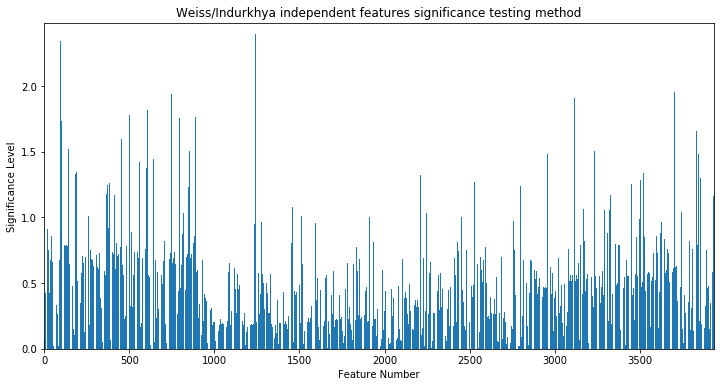

In [258]:
plt.figure(figsize=(12, 6))

plt.bar(FeatureSig2_EEM.index, FeatureSig2_EEM)
plt.xlabel('Feature Number')
plt.ylabel('Significance Level')
plt.xlim(0, FeatureSig2_EEM.index[-1])
plt.ylim(0, FeatureSig2_EEM.max())
plt.title('Weiss/Indurkhya independent features significance testing method')
plt.savefig('figure3.png', bbox_inches='tight')

## Performance of classifier 1

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm, naive_bayes
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [92]:
X1_EEM

,1176,1006,2162,1012,1009,1180,2163,2172,1003,1179
Date,,,,,,,,,,
2004-12-13,3.159993,-2.388664,-0.288333,1.160289,2.140167,2.061735,0.288333,-0.102039,-2.958917,-1.776417
2004-12-20,2.935560,1.984294,0.136667,0.847424,-0.327490,-2.388664,-0.338333,-0.049151,5.528709,2.388664
2004-12-27,-2.368716,3.729828,0.195278,-0.177471,2.466395,1.984294,-0.483611,-0.056325,5.677071,-0.415976
2005-01-03,-2.741510,2.599515,-0.036713,2.249813,2.186499,3.729828,0.173380,0.054952,2.296094,-1.341165
2005-01-10,-4.664810,1.224527,0.258526,1.610451,1.439014,2.599515,-0.063248,-0.118367,0.107248,-3.015491
...,...,...,...,...,...,...,...,...,...,...
2020-02-24,-49.497854,23.629035,3.696989,21.666831,23.974270,45.205932,-3.407602,-1.619534,12.673255,-37.557013
2020-03-02,-74.501803,54.855184,5.041114,37.113495,44.676624,23.629035,-0.912850,-1.321123,72.020689,-57.335719
2020-03-09,-121.518543,3.461977,4.953097,17.224900,13.807339,54.855184,-1.256108,-1.357010,-25.078326,-92.412197


In [93]:
Y1_EEM

Date
2004-12-13    1.0
2004-12-20    1.0
2004-12-27    0.0
2005-01-03    1.0
2005-01-10    0.0
             ... 
2020-02-24    0.0
2020-03-02    0.0
2020-03-09    0.0
2020-03-16    1.0
2020-03-23    0.0
Length: 798, dtype: float64

In [94]:
len(xs_ret)

798

In [95]:
def cl1_confusion(ticker):
    n = len(xs_ret)
    X, y = names['X1_{}'.format(ticker)].iloc[:round(n*0.8), :], names['Y1_{}'.format(ticker)][:round(n*0.8)]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20200220)
    
    # Model 1: Logistic Regression
    mdl1 = LogisticRegression(random_state=20200220)
    mdl1.fit(X_train, y_train)
    ypred1 = mdl1.predict(X_test)
    yprob1 = mdl1.predict_proba(X_test)[:, 1]
    fpr1, tpr1, _ = roc_curve(y_test, yprob1)
    roc_auc1 = auc(fpr1, tpr1)
    confusion1 = confusion_matrix(y_test, ypred1)
    
    # Model 2: SVM
    mdl2 = svm.SVC(random_state=20200220)
    mdl2.fit(X_train, y_train)
    ypred2 = mdl2.predict(X_test)
    yscore2 = mdl2.fit(X_train, y_train).decision_function(X_test)
    fpr2, tpr2, _ = roc_curve(y_test, yscore2)
    roc_auc2 = auc(fpr2, tpr2)
    confusion2 = confusion_matrix(y_test, ypred2)
    
    # Model 3: Naive Bayes Classifier
    mdl3 = naive_bayes.GaussianNB()
    mdl3.fit(X_train, y_train)
    ypred3 = mdl3.predict(X_test)
    yprob3 = mdl3.predict_proba(X_test)[:, 1]
    fpr3, tpr3, _ = roc_curve(y_test, yprob3)
    roc_auc3 = auc(fpr3, tpr3)
    confusion3 = confusion_matrix(y_test, ypred3)
    
    # Model 4: Ensemble Adaboost Classifier
    mdl4 = AdaBoostClassifier(n_estimators=100, random_state=20200220)
    mdl4.fit(X_train, y_train)
    ypred4 = mdl4.predict(X_test)
    yprob4 = mdl4.predict_proba(X_test)[:, 1]
    fpr4, tpr4, _ = roc_curve(y_test, yprob4)
    roc_auc4 = auc(fpr4, tpr4)
    confusion4 = confusion_matrix(y_test, ypred4)
    
    # Model 5: Bagging
    mdl5 = BaggingClassifier(n_estimators=12, random_state=20200220)
    mdl5.fit(X_train, y_train)
    ypred5 = mdl5.predict(X_test)
    yprob5 = mdl5.predict_proba(X_test)[:, 1]
    fpr5, tpr5, _ = roc_curve(y_test, yprob5)
    roc_auc5 = auc(fpr5, tpr5)
    confusion5 = confusion_matrix(y_test, ypred5)
    
    # Model 6: Random Forests
    mdl6 = RandomForestClassifier(n_estimators=100, random_state=20200220)
    mdl6.fit(X_train, y_train)
    ypred6 = mdl6.predict(X_test)
    yprob6 = mdl6.predict_proba(X_test)[:, 1]
    fpr6, tpr6, _ = roc_curve(y_test, yprob6)
    roc_auc6 = auc(fpr6, tpr6)
    confusion6 = confusion_matrix(y_test, ypred6)
    
    confusion = np.concatenate((confusion1.flatten(), confusion2.flatten(), confusion3.flatten(),
                                confusion4.flatten(), confusion5.flatten(), confusion6.flatten()), axis=0).reshape(-1, 4)
    confusion = pd.DataFrame(confusion, columns=['TN', 'FP', 'FN', 'TP'])
    
    # Plotting
    lw = 2
    fig = plt.figure(figsize=(12, 8))
    plt.plot(fpr1, tpr1, lw=lw, label='Logistic Regression: AUC = %0.2f' % roc_auc1)
    plt.plot(fpr2, tpr2, lw=lw, label='SVM: AUC = %0.2f' % roc_auc2)
    plt.plot(fpr3, tpr3, lw=lw, label='Naive Bayes: AUC = %0.2f' % roc_auc3)
    plt.plot(fpr4, tpr4, lw=lw, label='Adaboost: AUC = %0.2f' % roc_auc4)
    plt.plot(fpr5, tpr5, lw=lw, label='Bagging: AUC = %0.2f' % roc_auc5)
    plt.plot(fpr6, tpr6, lw=lw, label='Random Forests: AUC = %0.2f' % roc_auc6)
    plt.title('ROC Curves for predicting sign of next week '+ticker+' excess return')
    plt.legend(loc='lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.grid(True)
    return confusion, fig

C:\Users\Stephen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Stephen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

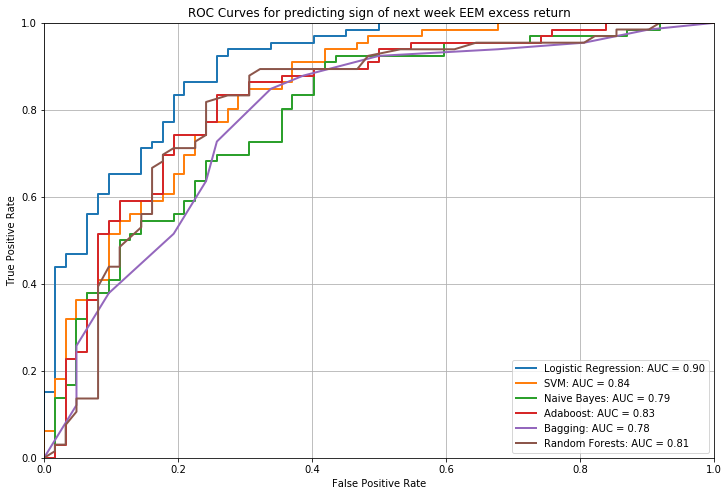

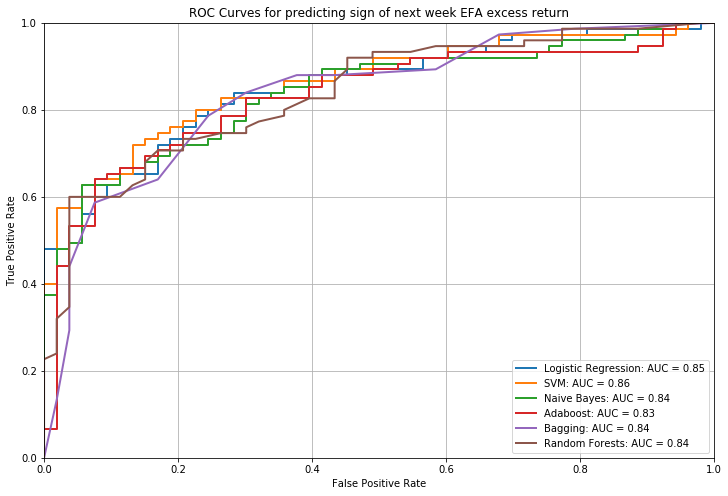

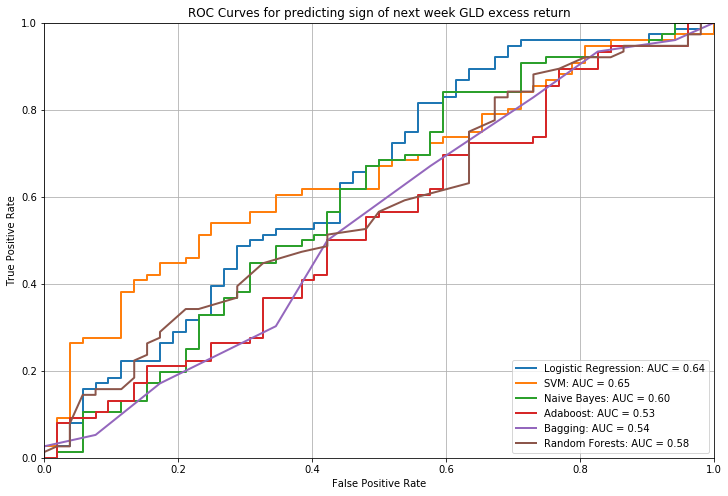

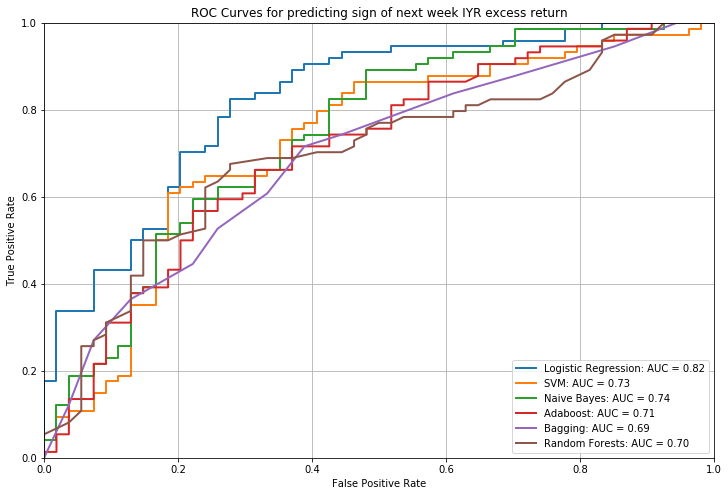

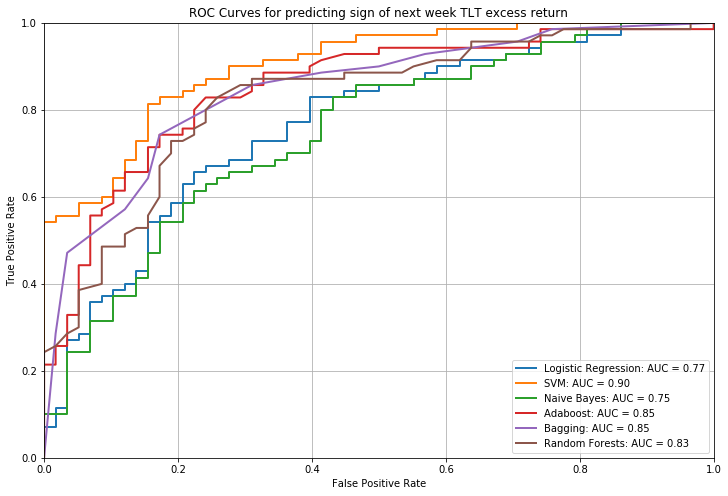

In [96]:
for i in tickers:
    names['confusion1_{}'.format(i)], names['ROC1_{}'.format(i)] = cl1_confusion(i)

In [97]:
perf_fs1 = pd.concat([confusion1_EEM, confusion1_EFA, confusion1_GLD, confusion1_IYR, confusion1_TLT], axis=0)

In [98]:
perf_fs1['Accuracy'] = (perf_fs1.TP+perf_fs1.TN)/perf_fs1.sum(axis=1)

## Performance of classifier 2

In [99]:
def cl2_confusion(ticker):
    n = len(xs_ret)
    X, y = names['X2_{}'.format(ticker)].iloc[:round(n*0.8), :], names['Y2_{}'.format(ticker)][:round(n*0.8)]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20200220)
    
    # Model 1: Logistic Regression
    mdl1 = LogisticRegression(random_state=20200220)
    mdl1.fit(X_train, y_train)
    ypred1 = mdl1.predict(X_test)
    yprob1 = mdl1.predict_proba(X_test)[:, 1]
    fpr1, tpr1, _ = roc_curve(y_test, yprob1)
    roc_auc1 = auc(fpr1, tpr1)
    confusion1 = confusion_matrix(y_test, ypred1)
    
    # Model 2: SVM
    mdl2 = svm.SVC(random_state=20200220)
    mdl2.fit(X_train, y_train)
    ypred2 = mdl2.predict(X_test)
    yscore2 = mdl2.fit(X_train, y_train).decision_function(X_test)
    fpr2, tpr2, _ = roc_curve(y_test, yscore2)
    roc_auc2 = auc(fpr2, tpr2)
    confusion2 = confusion_matrix(y_test, ypred2)
    
    # Model 3: Naive Bayes Classifier
    mdl3 = naive_bayes.GaussianNB()
    mdl3.fit(X_train, y_train)
    ypred3 = mdl3.predict(X_test)
    yprob3 = mdl3.predict_proba(X_test)[:, 1]
    fpr3, tpr3, _ = roc_curve(y_test, yprob3)
    roc_auc3 = auc(fpr3, tpr3)
    confusion3 = confusion_matrix(y_test, ypred3)
    
    # Model 4: Ensemble Adaboost Classifier
    mdl4 = AdaBoostClassifier(n_estimators=100, random_state=20200220)
    mdl4.fit(X_train, y_train)
    ypred4 = mdl4.predict(X_test)
    yprob4 = mdl4.predict_proba(X_test)[:, 1]
    fpr4, tpr4, _ = roc_curve(y_test, yprob4)
    roc_auc4 = auc(fpr4, tpr4)
    confusion4 = confusion_matrix(y_test, ypred4)
    
    # Model 5: Bagging
    mdl5 = BaggingClassifier(n_estimators=12, random_state=20200220)
    mdl5.fit(X_train, y_train)
    ypred5 = mdl5.predict(X_test)
    yprob5 = mdl5.predict_proba(X_test)[:, 1]
    fpr5, tpr5, _ = roc_curve(y_test, yprob5)
    roc_auc5 = auc(fpr5, tpr5)
    confusion5 = confusion_matrix(y_test, ypred5)
    
    # Model 6: Random Forests
    mdl6 = RandomForestClassifier(n_estimators=100, random_state=20200220)
    mdl6.fit(X_train, y_train)
    ypred6 = mdl6.predict(X_test)
    yprob6 = mdl6.predict_proba(X_test)[:, 1]
    fpr6, tpr6, _ = roc_curve(y_test, yprob6)
    roc_auc6 = auc(fpr6, tpr6)
    confusion6 = confusion_matrix(y_test, ypred6)
    
    confusion = np.concatenate((confusion1.flatten(), confusion2.flatten(), confusion3.flatten(),
                                confusion4.flatten(), confusion5.flatten(), confusion6.flatten())).reshape(-1, 4)
    confusion = pd.DataFrame(confusion, columns=['TN', 'FP', 'FN', 'TP'])
    
    # Plotting
    lw = 2
    fig = plt.figure(figsize=(12, 8))
    plt.plot(fpr1, tpr1, lw=lw, label='Logistic Regression: AUC = %0.2f' % roc_auc1)
    plt.plot(fpr2, tpr2, lw=lw, label='SVM: AUC = %0.2f' % roc_auc2)
    plt.plot(fpr3, tpr3, lw=lw, label='Naive Bayes: AUC = %0.2f' % roc_auc3)
    plt.plot(fpr4, tpr4, lw=lw, label='Adaboost: AUC = %0.2f' % roc_auc4)
    plt.plot(fpr5, tpr5, lw=lw, label='Bagging: AUC = %0.2f' % roc_auc5)
    plt.plot(fpr6, tpr6, lw=lw, label='Random Forests: AUC = %0.2f' % roc_auc6)
    plt.title('ROC Curves for predicting sign of next week '+ticker+' excess return')
    plt.legend(loc='lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.grid(True)
    return confusion, fig

C:\Users\Stephen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Stephen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

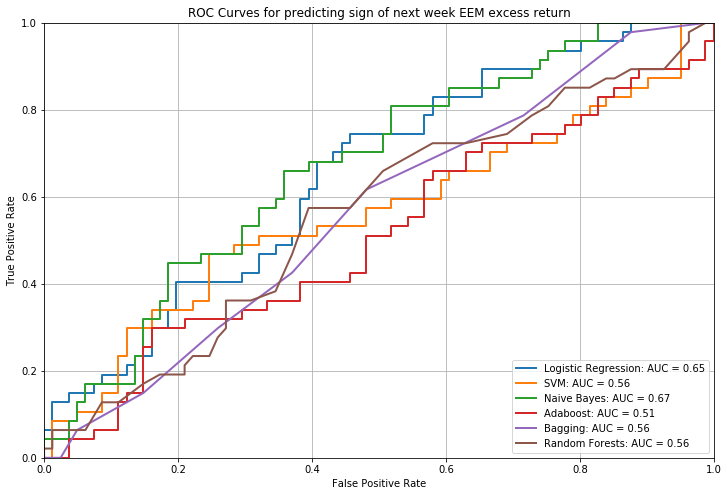

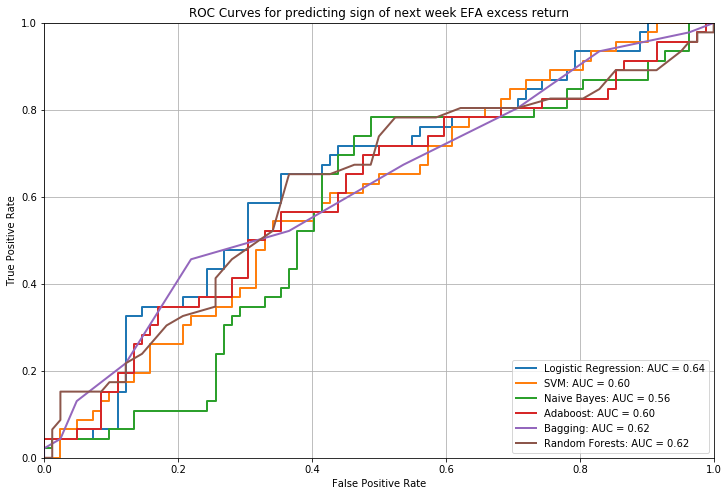

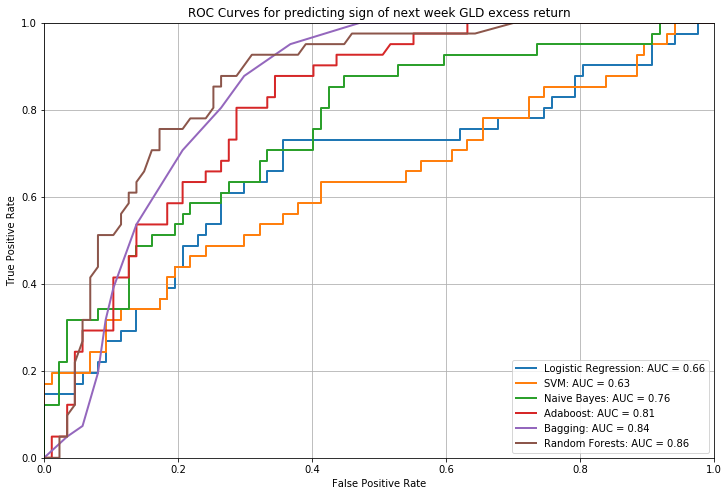

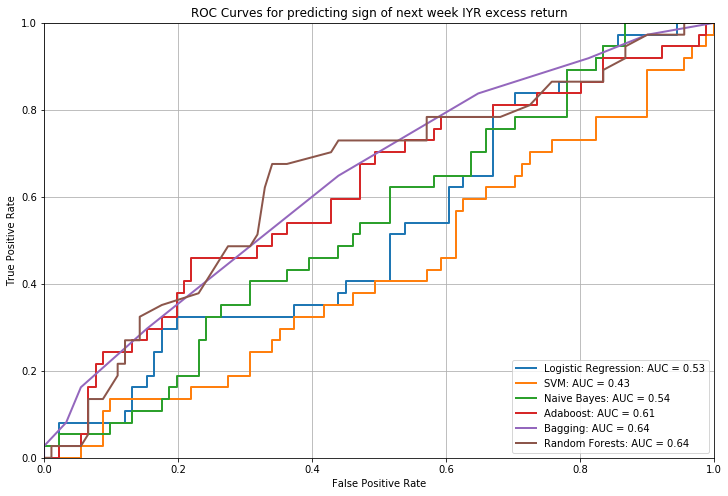

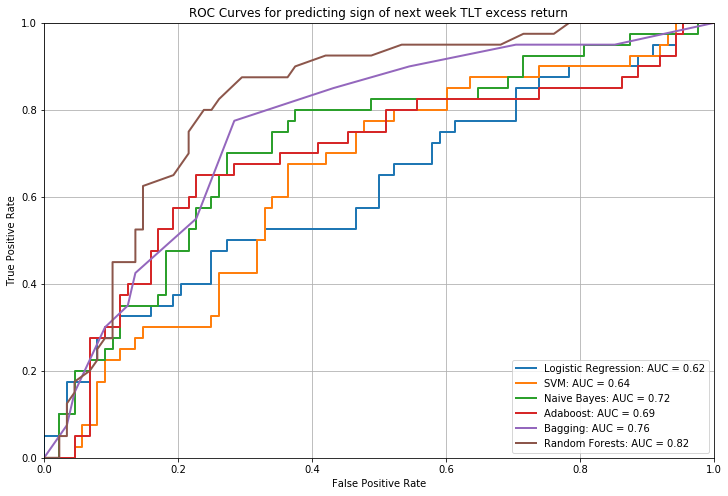

In [100]:
for i in tickers:
    names['confusion2_{}'.format(i)], names['ROC2_{}'.format(i)] = cl2_confusion(i)

In [101]:
perf_fs2 = pd.concat([confusion2_EEM, confusion2_EFA, confusion2_GLD, confusion2_IYR, confusion2_TLT], axis=0)

In [102]:
perf_fs2['Accuracy'] = (perf_fs2.TP+perf_fs2.TN)/perf_fs2.sum(axis=1)

In [103]:
perf_fs = pd.concat([perf_fs1, perf_fs2], axis=1)

In [202]:
perf_fs.to_csv('perf_fs.csv')

In [104]:
iterables = [['Classification problem 1', 'Classification problem 2'], ['TN', 'FP', 'FN', 'TP', 'Accuracy']]
perf_fs.columns = pd.MultiIndex.from_product(iterables)

In [105]:
iterables = [tickers, ['Logistic Regression', 'SVM', 'Naive Bayes', 'Adaboost', 'Bagging', 'Random Forests']]
perf_fs.index = pd.MultiIndex.from_product(iterables, names=['ETF', 'Algorithm'])

In [106]:
perf_fs

Classification problem 1                        \
                                              TN  FP  FN  TP  Accuracy   
ETF Algorithm                                                            
EEM Logistic Regression                       46  16   8  58  0.812500   
    SVM                                       39  23   8  58  0.757812   
    Naive Bayes                               37  25   8  58  0.742188   
    Adaboost                                  46  16  14  52  0.765625   
    Bagging                                   46  16  18  48  0.734375   
    Random Forests                            45  17  11  55  0.781250   
EFA Logistic Regression                       41  12  16  59  0.781250   
    SVM                                       37  16  13  62  0.773438   
    Naive Bayes                               35  18  13  62  0.757812   
    Adaboost                                  41  12  19  56  0.757812   
    Bagging                                   40  13  16  59  0.773438   
    Random Forests                            36  17  17  58  0.734375   
GLD Logistic Regression                       17  35   6  70  0.679688   
    SVM                                       10  42   6  70  0.625000   
    Naive Bayes                               21  31  19  57  0.609375   
    Adaboost                                  21  31  28  48  0.539062   
    Bagging                                   30  22  38  38  0.531250   
    Random Forests                            19  33  24  52  0.554688   
IYR Logistic Regression                       39  15  15  59  0.765625   
    SVM                                       35  19  24  50  0.664062   
    Naive Bayes                               32  22  19  55  0.679688   
    Adaboost                                  37  17  25  49  0.671875   
    Bagging                                   36  18  29  45  0.632812   
    Random Forests                            34  20  23  51  0.664062   
TLT Logistic Regression                        0  58   0  70  0.546875   
    SVM                                       45  13  10  60  0.820312   
    Naive Bayes                               38  20  22  48  0.671875   
    Adaboost                                  41  17  12  58  0.773438   
    Bagging                                   40  18  10  60  0.781250   
    Random Forests                            41  17  10  60  0.789062   

                        Classification problem 2                        
                                              TN  FP  FN  TP  Accuracy  
ETF Algorithm                                                           
EEM Logistic Regression                       81   0  44   3  0.656250  
    SVM                                       81   0  47   0  0.632812  
    Naive Bayes                               72   9  39   8  0.625000  
    Adaboost                                  65  16  33  14  0.617188  
    Bagging                                   69  12  40   7  0.593750  
    Random Forests                            76   5  44   3  0.617188  
EFA Logistic Regression                       80   2  44   2  0.640625  
    SVM                                       82   0  46   0  0.640625  
    Naive Bayes                               71  11  41   5  0.593750  
    Adaboost                                  70  12  33  13  0.648438  
    Bagging                                   72  10  36  10  0.640625  
    Random Forests                            75   7  39   7  0.640625  
GLD Logistic Regression                       87   0  38   3  0.703125  
    SVM                                       87   0  41   0  0.679688  
    Naive Bayes                               64  23  16  25  0.695312  
    Adaboost                                  68  19  15  26  0.734375  
    Bagging                                   75  12  19  22  0.757812  
    Random Forests                            75  12  16  25  0.781250  
IYR Logistic Regression                       89

## Prepare classifier 1 views

In [107]:
data_size = len(xs_ret)
pred_size = round(data_size*0.2)  # out-of-sample

In [108]:
def cl1_pred(ticker):
    pred1 = pd.Series(np.full(pred_size, np.nan), index=xs_ret.index[-1-pred_size:-1])
    
    for i in range(pred_size):
        X = names['X1_{}'.format(ticker)].iloc[:-pred_size+i, :]
        y = names['Y1_{}'.format(ticker)][:-pred_size+i]
        
        # X = preprocessing.scale(X)
        
        X_train = X.iloc[:-1, :]  # X_train = X[:-1, :]
        y_train = y[:-1]
        
        X_test = X.iloc[-1, :]  # X_test = X[-1, :]
        y_test = y[-1]
        
        mdl = RandomForestClassifier(n_estimators=100, random_state=20200220)
        mdl.fit(X_train, y_train)
        label = mdl.predict(X_test[np.newaxis, :])
        pred1[i] = label
    
    return pred1

In [109]:
for i in tickers:
    names['pred1_{}'.format(i)] = cl1_pred(i)

In [110]:
print(pred1_EEM.index, Y1_EEM[-1-pred_size:-1].index, sep='\n')

DatetimeIndex(['2017-02-27', '2017-03-06', '2017-03-13', '2017-03-20',
               '2017-03-27', '2017-04-03', '2017-04-10', '2017-04-17',
               '2017-04-24', '2017-05-01',
               ...
               '2020-01-13', '2020-01-20', '2020-01-27', '2020-02-03',
               '2020-02-10', '2020-02-17', '2020-02-24', '2020-03-02',
               '2020-03-09', '2020-03-16'],
              dtype='datetime64[ns]', name='Date', length=160, freq=None)
DatetimeIndex(['2017-02-27', '2017-03-06', '2017-03-13', '2017-03-20',
               '2017-03-27', '2017-04-03', '2017-04-10', '2017-04-17',
               '2017-04-24', '2017-05-01',
               ...
               '2020-01-13', '2020-01-20', '2020-01-27', '2020-02-03',
               '2020-02-10', '2020-02-17', '2020-02-24', '2020-03-02',
               '2020-03-09', '2020-03-16'],
              dtype='datetime64[ns]', name='Date', length=160, freq=None)


In [111]:
perf_cl1 = pd.DataFrame([confusion_matrix(Y1_EEM[-1-pred_size:-1], pred1_EEM).flatten(), 
                         confusion_matrix(Y1_EFA[-1-pred_size:-1], pred1_EFA).flatten(), 
                         confusion_matrix(Y1_GLD[-1-pred_size:-1], pred1_GLD).flatten(), 
                         confusion_matrix(Y1_IYR[-1-pred_size:-1], pred1_IYR).flatten(), 
                         confusion_matrix(Y1_TLT[-1-pred_size:-1], pred1_TLT).flatten()], columns = ['TN', 'FP', 'FN', 'TP'], index=tickers)

In [112]:
perf_cl1['Accuracy'] = (perf_cl1.TP+perf_cl1.TN)/perf_cl1.sum(axis=1)
perf_cl1

,TN,FP,FN,TP,Accuracy
EEM,51,26,19,64,0.71875
EFA,44,31,16,69,0.70625
GLD,31,45,25,59,0.56250
IYR,41,29,27,63,0.65000
TLT,58,10,16,76,0.83750


In [211]:
perf_cl1.to_csv('perf_cl1.csv', index_label='ETF')

## Prepare classifier 2 views

In [113]:
def cl2_pred(ticker):
    pred2 = pd.Series(np.full(pred_size, np.nan), index=xs_ret.index[-1-pred_size:-1])
    
    for i in range(pred_size):
        X = names['X2_{}'.format(ticker)].iloc[:-pred_size+i, :]
        y = names['Y2_{}'.format(ticker)][:-pred_size+i]
        
        # X = preprocessing.scale(X)
        
        X_train = X.iloc[:-1, :]  # X_train = X[:-1, :]
        y_train = y[:-1]
        
        X_test = X.iloc[-1, :]  # X_test = X[-1, :]
        y_test = y[-1]
        
        mdl = RandomForestClassifier(n_estimators=100, random_state=20200220)
        mdl.fit(X_train, y_train)
        label = mdl.predict(X_test[np.newaxis, :])
        pred2[i] = label
        
    return pred2

In [114]:
for i in tickers:
    names['pred2_{}'.format(i)] = cl2_pred(i)

In [115]:
perf_cl2 = pd.DataFrame([confusion_matrix(Y2_EEM[-1-pred_size:-1], pred2_EEM).flatten(), 
                         confusion_matrix(Y2_EFA[-1-pred_size:-1], pred2_EFA).flatten(), 
                         confusion_matrix(Y2_GLD[-1-pred_size:-1], pred2_GLD).flatten(), 
                         confusion_matrix(Y2_IYR[-1-pred_size:-1], pred2_IYR).flatten(), 
                         confusion_matrix(Y2_TLT[-1-pred_size:-1], pred2_TLT).flatten()], columns = ['TN', 'FP', 'FN', 'TP'], index=tickers)

In [116]:
perf_cl2['Accuracy'] = (perf_cl2.TP+perf_cl2.TN)/perf_cl2.sum(axis=1)
perf_cl2

,TN,FP,FN,TP,Accuracy
EEM,93,19,42,6,0.61875
EFA,85,21,42,12,0.60625
GLD,82,29,12,37,0.74375
IYR,106,5,45,4,0.68750
TLT,89,15,36,20,0.68125


In [210]:
perf_cl2.to_csv('perf_cl2.csv', index_label='ETF')

## Compute the final entries which goes into Q matrix for all portfolios

In [117]:
pred1 = pd.concat([pred1_EEM, pred1_EFA, pred1_GLD, pred1_IYR, pred1_TLT], axis=1)
pred2 = pd.concat([pred2_EEM, pred2_EFA, pred2_GLD, pred2_IYR, pred2_TLT], axis=1)

In [118]:
print(pred1.index, pred2.index, sep='\n')

DatetimeIndex(['2017-02-27', '2017-03-06', '2017-03-13', '2017-03-20',
               '2017-03-27', '2017-04-03', '2017-04-10', '2017-04-17',
               '2017-04-24', '2017-05-01',
               ...
               '2020-01-13', '2020-01-20', '2020-01-27', '2020-02-03',
               '2020-02-10', '2020-02-17', '2020-02-24', '2020-03-02',
               '2020-03-09', '2020-03-16'],
              dtype='datetime64[ns]', name='Date', length=160, freq=None)
DatetimeIndex(['2017-02-27', '2017-03-06', '2017-03-13', '2017-03-20',
               '2017-03-27', '2017-04-03', '2017-04-10', '2017-04-17',
               '2017-04-24', '2017-05-01',
               ...
               '2020-01-13', '2020-01-20', '2020-01-27', '2020-02-03',
               '2020-02-10', '2020-02-17', '2020-02-24', '2020-03-02',
               '2020-03-09', '2020-03-16'],
              dtype='datetime64[ns]', name='Date', length=160, freq=None)


In [119]:
pred = pd.DataFrame(np.full((pred_size, 5), np.nan), columns=tickers, index=pred1.index)
for j in range(5):
    for i in range(pred_size):
        if pred1.iloc[i, j] == 0 and pred2.iloc[i, j] == 0:
            pred.iloc[i, j] = -1
        elif pred1.iloc[i, j] == 0 and pred2.iloc[i, j] == 1:
            pred.iloc[i, j] = -2
        elif pred1.iloc[i, j] == 1 and pred2.iloc[i, j] == 0:
            pred.iloc[i, j] = 1
        else:
            pred.iloc[i, j] = 2

In [120]:
pred

,EEM,EFA,GLD,IYR,TLT
Date,,,,,
2017-02-27,-1.0,-1.0,-1.0,-1.0,-1.0
2017-03-06,-1.0,-1.0,2.0,-1.0,2.0
2017-03-13,-1.0,-2.0,1.0,-1.0,1.0
2017-03-20,1.0,-1.0,2.0,1.0,1.0
2017-03-27,-1.0,-1.0,1.0,-1.0,1.0
...,...,...,...,...,...
2020-02-17,-1.0,-2.0,1.0,-1.0,1.0
2020-02-24,-1.0,-2.0,1.0,-1.0,1.0
2020-03-02,-1.0,-2.0,-1.0,-1.0,-2.0


In [212]:
pred.to_csv('pred.csv')

In [121]:
cqt_pred = pd.concat([features_EEM_final.iloc[-1-pred_size:-1, -1], 
                      features_EFA_final.iloc[-1-pred_size:-1, -1], 
                      features_GLD_final.iloc[-1-pred_size:-1, -1], 
                      features_IYR_final.iloc[-1-pred_size:-1, -1], 
                      features_TLT_final.iloc[-1-pred_size:-1, -1]], axis=1)
cqt_pred.columns = tickers

In [122]:
cqt_pred

,EEM,EFA,GLD,IYR,TLT
Date,,,,,
2017-02-27,-1.0,1.0,-1.0,-2.0,-1.0
2017-03-06,2.0,2.0,2.0,1.0,2.0
2017-03-13,1.0,-1.0,1.0,-1.0,1.0
2017-03-20,-1.0,1.0,-2.0,1.0,-2.0
2017-03-27,-1.0,-2.0,1.0,1.0,-1.0
...,...,...,...,...,...
2020-02-17,-2.0,-2.0,-2.0,-2.0,2.0
2020-02-24,-1.0,-1.0,1.0,1.0,1.0
2020-03-02,-1.0,-1.0,-1.0,-1.0,-2.0


In [213]:
cqt_pred.to_csv('cqt_pred.csv')

## Compute out of sample performance of market cap weighted portfolio

In [123]:
from pypfopt import expected_returns, risk_models

In [124]:
xs_ret.iloc[-pred_size:, :]

,EEM,EFA,GLD,IYR,TLT
Date,,,,,
2017-03-06,-0.004853,0.001830,-0.023882,-0.039065,-0.015843
2017-03-13,0.038801,0.019192,0.019651,0.021552,0.011719
2017-03-20,0.007960,-0.001590,0.015840,-0.006026,0.018737
2017-03-27,-0.010692,0.002272,-0.001320,0.019175,-0.001548
2017-04-03,-0.000661,-0.007699,0.006080,0.008128,-0.000153
...,...,...,...,...,...
2020-02-24,-0.064224,-0.088429,-0.041090,-0.128068,0.048872
2020-03-02,-0.009705,-0.007953,0.061721,0.046488,0.073708
2020-03-09,-0.099474,-0.143205,-0.090621,-0.112871,-0.075616


In [125]:
def port_perf(port_wts):
    rel_wts = np.zeros((pred_size, 5))
    for i in range(pred_size):
        rel_wts[i, :] = port_wts[i, :]/sum(abs(port_wts[i, :]))
    
    port_pnl = np.zeros(pred_size)  # profit and loss
    port_ret = np.zeros(pred_size)
    HHI = np.zeros(pred_size)
    
    for i in range(pred_size):
        w = port_wts[i, :]
        
        money_invested = 1000000*w
        weekly_pnl = money_invested*xs_ret.iloc[-pred_size+i, :]
        port_pnl[i] = weekly_pnl.sum()
        
        weekly_ret = w*xs_ret.iloc[-pred_size+i, :]
        port_ret[i] = weekly_ret.sum()
        
        hhi = np.linalg.norm(w, 2)**2
        HHI[i] = hhi
    
    cum_pnl = np.insert(port_pnl.cumsum(), 0, 0)
    cum_ret = np.insert(port_ret.cumsum(), 0, 0)
    mean_ret = port_ret.mean()
    var_ret = port_ret.var()
    
    mean_ret_apa = mean_ret*52*100
    sd_ret_apa = np.sqrt(var_ret*52)*100
    
    skew_ret = stats.skew(port_ret)
    kurt_ret = stats.kurtosis(port_ret)
    
    VaR_cl = 0.95
    sorted_returns = np.sort(port_ret)
    num_returns = np.size(port_ret)
    VaR_index = np.ceil((1-VaR_cl)*num_returns)
    VaR_ret = sorted_returns[int(VaR_index)]
    CVaR_ret = sorted_returns[:int(VaR_index)].mean()
    muVaR = mean_ret/VaR_ret
    muCVaR = mean_ret/CVaR_ret
    
    mean_HHI = HHI.mean()
    sharpe_ratio = mean_ret/np.sqrt(var_ret)
    sr_apa = sharpe_ratio*np.sqrt(52)
    
    gains = np.maximum(np.zeros(pred_size), port_ret)  # np.maximum: element-wise maximum of array elements
    losses = np.maximum(np.zeros(pred_size), -1*port_ret)
    omega = gains.mean()/losses.mean()
    
    n = np.size(port_ret)
    cr = port_ret.cumsum()
    dd = np.zeros(n)
    for i in range(n):
        dd[i] = cr[0:i+1].max() - cr[i]
    MDD = dd.max()
    
    change_weights = np.zeros((pred_size-1, 5))
    sum_change_weights = np.zeros(pred_size-1)
    for i in range(pred_size-1):
        for j in range(5):
            change_weights[i, j] = port_wts[i+1, j] - port_wts[i, j]
        sum_change_weights[i] = change_weights[i, :].sum()
    PT_turnover = sum_change_weights.mean()
    
    measures = np.array([mean_ret_apa, sd_ret_apa, skew_ret, kurt_ret, muVaR, muCVaR, mean_HHI, sr_apa, omega, MDD, PT_turnover])
    return measures, cum_pnl, cum_ret

In [126]:
mcap = np.array([38406.3, 77562.7, 34722.9, 3713.3, 6742.8])
w_eqm = mcap/mcap.sum()
w_eqm

array([0.23832936, 0.48131345, 0.21547211, 0.02304279, 0.04184228])

In [127]:
port_wts_mcap = np.tile(w_eqm, (pred_size,1))

In [128]:
measures_mcap, cum_pnl_mcap, cum_ret_mcap = port_perf(port_wts_mcap)

In [129]:
measures_mcap

array([ 9.45584737e-01,  1.45520263e+01, -1.39687977e+00,  1.23228651e+01,
       -7.69091758e-03, -3.54070955e-03,  3.37173501e-01,  6.49795922e-02,
        1.02947485e+00,  2.82708417e-01,  0.00000000e+00])

In [130]:
meas_col = ['Mean p.a (%)', 'SD p.a (%)', 'Skewness', 'Kurtosis', '$\mu$/VaR', 
            '$\mu$/CVaR', 'Average HHI', 'Sharpe Ratio', 'Omega', 'MDD', 'Turnover']

In [131]:
Date = xs_ret.index[-(pred_size+1):]

In [132]:
xs_ret.index[-(pred_size+1):]

DatetimeIndex(['2017-02-27', '2017-03-06', '2017-03-13', '2017-03-20',
               '2017-03-27', '2017-04-03', '2017-04-10', '2017-04-17',
               '2017-04-24', '2017-05-01',
               ...
               '2020-01-20', '2020-01-27', '2020-02-03', '2020-02-10',
               '2020-02-17', '2020-02-24', '2020-03-02', '2020-03-09',
               '2020-03-16', '2020-03-23'],
              dtype='datetime64[ns]', name='Date', length=161, freq=None)

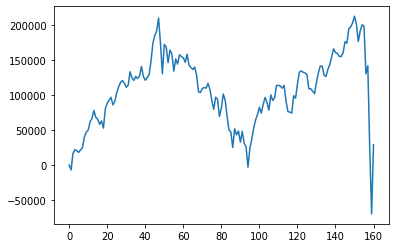

In [133]:
plt.plot(cum_pnl_mcap)

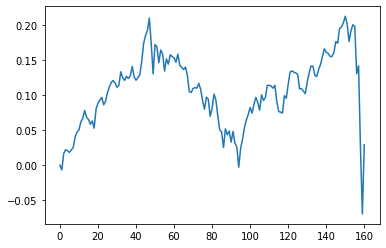

In [134]:
plt.plot(cum_ret_mcap)

## Compute out of sample performance of equally weighted portfolio

In [135]:
port_wts_1byN = 0.2*np.ones((pred_size, 5))

In [136]:
measures_1byN, cum_pnl_1byN, cum_ret_1byN = port_perf(port_wts_1byN)

In [137]:
measures_1byN

array([ 3.49991088e+00,  1.29626878e+01, -1.48896698e+00,  1.54183921e+01,
       -3.36110676e-02, -1.46735673e-02,  2.00000000e-01,  2.69998857e-01,
        1.13540586e+00,  2.21840678e-01,  0.00000000e+00])

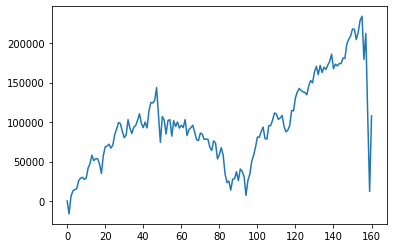

In [138]:
plt.plot(cum_pnl_1byN)

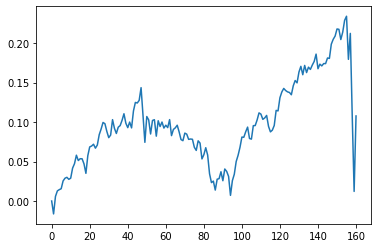

In [139]:
plt.plot(cum_ret_1byN)

In [140]:
cum_ret_bm = np.insert(xs_bm_ret[Date[1:]].values, 0, 0).cumsum()

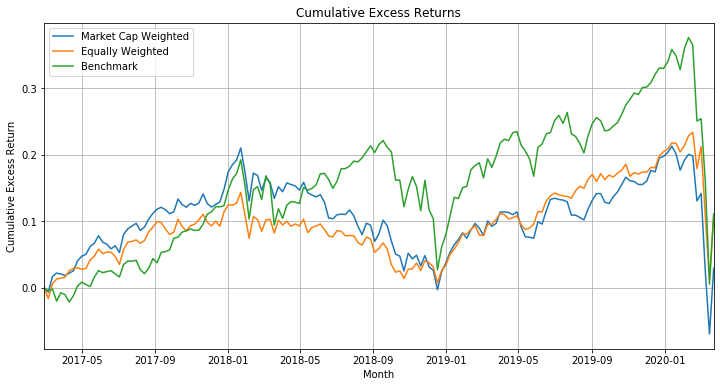

In [259]:
plt.figure(figsize=(12, 6))

plt.plot(Date, cum_ret_mcap, label='Market Cap Weighted')
plt.plot(Date, cum_ret_1byN, label='Equally Weighted')
plt.plot(Date, cum_ret_bm, label='Benchmark')
plt.xlim(Date[0], Date[-1])
plt.xlabel('Month')
plt.ylabel('Cumulative Excess Return')
plt.legend(loc='upper left')
plt.title('Cumulative Excess Returns')
plt.grid(True)
plt.savefig('figure4.png', bbox_inches='tight')

## Compute out of sample performance of unconstrained BL portfolio based on Random Forest views

In [142]:
def bl_cov(X, method):
    prices = expected_returns.prices_from_returns(X)
    switcher = {
        1: risk_models.sample_cov(prices ,frequency=1), 
        2: risk_models.min_cov_determinant(prices, frequency=1), 
        3: risk_models.exp_cov(prices, span=180/7, frequency=1), 
        4: risk_models.CovarianceShrinkage(prices, frequency=1).ledoit_wolf(shrinkage_target='constant_correlation')
    }
    sigma = switcher.get(method)
    return sigma

In [143]:
xs_ret

,EEM,EFA,GLD,IYR,TLT
Date,,,,,
2004-12-13,0.030721,0.011753,0.016851,-0.000820,-0.001539
2004-12-20,0.016629,0.008539,0.001398,-0.011313,-0.002215
2004-12-27,0.027696,0.030711,-0.011036,0.023364,-0.000872
2005-01-03,-0.051862,-0.031639,-0.045187,-0.054902,0.003257
2005-01-10,0.025041,0.006317,0.011026,-0.000875,0.017963
...,...,...,...,...,...
2020-02-24,-0.064224,-0.088429,-0.041090,-0.128068,0.048872
2020-03-02,-0.009705,-0.007953,0.061721,0.046488,0.073708
2020-03-09,-0.099474,-0.143205,-0.090621,-0.112871,-0.075616


In [144]:
def bl_wts(i, cov_choice, delta_choice):
    ret = xs_ret
    returns = ret.iloc[:-(pred_size+1)+i, :]
    switcher = {
        1: 0.01, 
        2: 2.24, 
        3: 6
    }
    delta = switcher.get(delta_choice, 'nothing')
    tau = 1/(data_size-(pred_size+1)+i)
    sigma = bl_cov(returns, cov_choice)
    
    mcap = np.array([38406.3, 77562.7, 34722.9, 3713.3, 6742.8])
    w_eqm = mcap/mcap.sum()
    
    pi = delta*sigma@w_eqm
    
    P = np.eye(5)
    Q = np.zeros(5)
    for k in range(5):
        A = P@pi
        B = P@sigma@P.T
        Q[k] = A[k] + pred.iloc[i, k]*np.sqrt(B.iloc[k, k])
    
    Omega = tau*np.diag(np.diag(P@sigma@P.T))
    
    pi_est = pi + tau*sigma@P.T@np.linalg.inv((tau*P@sigma@P.T)+Omega)@(Q-P@pi)
    sigma_p = ((1+tau)*sigma) - (tau*tau*sigma@P.T)@np.linalg.inv((tau*P@sigma@P.T)+Omega)@(P@sigma)
    
    w = np.linalg.inv(delta*sigma_p)@pi_est
    return w, pi_est, sigma_p

In [145]:
def main_bl(cov_choice, delta_choice):
    port_wts = np.zeros((pred_size, 5))
    rel_wts = np.zeros((pred_size, 5))
    
    for i in range(pred_size):
        port_wts[i, :], _, _ = bl_wts(i, cov_choice, delta_choice)
    
    measures, cum_pnl, cum_ret = port_perf(port_wts)
    return port_wts, measures, cum_ret, cum_pnl

In [146]:
measures_rfviews = np.zeros((12, 11))
cum_ret_rfviews = np.zeros((pred_size+1, 12))

In [147]:
_, measures_rfviews[0, :], cum_ret_rfviews[:, 0], _ = main_bl(1, 1)
_, measures_rfviews[1, :], cum_ret_rfviews[:, 1], _ = main_bl(2, 1)
_, measures_rfviews[2, :], cum_ret_rfviews[:, 2], _ = main_bl(3, 1)
_, measures_rfviews[3, :], cum_ret_rfviews[:, 3], _ = main_bl(4, 1)

In [148]:
_, measures_rfviews[4, :], cum_ret_rfviews[:, 4], _ = main_bl(1, 2)
_, measures_rfviews[5, :], cum_ret_rfviews[:, 5], _ = main_bl(2, 2)
_, measures_rfviews[6, :], cum_ret_rfviews[:, 6], _ = main_bl(3, 2)
_, measures_rfviews[7, :], cum_ret_rfviews[:, 7], _ = main_bl(4, 2)

In [149]:
_, measures_rfviews[8, :], cum_ret_rfviews[:, 8], _ = main_bl(1, 3)
_, measures_rfviews[9, :], cum_ret_rfviews[:, 9], _ = main_bl(2, 3)
_, measures_rfviews[10, :], cum_ret_rfviews[:, 10], _ = main_bl(3, 3)
_, measures_rfviews[11, :], cum_ret_rfviews[:, 11], _ = main_bl(4, 3)

In [215]:
np.savetxt('measures_rfviews.csv', measures_rfviews, delimiter=',')
np.savetxt('cum_ret_rfviews.csv', cum_ret_rfviews, delimiter=',')

In [150]:
iterables = [['$\delta$ = 0.01', '$\delta$ = 2.24', '$\delta$ = 6'], ['Sample', 'Fast MCD', 'EWMA', 'Shrinkage']]
perf_rfviews = pd.DataFrame(measures_rfviews, index=pd.MultiIndex.from_product(iterables), columns=meas_col)
perf_rfviews

Mean p.a (%)     SD p.a (%)  Skewness   Kurtosis  \
$\delta$ = 0.01 Sample     394179.805377  102411.183412  3.487118  36.880417   
                Fast MCD   762441.417026  207362.068917  2.099561  30.249040   
                EWMA       615746.811844  142570.677266  2.726690  15.438991   
                Shrinkage  394832.430335  102199.317573  3.428234  36.302085   
$\delta$ = 2.24 Sample       1760.670745     447.970939  3.477610  36.514547   
                Fast MCD     3400.683922     913.247472  2.027209  29.487922   
                EWMA         2749.809483     628.136074  2.675398  14.998887   
                Shrinkage    1763.584293     447.008539  3.417756  35.927796   
$\delta$ = 6    Sample        657.908453     161.681064  3.447367  35.663660   
                Fast MCD     1277.515664     336.119174  2.121372  29.274774   
                EWMA         1027.187115     229.447037  2.581318  14.207612   
                Shrinkage     658.996205     161.311296  3.386069  35.065217   

                           $\mu$/VaR  $\mu$/CVaR   Average HHI  Sharpe Ratio  \
$\delta$ = 0.01 Sample     -2.056714   -0.531464  3.202979e+07      3.848992   
                Fast MCD   -1.987917   -0.461126  1.025524e+08      3.676861   
                EWMA       -1.069704   -0.657141  9.487544e+07      4.318888   
                Shrinkage  -2.030144   -0.532933  3.179171e+07      3.863357   
$\delta$ = 2.24 Sample     -1.891457   -0.545849  6.418639e+02      3.930324   
                Fast MCD   -1.994986   -0.463872  2.050046e+03      3.723727   
                EWMA       -1.109415   -0.669863  1.897990e+03      4.377729   
                Shrinkage  -1.919622   -0.546906  6.371095e+02      3.945303   
$\delta$ = 6    Sample     -1.951310   -0.568740  9.049830e+01      4.069174   
                Fast MCD   -1.977200   -0.477001  2.881444e+02      3.800782   
                EWMA       -1.183422   -0.692446  2.664256e+02      4.476794   
                Shrinkage  -1.988634   -0.569779  8.983343e+01      4.085245   

                              Omega          MDD   Turnover  
$\delta$ = 0.01 Sample     8.390972   625.581295  23.625247  
                Fast MCD   7.848411  1568.267900  21.108833  
                EWMA       8.216969   334.783567  42.374412  
                Shrinkage  8.414502   626.762130  23.286786  
$\delta$ = 2.24 Sample     8.524752     2.694337   0.105471  
                Fast MCD   7.873048     6.900372   0.089688  
                EWMA       8.317725     1.396116   0.189173  
                Shrinkage  8.548662     2.699608   0.103960  
$\delta$ = 6    Sample     8.678328     0.943922   0.039376  
                Fast MCD   7.973598     2.481931   0.037244  
                EWMA       8.485432     0.459243   0.070626  
                Shrinkage  8.695823     0.945890   0.038812

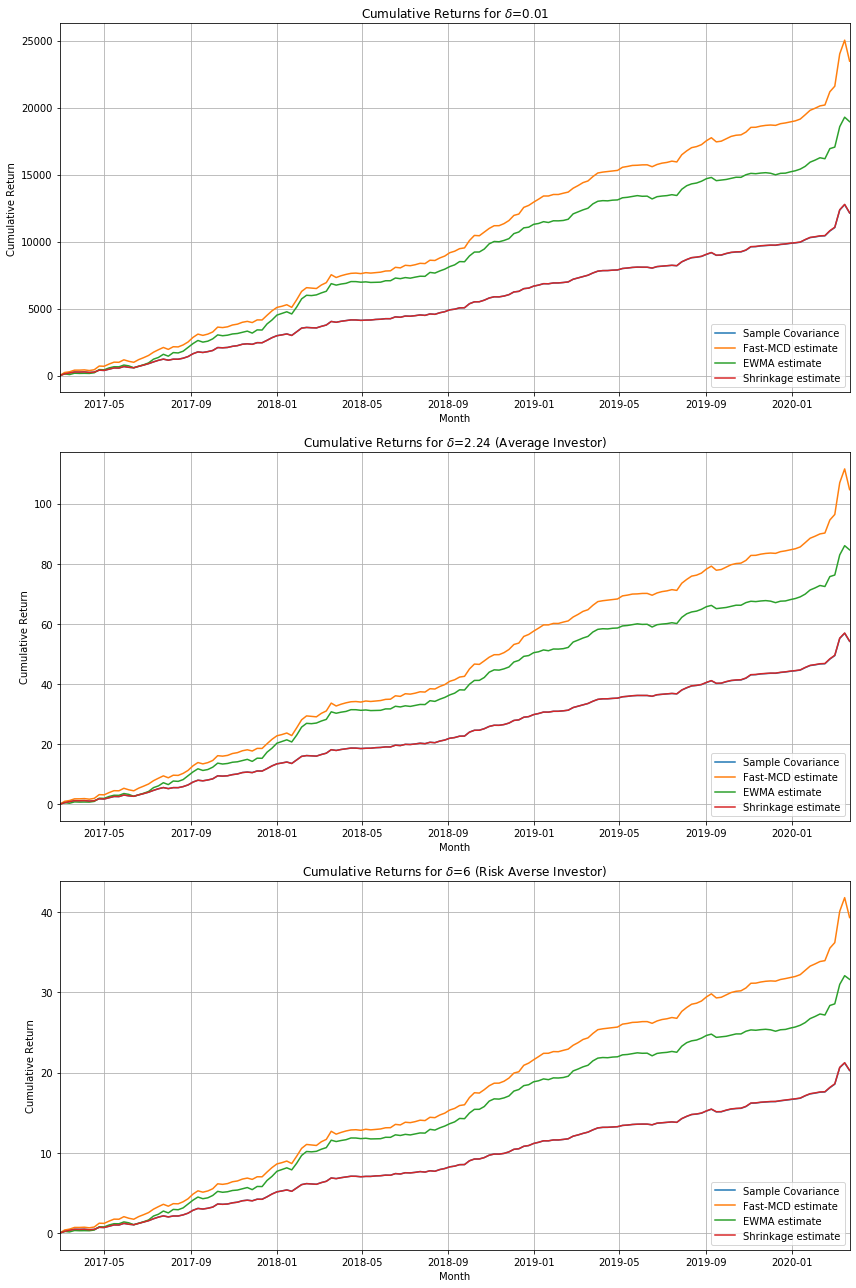

In [260]:
plt.figure(figsize=(12, 18))

plt.subplot(311)
plt.plot(Date, cum_ret_rfviews[:, 0], label='Sample Covariance')
plt.plot(Date, cum_ret_rfviews[:, 1], label='Fast-MCD estimate')
plt.plot(Date, cum_ret_rfviews[:, 2], label='EWMA estimate')
plt.plot(Date, cum_ret_rfviews[:, 3], label='Shrinkage estimate')
plt.xlim(Date[0], Date[-1])
plt.xlabel('Month')
plt.ylabel('Cumulative Return')
plt.legend(loc='lower right')
plt.title('Cumulative Returns for $\delta$=0.01')
plt.grid(True)

plt.subplot(312)
plt.plot(Date, cum_ret_rfviews[:, 4], label='Sample Covariance')
plt.plot(Date, cum_ret_rfviews[:, 5], label='Fast-MCD estimate')
plt.plot(Date, cum_ret_rfviews[:, 6], label='EWMA estimate')
plt.plot(Date, cum_ret_rfviews[:, 7], label='Shrinkage estimate')
plt.xlim(Date[0], Date[-1])
plt.xlabel('Month')
plt.ylabel('Cumulative Return')
plt.legend(loc='lower right')
plt.title('Cumulative Returns for $\delta$=2.24 (Average Investor)')
plt.grid(True)

plt.subplot(313)
plt.plot(Date, cum_ret_rfviews[:, 8], label='Sample Covariance')
plt.plot(Date, cum_ret_rfviews[:, 9], label='Fast-MCD estimate')
plt.plot(Date, cum_ret_rfviews[:, 10], label='EWMA estimate')
plt.plot(Date, cum_ret_rfviews[:, 11], label='Shrinkage estimate')
plt.xlim(Date[0], Date[-1])
plt.xlabel('Month')
plt.ylabel('Cumulative Return')
plt.legend(loc='lower right')
plt.title('Cumulative Returns for $\delta$=6 (Risk Averse Investor)')
plt.grid(True)
plt.tight_layout()
plt.savefig('figure5.png', bbox_inches='tight')

## Compute out of sample performance of unconstrained BL portfolio based on correct views

In [152]:
def bl_wts(i, cov_choice, delta_choice):
    ret = xs_ret
    returns = ret.iloc[:-(pred_size+1)+i, :]
    switcher = {
        1: 0.01, 
        2: 2.24, 
        3: 6
    }
    delta = switcher.get(delta_choice, 'nothing')
    tau = 1/(data_size-(pred_size+1)+i)
    sigma = bl_cov(returns, cov_choice)
    
    mcap = np.array([38406.3, 77562.7, 34722.9, 3713.3, 6742.8])
    w_eqm = mcap/mcap.sum()
    
    pi = delta*sigma@w_eqm
    
    P = np.eye(5)
    Q = np.zeros(5)
    for k in range(5):
        A = P@pi
        B = P@sigma@P.T
        Q[k] = A[k] + cqt_pred.iloc[i, k]*np.sqrt(B.iloc[k, k])
    
    Omega = tau*np.diag(np.diag(P@sigma@P.T))
    
    pi_est = pi + tau*sigma@P.T@np.linalg.inv((tau*P@sigma@P.T)+Omega)@(Q-P@pi)
    sigma_p = ((1+tau)*sigma) - (tau*tau*sigma@P.T)@np.linalg.inv((tau*P@sigma@P.T)+Omega)@(P@sigma)
    
    w = np.linalg.inv(delta*sigma_p)@pi_est
    return w, pi_est, sigma_p

In [153]:
measures_cqtviews = np.zeros((12, 11))
cum_ret_cqtviews = np.zeros((pred_size+1, 12))

In [154]:
_, measures_cqtviews[0, :], cum_ret_cqtviews[:, 0], _ = main_bl(1, 1)
_, measures_cqtviews[1, :], cum_ret_cqtviews[:, 1], _ = main_bl(2, 1)
_, measures_cqtviews[2, :], cum_ret_cqtviews[:, 2], _ = main_bl(3, 1)
_, measures_cqtviews[3, :], cum_ret_cqtviews[:, 3], _ = main_bl(4, 1)

C:\Users\Stephen\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Stephen\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Stephen\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Stephen\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars


In [155]:
_, measures_cqtviews[4, :], cum_ret_cqtviews[:, 4], _ = main_bl(1, 2)
_, measures_cqtviews[5, :], cum_ret_cqtviews[:, 5], _ = main_bl(2, 2)
_, measures_cqtviews[6, :], cum_ret_cqtviews[:, 6], _ = main_bl(3, 2)
_, measures_cqtviews[7, :], cum_ret_cqtviews[:, 7], _ = main_bl(4, 2)

C:\Users\Stephen\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Stephen\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Stephen\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Stephen\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars


In [156]:
_, measures_cqtviews[8, :], cum_ret_cqtviews[:, 8], _ = main_bl(1, 3)
_, measures_cqtviews[9, :], cum_ret_cqtviews[:, 9], _ = main_bl(2, 3)
_, measures_cqtviews[10, :], cum_ret_cqtviews[:, 10], _ = main_bl(3, 3)
_, measures_cqtviews[11, :], cum_ret_cqtviews[:, 11], _ = main_bl(4, 3)

C:\Users\Stephen\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Stephen\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Stephen\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Stephen\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars


In [216]:
np.savetxt('measures_cqtviews.csv', measures_cqtviews, delimiter=',')
np.savetxt('cum_ret_cqtviews.csv', cum_ret_cqtviews, delimiter=',')

In [157]:
perf_cqtviews = pd.DataFrame(measures_cqtviews, index=perf_rfviews.index, columns=meas_col)
perf_cqtviews

Mean p.a (%)     SD p.a (%)  Skewness   Kurtosis  \
$\delta$ = 0.01 Sample     9.623882e+05  110374.576009  3.330190  15.038979   
                Fast MCD   1.816474e+06  224023.958660  3.828379  18.974027   
                EWMA       1.468176e+06  148687.814700  3.325332  18.361037   
                Shrinkage  9.608496e+05  110243.876256  3.327383  14.980339   
$\delta$ = 2.24 Sample     4.297315e+03     489.923386  3.343762  15.352217   
                Fast MCD   8.105331e+03     994.262904  3.859319  19.511097   
                EWMA       6.555295e+03     658.726478  3.273615  17.969076   
                Shrinkage  4.290447e+03     489.320054  3.341190  15.297726   
$\delta$ = 6    Sample     1.604922e+03     181.480639  3.380621  16.103449   
                Fast MCD   3.031319e+03     370.593156  3.877239  19.910221   
                EWMA       2.447902e+03     242.979661  3.181572  17.256458   
                Shrinkage  1.602358e+03     181.243164  3.378526  16.056693   

                           $\mu$/VaR  $\mu$/CVaR   Average HHI  Sharpe Ratio  \
$\delta$ = 0.01 Sample      2.997644    4.206668  4.100622e+07      8.719292   
                Fast MCD    3.202903    3.924892  1.309395e+08      8.108392   
                EWMA        3.121084    3.836475  1.083025e+08      9.874216   
                Shrinkage   3.001055    4.192783  4.059921e+07      8.715673   
$\delta$ = 2.24 Sample      3.047394    4.164136  8.184687e+02      8.771403   
                Fast MCD    3.188569    3.905007  2.611801e+03      8.152101   
                EWMA        3.083656    3.855400  2.161108e+03      9.951468   
                Shrinkage   3.038239    4.150466  8.103481e+02      8.768181   
$\delta$ = 6    Sample      3.282375    4.094378  1.145740e+02      8.843491   
                Fast MCD    3.087397    3.898677  3.651247e+02      8.179641   
                EWMA        3.022563    3.887725  3.020452e+02     10.074513   
                Shrinkage   3.250044    4.081058  1.134400e+02      8.840930   

                           Omega  MDD    Turnover  
$\delta$ = 0.01 Sample       inf  0.0  112.512544  
                Fast MCD     inf  0.0  211.043934  
                EWMA         inf  0.0   54.526602  
                Shrinkage    inf  0.0  112.164980  
$\delta$ = 2.24 Sample       inf  0.0    0.502289  
                Fast MCD     inf  0.0    0.944203  
                EWMA         inf  0.0    0.243424  
                Shrinkage    inf  0.0    0.500737  
$\delta$ = 6    Sample       inf  0.0    0.187522  
                Fast MCD     inf  0.0    0.352504  
                EWMA         inf  0.0    0.090879  
                Shrinkage    inf  0.0    0.186943

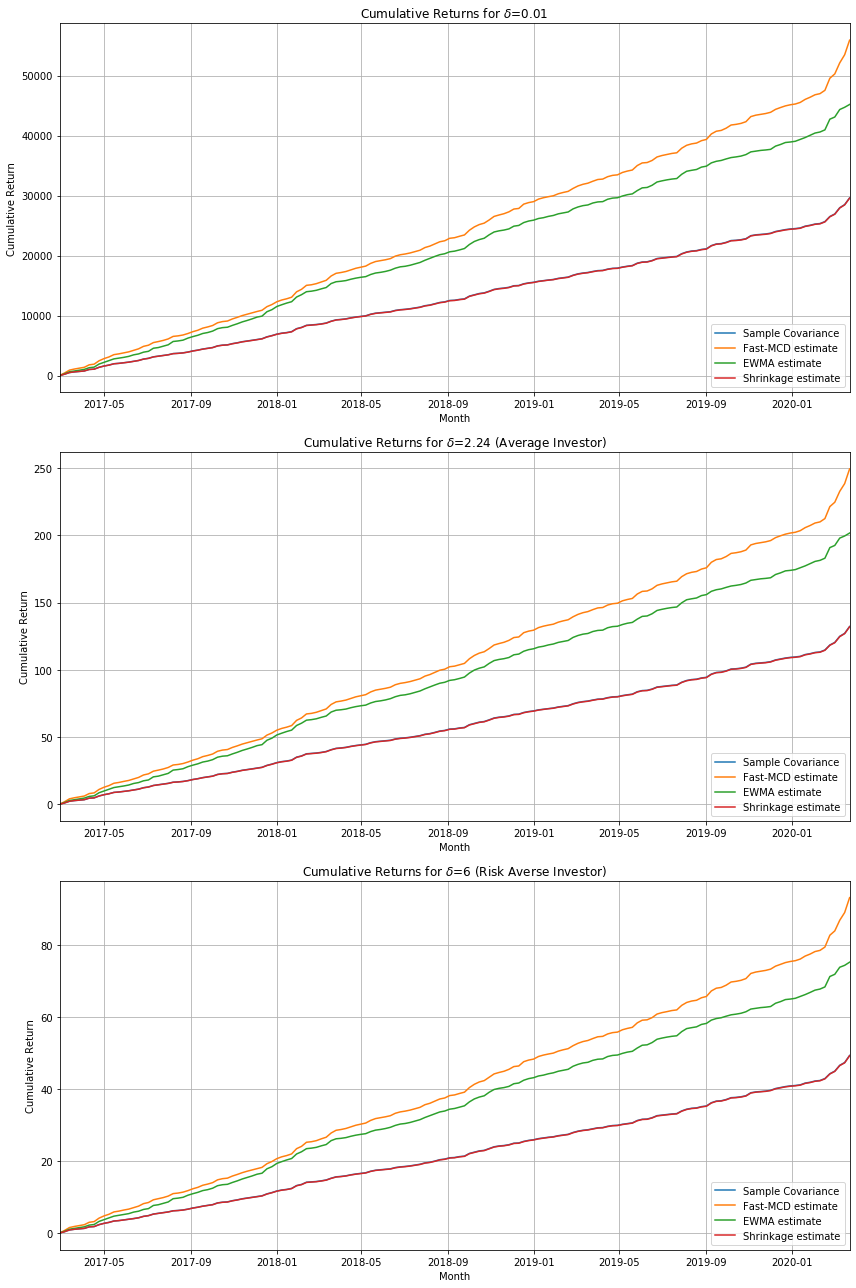

In [261]:
plt.figure(figsize=(12, 18))

plt.subplot(311)
plt.plot(Date, cum_ret_cqtviews[:, 0], label='Sample Covariance')
plt.plot(Date, cum_ret_cqtviews[:, 1], label='Fast-MCD estimate')
plt.plot(Date, cum_ret_cqtviews[:, 2], label='EWMA estimate')
plt.plot(Date, cum_ret_cqtviews[:, 3], label='Shrinkage estimate')
plt.xlim(Date[0], Date[-1])
plt.xlabel('Month')
plt.ylabel('Cumulative Return')
plt.legend(loc='lower right')
plt.title('Cumulative Returns for $\delta$=0.01')
plt.grid(True)

plt.subplot(312)
plt.plot(Date, cum_ret_cqtviews[:, 4], label='Sample Covariance')
plt.plot(Date, cum_ret_cqtviews[:, 5], label='Fast-MCD estimate')
plt.plot(Date, cum_ret_cqtviews[:, 6], label='EWMA estimate')
plt.plot(Date, cum_ret_cqtviews[:, 7], label='Shrinkage estimate')
plt.xlim(Date[0], Date[-1])
plt.xlabel('Month')
plt.ylabel('Cumulative Return')
plt.legend(loc='lower right')
plt.title('Cumulative Returns for $\delta$=2.24 (Average Investor)')
plt.grid(True)

plt.subplot(313)
plt.plot(Date, cum_ret_cqtviews[:, 8], label='Sample Covariance')
plt.plot(Date, cum_ret_cqtviews[:, 9], label='Fast-MCD estimate')
plt.plot(Date, cum_ret_cqtviews[:, 10], label='EWMA estimate')
plt.plot(Date, cum_ret_cqtviews[:, 11], label='Shrinkage estimate')
plt.xlim(Date[0], Date[-1])
plt.xlabel('Month')
plt.ylabel('Cumulative Return')
plt.legend(loc='lower right')
plt.title('Cumulative Returns for $\delta$=6 (Risk Averse Investor)')
plt.grid(True)
plt.tight_layout()
plt.savefig('figure6.png', bbox_inches='tight')

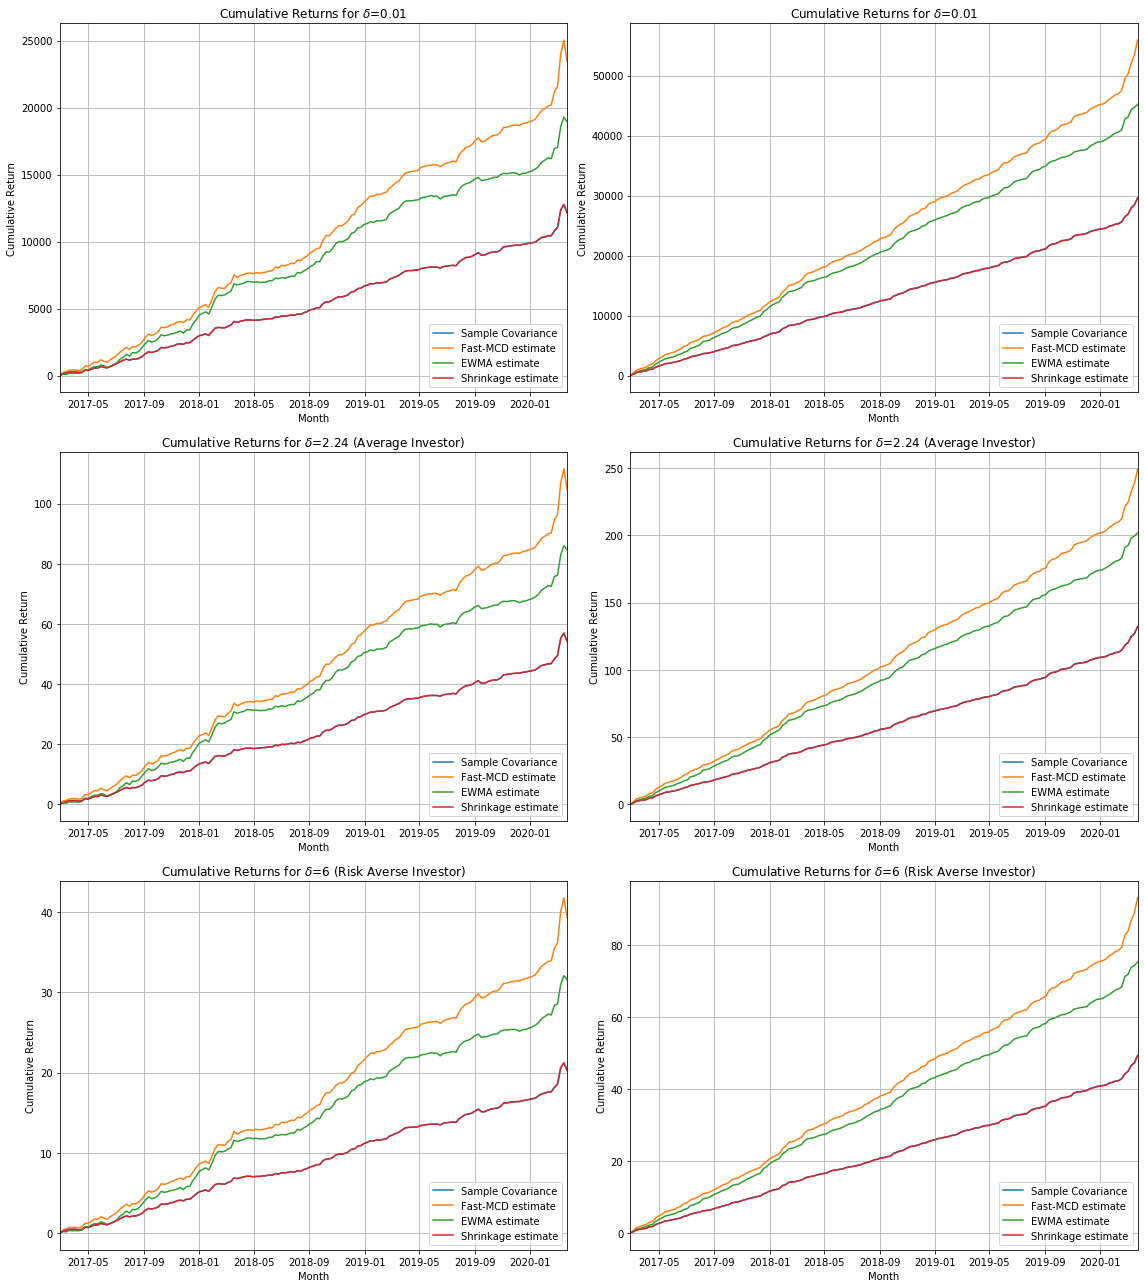

In [262]:
plt.figure(figsize=(16, 18))

plt.subplot(321)
plt.plot(Date, cum_ret_rfviews[:, 0], label='Sample Covariance')
plt.plot(Date, cum_ret_rfviews[:, 1], label='Fast-MCD estimate')
plt.plot(Date, cum_ret_rfviews[:, 2], label='EWMA estimate')
plt.plot(Date, cum_ret_rfviews[:, 3], label='Shrinkage estimate')
plt.xlim(Date[0], Date[-1])
plt.xlabel('Month')
plt.ylabel('Cumulative Return')
plt.legend(loc='lower right')
plt.title('Cumulative Returns for $\delta$=0.01')
plt.grid(True)

plt.subplot(323)
plt.plot(Date, cum_ret_rfviews[:, 4], label='Sample Covariance')
plt.plot(Date, cum_ret_rfviews[:, 5], label='Fast-MCD estimate')
plt.plot(Date, cum_ret_rfviews[:, 6], label='EWMA estimate')
plt.plot(Date, cum_ret_rfviews[:, 7], label='Shrinkage estimate')
plt.xlim(Date[0], Date[-1])
plt.xlabel('Month')
plt.ylabel('Cumulative Return')
plt.legend(loc='lower right')
plt.title('Cumulative Returns for $\delta$=2.24 (Average Investor)')
plt.grid(True)

plt.subplot(325)
plt.plot(Date, cum_ret_rfviews[:, 8], label='Sample Covariance')
plt.plot(Date, cum_ret_rfviews[:, 9], label='Fast-MCD estimate')
plt.plot(Date, cum_ret_rfviews[:, 10], label='EWMA estimate')
plt.plot(Date, cum_ret_rfviews[:, 11], label='Shrinkage estimate')
plt.xlim(Date[0], Date[-1])
plt.xlabel('Month')
plt.ylabel('Cumulative Return')
plt.legend(loc='lower right')
plt.title('Cumulative Returns for $\delta$=6 (Risk Averse Investor)')
plt.grid(True)

plt.subplot(322)
plt.plot(Date, cum_ret_cqtviews[:, 0], label='Sample Covariance')
plt.plot(Date, cum_ret_cqtviews[:, 1], label='Fast-MCD estimate')
plt.plot(Date, cum_ret_cqtviews[:, 2], label='EWMA estimate')
plt.plot(Date, cum_ret_cqtviews[:, 3], label='Shrinkage estimate')
plt.xlim(Date[0], Date[-1])
plt.xlabel('Month')
plt.ylabel('Cumulative Return')
plt.legend(loc='lower right')
plt.title('Cumulative Returns for $\delta$=0.01')
plt.grid(True)

plt.subplot(324)
plt.plot(Date, cum_ret_cqtviews[:, 4], label='Sample Covariance')
plt.plot(Date, cum_ret_cqtviews[:, 5], label='Fast-MCD estimate')
plt.plot(Date, cum_ret_cqtviews[:, 6], label='EWMA estimate')
plt.plot(Date, cum_ret_cqtviews[:, 7], label='Shrinkage estimate')
plt.xlim(Date[0], Date[-1])
plt.xlabel('Month')
plt.ylabel('Cumulative Return')
plt.legend(loc='lower right')
plt.title('Cumulative Returns for $\delta$=2.24 (Average Investor)')
plt.grid(True)

plt.subplot(326)
plt.plot(Date, cum_ret_cqtviews[:, 8], label='Sample Covariance')
plt.plot(Date, cum_ret_cqtviews[:, 9], label='Fast-MCD estimate')
plt.plot(Date, cum_ret_cqtviews[:, 10], label='EWMA estimate')
plt.plot(Date, cum_ret_cqtviews[:, 11], label='Shrinkage estimate')
plt.xlim(Date[0], Date[-1])
plt.xlabel('Month')
plt.ylabel('Cumulative Return')
plt.legend(loc='lower right')
plt.title('Cumulative Returns for $\delta$=6 (Risk Averse Investor)')
plt.grid(True)
plt.tight_layout()
plt.savefig('figure7.png', bbox_inches='tight')

## Compute out of sample performance of Constrained BL portfolio based on Random Forest views

In [160]:
from scipy.optimize import minimize

In [161]:
def portopt(mu_bl, sigma_bl, delta):
    def check_sum(weights):
        return np.sum(weights) - 1
    
    constraints = ({'type': 'eq', 'fun': check_sum})
    
    def objfunc(x):
        objvalue = (delta/2)*x.T@sigma_bl@x - mu_bl.T@x
        return objvalue
    
    x0 = np.ones((5, 1))/5
    
    bounds = ((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))
    
    opt_wts = minimize(objfunc, x0=x0, method='SLSQP', bounds=bounds, constraints=constraints)
    return opt_wts

In [162]:
def bl_wts(i, cov_choice, delta_choice):
    ret = xs_ret
    returns = ret.iloc[:-(pred_size+1)+i, :]
    switcher = {
        1: 0.01, 
        2: 2.24, 
        3: 6
    }
    delta = switcher.get(delta_choice, 'nothing')
    tau = 1/(data_size-(pred_size+1)+i)
    sigma = bl_cov(returns, cov_choice)
    
    mcap = np.array([38406.3, 77562.7, 34722.9, 3713.3, 6742.8])
    w_eqm = mcap/mcap.sum()
    
    pi = delta*sigma@w_eqm
    
    P = np.eye(5)
    Q = np.zeros(5)
    for k in range(5):
        A = P@pi
        B = P@sigma@P.T
        Q[k] = A[k] + pred.iloc[i, k]*np.sqrt(B.iloc[k, k])
    Omega = tau*np.diag(P@sigma@P.T)
    pi_est = pi + tau*sigma@P.T@np.linalg.inv((tau*P@sigma@P.T)+Omega)@(Q-P@pi)
    sigma_p = ((1+tau)*sigma) - (tau*tau*sigma@P.T)@np.linalg.inv((tau*P@sigma@P.T)+Omega)@(P@sigma)
    w = portopt(pi_est, sigma_p, delta).x
    return w, pi_est, sigma_p

In [163]:
measures_con = np.zeros((12, 11))
cum_ret_con = np.zeros((pred_size+1, 12))

In [164]:
weights1_con, measures_con[0, :], cum_ret_con[:, 0], _ = main_bl(1, 1)
weights2_con, measures_con[1, :], cum_ret_con[:, 1], _ = main_bl(2, 1)
weights3_con, measures_con[2, :], cum_ret_con[:, 2], _ = main_bl(3, 1)
weights4_con, measures_con[3, :], cum_ret_con[:, 3], _ = main_bl(4, 1)

In [165]:
weights5_con, measures_con[4, :], cum_ret_con[:, 4], _ = main_bl(1, 2)
weights6_con, measures_con[5, :], cum_ret_con[:, 5], _ = main_bl(2, 2)
weights7_con, measures_con[6, :], cum_ret_con[:, 6], _ = main_bl(3, 2)
weights8_con, measures_con[7, :], cum_ret_con[:, 7], _ = main_bl(4, 2)

In [166]:
weights9_con, measures_con[8, :], cum_ret_con[:, 8], _ = main_bl(1, 3)
weights10_con, measures_con[9, :], cum_ret_con[:, 9], _ = main_bl(2, 3)
weights11_con, measures_con[10, :], cum_ret_con[:, 10], _ = main_bl(3, 3)
weights12_con, measures_con[11, :], cum_ret_con[:, 11], _ = main_bl(4, 3)

In [217]:
np.savetxt('measures_con.csv', measures_con, delimiter=',')
np.savetxt('cum_ret_con.csv', cum_ret_con, delimiter=',')

In [227]:
for i in range(1, 13):
    np.savetxt('weights{}_con.csv'.format(i), names['weights{}_con'.format(i)], delimiter=',')

In [167]:
perf_con = pd.DataFrame(measures_con, index=perf_rfviews.index, columns=meas_col)
perf_con

Mean p.a (%)  SD p.a (%)  Skewness  Kurtosis  \
$\delta$ = 0.01 Sample        32.570679   13.508343 -0.622283  3.973373   
                Fast MCD      31.596242   14.300437 -0.713859  4.810389   
                EWMA          41.137419   13.397570 -0.537904  4.743666   
                Shrinkage     32.570662   13.508343 -0.622283  3.973373   
$\delta$ = 2.24 Sample        32.422067   13.521964 -0.614869  3.945920   
                Fast MCD      31.024639   14.193198 -0.733429  4.941228   
                EWMA          40.376869   13.283921 -0.566228  4.912562   
                Shrinkage     32.419221   13.522043 -0.614765  3.945736   
$\delta$ = 6    Sample        33.679408   13.587063 -0.637053  3.856078   
                Fast MCD      31.424440   13.947918 -0.792441  5.383312   
                EWMA          39.962125   13.375101 -0.573771  4.733694   
                Shrinkage     33.946411   13.613876 -0.635345  3.817933   

                           $\mu$/VaR  $\mu$/CVaR  Average HHI  Sharpe Ratio  \
$\delta$ = 0.01 Sample     -0.283188   -0.179050     0.872754      2.411153   
                Fast MCD   -0.274716   -0.159976     0.978742      2.209460   
                EWMA       -0.463266   -0.245251     0.945916      3.070514   
                Shrinkage  -0.283188   -0.179050     0.872755      2.411152   
$\delta$ = 2.24 Sample     -0.281896   -0.178019     0.868632      2.397734   
                Fast MCD   -0.269746   -0.157182     0.975599      2.185881   
                EWMA       -0.451398   -0.240717     0.939907      3.039529   
                Shrinkage  -0.281871   -0.178000     0.868761      2.397509   
$\delta$ = 6    Sample     -0.292828   -0.184529     0.877467      2.478785   
                Fast MCD   -0.276982   -0.159765     0.959988      2.252984   
                EWMA       -0.429162   -0.234079     0.926493      2.987800   
                Shrinkage  -0.295149   -0.185982     0.876547      2.493516   

                              Omega       MDD      Turnover  
$\delta$ = 0.01 Sample     2.437284  0.112739  1.082038e-17  
                Fast MCD   2.305761  0.123622 -6.056426e-18  
                EWMA       3.171685  0.112739 -1.631969e-18  
                Shrinkage  2.437284  0.112739  2.458795e-19  
$\delta$ = 2.24 Sample     2.430688  0.112739 -2.111857e-18  
                Fast MCD   2.283681  0.123405  1.668241e-19  
                EWMA       3.131749  0.112739  2.597278e-18  
                Shrinkage  2.430554  0.112739 -5.535063e-18  
$\delta$ = 6    Sample     2.487129  0.112739 -8.207306e-19  
                Fast MCD   2.357072  0.123303  1.665684e-18  
                EWMA       3.027464  0.112739  2.432526e-18  
                Shrinkage  2.498847  0.112739  1.046332e-18

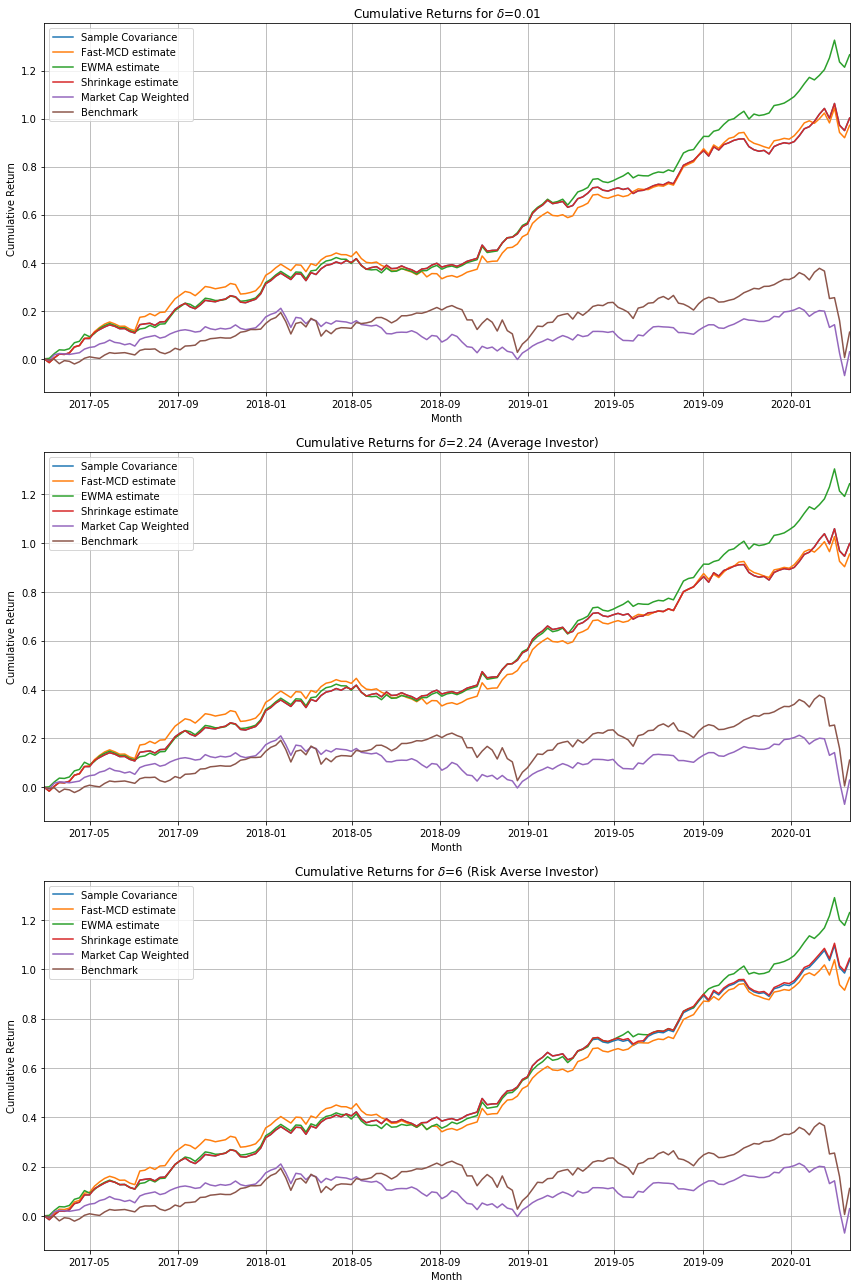

In [263]:
plt.figure(figsize=(12, 18))

plt.subplot(311)
plt.plot(Date, cum_ret_con[:, 0], label='Sample Covariance')
plt.plot(Date, cum_ret_con[:, 1], label='Fast-MCD estimate')
plt.plot(Date, cum_ret_con[:, 2], label='EWMA estimate')
plt.plot(Date, cum_ret_con[:, 3], label='Shrinkage estimate')
plt.plot(Date, cum_ret_mcap, label='Market Cap Weighted')
plt.plot(Date, cum_ret_bm, label='Benchmark')
plt.xlim(Date[0], Date[-1])
plt.xlabel('Month')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left')
plt.title('Cumulative Returns for $\delta$=0.01')
plt.grid(True)

plt.subplot(312)
plt.plot(Date, cum_ret_con[:, 4], label='Sample Covariance')
plt.plot(Date, cum_ret_con[:, 5], label='Fast-MCD estimate')
plt.plot(Date, cum_ret_con[:, 6], label='EWMA estimate')
plt.plot(Date, cum_ret_con[:, 7], label='Shrinkage estimate')
plt.plot(Date, cum_ret_mcap, label='Market Cap Weighted')
plt.plot(Date, cum_ret_bm, label='Benchmark')
plt.xlim(Date[0], Date[-1])
plt.xlabel('Month')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left')
plt.title('Cumulative Returns for $\delta$=2.24 (Average Investor)')
plt.grid(True)

plt.subplot(313)
plt.plot(Date, cum_ret_con[:, 8], label='Sample Covariance')
plt.plot(Date, cum_ret_con[:, 9], label='Fast-MCD estimate')
plt.plot(Date, cum_ret_con[:, 10], label='EWMA estimate')
plt.plot(Date, cum_ret_con[:, 11], label='Shrinkage estimate')
plt.plot(Date, cum_ret_mcap, label='Market Cap Weighted')
plt.plot(Date, cum_ret_bm, label='Benchmark')
plt.xlim(Date[0], Date[-1])
plt.xlabel('Month')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left')
plt.title('Cumulative Returns for $\delta$=6 (Risk Averse Investor)')
plt.grid(True)
plt.tight_layout()
plt.savefig('figure8.png', bbox_inches='tight')

In [169]:
cum_ret_con.max(axis=0).reshape(-1, 4)

array([[1.06303061, 1.04393097, 1.32662259, 1.06303008],
       [1.05845793, 1.02612535, 1.30322106, 1.05837035],
       [1.09714533, 1.03832547, 1.29045972, 1.10536082]])

In [170]:
print((weights1_con>1).any(), (weights2_con>1).any(), (weights3_con>1).any(), (weights4_con>1).any(), 
      (weights5_con>1).any(), (weights6_con>1).any(), (weights7_con>1).any(), (weights8_con>1).any(), 
      (weights9_con>1).any(), (weights10_con>1).any(), (weights11_con>1).any(), (weights12_con>1).any(), sep=', ')

False, False, False, False, False, False, False, False, False, False, False, False


In [171]:
print((weights1_con<0).any(), (weights2_con<0).any(), (weights3_con<0).any(), (weights4_con<0).any(), 
      (weights5_con<0).any(), (weights6_con<0).any(), (weights7_con<0).any(), (weights8_con<0).any(), 
      (weights9_con<0).any(), (weights10_con<0).any(), (weights11_con<0).any(), (weights12_con<0).any(), sep=', ')

False, False, False, False, False, False, False, False, False, False, False, False


## Compute out of sample performance of SR-BL portfolio based on Random Forest views

In [172]:
def portopt(mu_bl, sigma_bl, delta):
    def check_sum(weights):
        return np.sum(weights) - 1
    
    constraints = ({'type': 'eq', 'fun': check_sum})
    
    def objfunc(x):
        objvalue = -x.T@mu_bl/np.sqrt(delta*x.T@sigma_bl@x)
        return objvalue
    
    x0 = np.ones((5, 1))/5
    
    bounds = ((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))
    
    opt_wts = minimize(objfunc, x0=x0, method='SLSQP', bounds=bounds, constraints=constraints)
    return opt_wts

In [173]:
measures_sr = np.zeros((12, 11))
cum_ret_sr = np.zeros((pred_size+1, 12))

In [174]:
weights1_sr, measures_sr[0, :], cum_ret_sr[:, 0], _ = main_bl(1, 1)
weights2_sr, measures_sr[1, :], cum_ret_sr[:, 1], _ = main_bl(2, 1)
weights3_sr, measures_sr[2, :], cum_ret_sr[:, 2], _ = main_bl(3, 1)
weights4_sr, measures_sr[3, :], cum_ret_sr[:, 3], _ = main_bl(4, 1)

In [175]:
weights5_sr, measures_sr[4, :], cum_ret_sr[:, 4], _ = main_bl(1, 2)
weights6_sr, measures_sr[5, :], cum_ret_sr[:, 5], _ = main_bl(2, 2)
weights7_sr, measures_sr[6, :], cum_ret_sr[:, 6], _ = main_bl(3, 2)
weights8_sr, measures_sr[7, :], cum_ret_sr[:, 7], _ = main_bl(4, 2)

In [176]:
weights9_sr, measures_sr[8, :], cum_ret_sr[:, 8], _ = main_bl(1, 3)
weights10_sr, measures_sr[9, :], cum_ret_sr[:, 9], _ = main_bl(2, 3)
weights11_sr, measures_sr[10, :], cum_ret_sr[:, 10], _ = main_bl(3, 3)
weights12_sr, measures_sr[11, :], cum_ret_sr[:, 11], _ = main_bl(4, 3)

In [222]:
np.savetxt('measures_sr.csv', measures_sr, delimiter=',')
np.savetxt('cum_ret_sr.csv', cum_ret_sr, delimiter=',')

In [228]:
for i in range(1, 13):
    np.savetxt('weights{}_sr.csv'.format(i), names['weights{}_sr'.format(i)], delimiter=',')

In [177]:
perf_sr = pd.DataFrame(measures_sr, index=perf_rfviews.index, columns=meas_col)
perf_sr

Mean p.a (%)  SD p.a (%)  Skewness   Kurtosis  \
$\delta$ = 0.01 Sample        33.092216   11.703588 -0.720334   8.486301   
                Fast MCD      31.740721   12.357983 -1.537091  14.298486   
                EWMA          31.108875   11.376933 -0.778298   9.011054   
                Shrinkage     33.254223   11.697223 -0.726198   8.490880   
$\delta$ = 2.24 Sample        33.095478   11.672773 -0.712917   8.598456   
                Fast MCD      31.774040   12.371792 -1.511014  14.299248   
                EWMA          30.984560   11.387344 -0.786970   9.020086   
                Shrinkage     33.267939   11.676612 -0.716413   8.575550   
$\delta$ = 6    Sample        33.066396   11.604425 -0.705326   8.862241   
                Fast MCD      32.521445   11.764481 -0.648649   8.315470   
                EWMA          30.587561   11.379740 -0.803652   9.124876   
                Shrinkage     33.212050   11.602240 -0.710402   8.853746   

                           $\mu$/VaR  $\mu$/CVaR  Average HHI  Sharpe Ratio  \
$\delta$ = 0.01 Sample     -0.404199   -0.221313     0.579502      2.827527   
                Fast MCD   -0.385287   -0.203357     0.603588      2.568439   
                EWMA       -0.459405   -0.212623     0.642146      2.734382   
                Shrinkage  -0.421396   -0.223365     0.578478      2.842916   
$\delta$ = 2.24 Sample     -0.431599   -0.223865     0.571407      2.835271   
                Fast MCD   -0.385691   -0.203619     0.599284      2.568265   
                EWMA       -0.456363   -0.211102     0.639992      2.720965   
                Shrinkage  -0.450717   -0.225593     0.571129      2.849109   
$\delta$ = 6    Sample     -0.474662   -0.228994     0.559988      2.849464   
                Fast MCD   -0.432960   -0.222423     0.590991      2.764376   
                EWMA       -0.448656   -0.207935     0.633691      2.687896   
                Shrinkage  -0.476753   -0.230766     0.559175      2.862555   

                              Omega       MDD      Turnover  
$\delta$ = 0.01 Sample     3.094822  0.112739  1.152620e-14  
                Fast MCD   2.831975  0.134989  5.242857e-15  
                EWMA       3.061333  0.121348  5.510098e-15  
                Shrinkage  3.108288  0.112739  5.201891e-15  
$\delta$ = 2.24 Sample     3.107738  0.112739  2.116214e-17  
                Fast MCD   2.838780  0.134989 -3.746553e-17  
                EWMA       3.044561  0.122277  2.783950e-17  
                Shrinkage  3.120022  0.112739  8.717890e-18  
$\delta$ = 6    Sample     3.132291  0.112739 -3.779231e-16  
                Fast MCD   2.961834  0.112739 -4.179644e-17  
                EWMA       3.004630  0.123861 -4.915881e-18  
                Shrinkage  3.144322  0.112739 -6.507724e-16

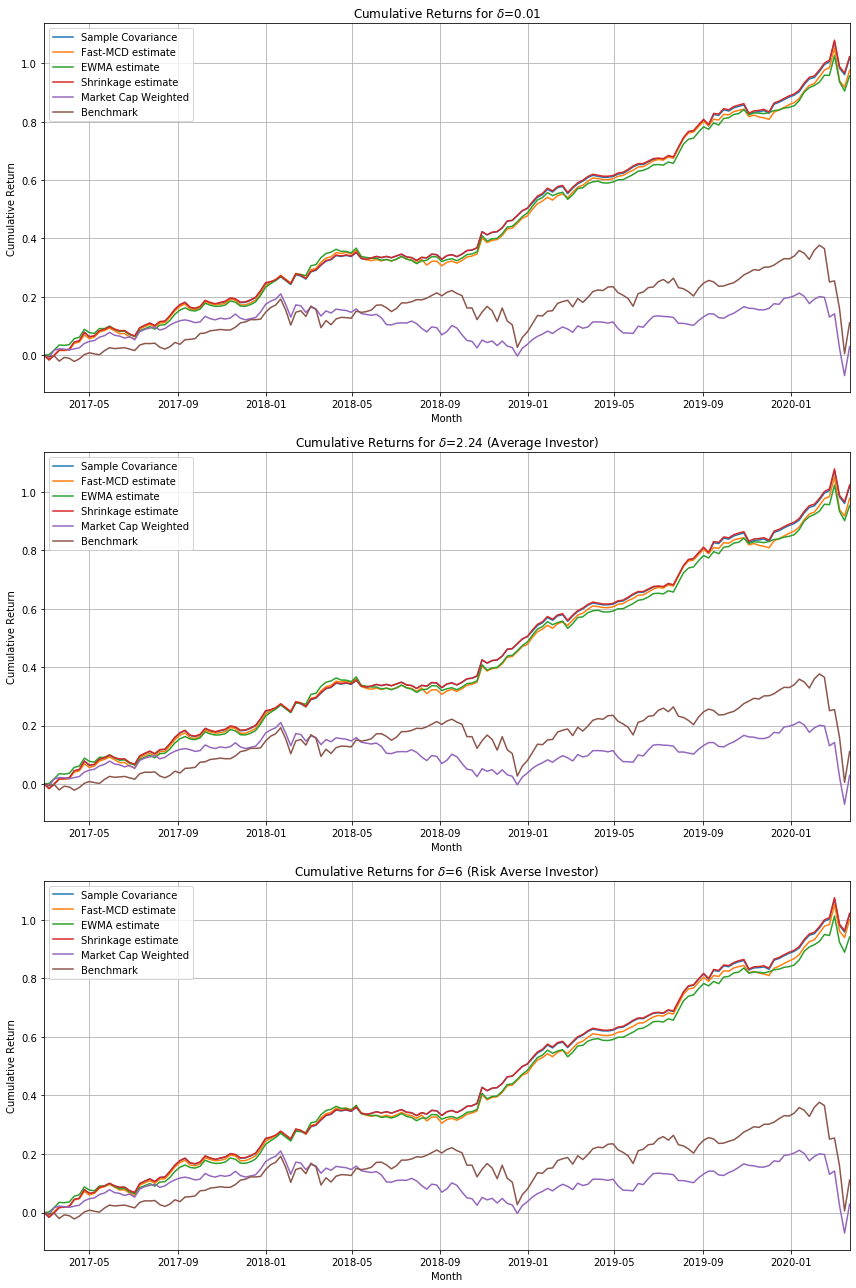

In [264]:
plt.figure(figsize=(12, 18))

plt.subplot(311)
plt.plot(Date, cum_ret_sr[:, 0], label='Sample Covariance')
plt.plot(Date, cum_ret_sr[:, 1], label='Fast-MCD estimate')
plt.plot(Date, cum_ret_sr[:, 2], label='EWMA estimate')
plt.plot(Date, cum_ret_sr[:, 3], label='Shrinkage estimate')
plt.plot(Date, cum_ret_mcap, label='Market Cap Weighted')
plt.plot(Date, cum_ret_bm, label='Benchmark')
plt.xlim(Date[0], Date[-1])
plt.xlabel('Month')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left')
plt.title('Cumulative Returns for $\delta$=0.01')
plt.grid(True)

plt.subplot(312)
plt.plot(Date, cum_ret_sr[:, 4], label='Sample Covariance')
plt.plot(Date, cum_ret_sr[:, 5], label='Fast-MCD estimate')
plt.plot(Date, cum_ret_sr[:, 6], label='EWMA estimate')
plt.plot(Date, cum_ret_sr[:, 7], label='Shrinkage estimate')
plt.plot(Date, cum_ret_mcap, label='Market Cap Weighted')
plt.plot(Date, cum_ret_bm, label='Benchmark')
plt.xlim(Date[0], Date[-1])
plt.xlabel('Month')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left')
plt.title('Cumulative Returns for $\delta$=2.24 (Average Investor)')
plt.grid(True)

plt.subplot(313)
plt.plot(Date, cum_ret_sr[:, 8], label='Sample Covariance')
plt.plot(Date, cum_ret_sr[:, 9], label='Fast-MCD estimate')
plt.plot(Date, cum_ret_sr[:, 10], label='EWMA estimate')
plt.plot(Date, cum_ret_sr[:, 11], label='Shrinkage estimate')
plt.plot(Date, cum_ret_mcap, label='Market Cap Weighted')
plt.plot(Date, cum_ret_bm, label='Benchmark')
plt.xlim(Date[0], Date[-1])
plt.xlabel('Month')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left')
plt.title('Cumulative Returns for $\delta$=6 (Risk Averse Investor)')
plt.grid(True)
plt.tight_layout()
plt.savefig('figure9.png', bbox_inches='tight')

In [179]:
cum_ret_sr.max(axis=0).reshape(-1, 4)

array([[1.07415362, 1.05337014, 1.0266607 , 1.07961467],
       [1.07320733, 1.05248844, 1.02376481, 1.07896146],
       [1.07057907, 1.05175345, 1.0131335 , 1.07550397]])

In [180]:
print((weights1_sr>1).any(), (weights2_sr>1).any(), (weights3_sr>1).any(), (weights4_sr>1).any(), 
      (weights5_sr>1).any(), (weights6_sr>1).any(), (weights7_sr>1).any(), (weights8_sr>1).any(), 
      (weights9_sr>1).any(), (weights10_sr>1).any(), (weights11_sr>1).any(), (weights12_sr>1).any(), sep=', ')

False, False, False, False, False, False, False, False, False, False, False, False


In [181]:
print((weights1_sr<0).any(), (weights2_sr<0).any(), (weights3_sr<0).any(), (weights4_sr<0).any(), 
      (weights5_sr<0).any(), (weights6_sr<0).any(), (weights7_sr<0).any(), (weights8_sr<0).any(), 
      (weights9_sr<0).any(), (weights10_sr<0).any(), (weights11_sr<0).any(), (weights12_sr<0).any(), sep=', ')

False, False, False, False, False, False, False, False, False, False, False, False


## Compute out of sample performance of MVaR-BL portfolio based on Random Forest views

In [182]:
def portopt(mu_bl, sigma_bl, delta):
    def check_sum(weights):
        return np.sum(weights) - 1
    
    constraints = ({'type': 'eq', 'fun': check_sum})
    
    def objfunc(x):
        alpha = 0.05  # 1 - confidence level
        factor = stats.norm.ppf(alpha)
        objvalue = -x.T@mu_bl/(-(factor*np.sqrt(delta*x.T@sigma_bl@x)+x.T@mu_bl))
        return objvalue
    
    x0 = np.ones((5, 1))/5
    
    bounds = ((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))
    
    opt_wts = minimize(objfunc, x0=x0, method='SLSQP', bounds=bounds, constraints=constraints)
    return opt_wts

In [183]:
measures_MVaR = np.zeros((12, 11))
cum_ret_MVaR = np.zeros((pred_size+1, 12))

In [184]:
weights1_MVaR, measures_MVaR[0, :], cum_ret_MVaR[:, 0], _ = main_bl(1, 1)
weights2_MVaR, measures_MVaR[1, :], cum_ret_MVaR[:, 1], _ = main_bl(2, 1)
weights3_MVaR, measures_MVaR[2, :], cum_ret_MVaR[:, 2], _ = main_bl(3, 1)
weights4_MVaR, measures_MVaR[3, :], cum_ret_MVaR[:, 3], _ = main_bl(4, 1)

In [185]:
weights5_MVaR, measures_MVaR[4, :], cum_ret_MVaR[:, 4], _ = main_bl(1, 2)
weights6_MVaR, measures_MVaR[5, :], cum_ret_MVaR[:, 5], _ = main_bl(2, 2)
weights7_MVaR, measures_MVaR[6, :], cum_ret_MVaR[:, 6], _ = main_bl(3, 2)
weights8_MVaR, measures_MVaR[7, :], cum_ret_MVaR[:, 7], _ = main_bl(4, 2)

In [186]:
weights9_MVaR, measures_MVaR[8, :], cum_ret_MVaR[:, 8], _ = main_bl(1, 3)
weights10_MVaR, measures_MVaR[9, :], cum_ret_MVaR[:, 9], _ = main_bl(2, 3)
weights11_MVaR, measures_MVaR[10, :], cum_ret_MVaR[:, 10], _ = main_bl(3, 3)
weights12_MVaR, measures_MVaR[11, :], cum_ret_MVaR[:, 11], _ = main_bl(4, 3)

In [223]:
np.savetxt('measures_MVaR.csv', measures_MVaR, delimiter=',')
np.savetxt('cum_ret_MVaR.csv', cum_ret_MVaR, delimiter=',')

In [229]:
for i in range(1, 13):
    np.savetxt('weights{}_MVaR.csv'.format(i), names['weights{}_MVaR'.format(i)], delimiter=',')

In [187]:
perf_MVaR = pd.DataFrame(measures_MVaR, index=perf_rfviews.index, columns=meas_col)
perf_MVaR

Mean p.a (%)  SD p.a (%)  Skewness   Kurtosis  \
$\delta$ = 0.01 Sample        15.741233   12.469344 -1.320750  10.697619   
                Fast MCD      16.186743   11.635144 -0.420816   9.792209   
                EWMA          16.982050   10.478159 -1.379331  10.372221   
                Shrinkage     17.539938   12.586383 -1.222592  10.097418   
$\delta$ = 2.24 Sample        33.065395   11.785273 -0.704553   8.216166   
                Fast MCD      32.916812   11.715912 -0.707994   8.335823   
                EWMA          30.830371   11.851110 -1.057207   8.865514   
                Shrinkage     33.306044   11.767752 -0.713892   8.270667   
$\delta$ = 6    Sample        33.195753   11.591759 -0.709293   8.914618   
                Fast MCD      32.235801   11.744683 -0.646717   8.371493   
                EWMA          30.772140   11.400484 -0.813207   9.057367   
                Shrinkage     33.261257   11.600499 -0.712700   8.861614   

                           $\mu$/VaR  $\mu$/CVaR  Average HHI  Sharpe Ratio  \
$\delta$ = 0.01 Sample     -0.190916   -0.074584     0.414664      1.262395   
                Fast MCD   -0.188148   -0.094021     0.410051      1.391194   
                EWMA       -0.202488   -0.101145     0.407867      1.620709   
                Shrinkage  -0.212731   -0.085150     0.422517      1.393565   
$\delta$ = 2.24 Sample     -0.401366   -0.219680     0.574614      2.805654   
                Fast MCD   -0.391783   -0.226868     0.595340      2.809582   
                EWMA       -0.453908   -0.186197     0.629363      2.601475   
                Shrinkage  -0.404287   -0.221790     0.571959      2.830281   
$\delta$ = 6    Sample     -0.476519   -0.229879     0.560508      2.863737   
                Fast MCD   -0.419967   -0.221032     0.589730      2.744714   
                EWMA       -0.450338   -0.208585     0.638174      2.699196   
                Shrinkage  -0.477459   -0.231092     0.559258      2.867226   

                              Omega       MDD      Turnover  
$\delta$ = 0.01 Sample     1.714379  0.178232  1.963361e-17  
                Fast MCD   1.765126  0.112739 -3.298809e-13  
                EWMA       1.954264  0.121364  1.412018e-18  
                Shrinkage  1.808147  0.177220  5.447945e-18  
$\delta$ = 2.24 Sample     3.051605  0.112739  7.149667e-13  
                Fast MCD   3.000306  0.112739 -2.022767e-16  
                EWMA       2.932017  0.151775 -7.692751e-19  
                Shrinkage  3.084205  0.112739  2.184734e-13  
$\delta$ = 6    Sample     3.152541  0.112739  5.754543e-16  
                Fast MCD   2.944737  0.112739 -1.070389e-16  
                EWMA       3.005875  0.123823 -4.296437e-18  
                Shrinkage  3.147666  0.112739 -1.462377e-16

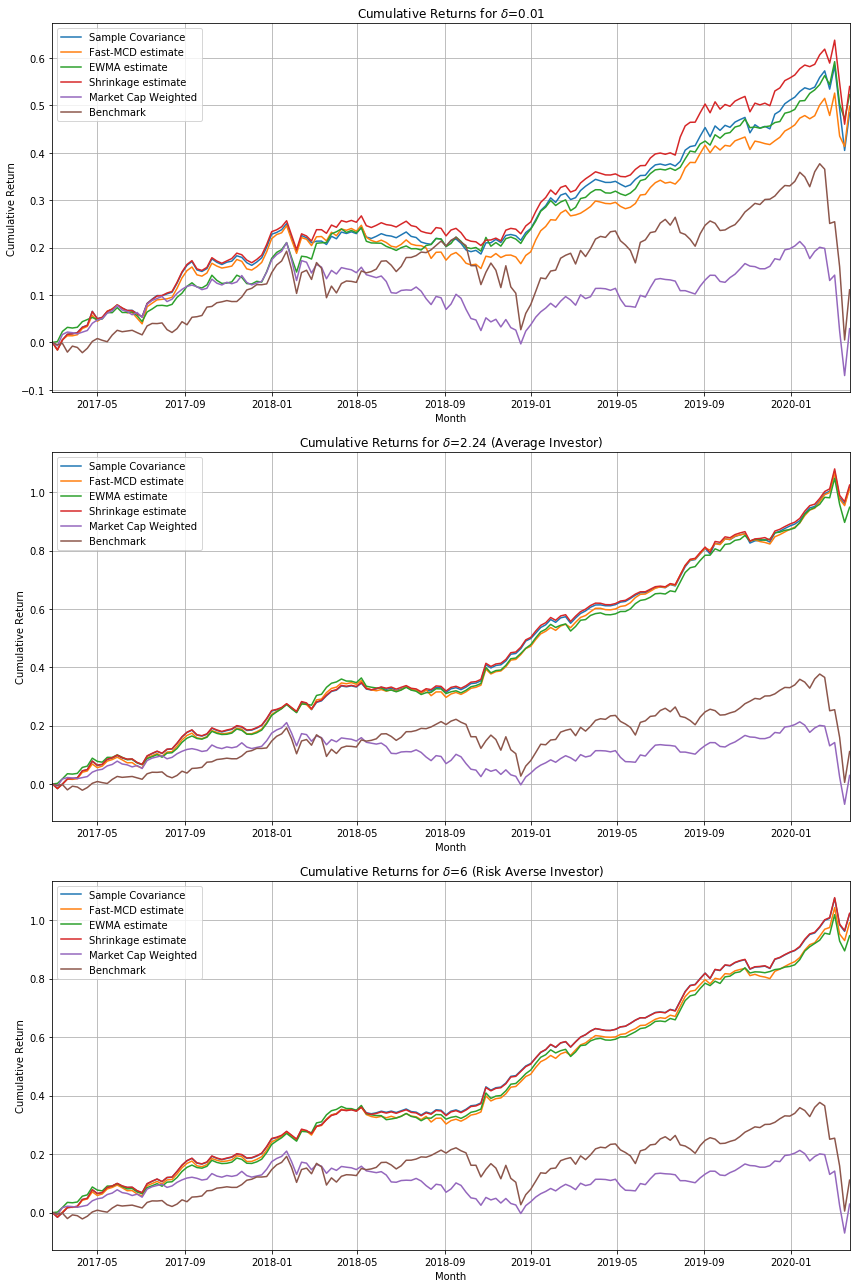

In [265]:
plt.figure(figsize=(12, 18))

plt.subplot(311)
plt.plot(Date, cum_ret_MVaR[:, 0], label='Sample Covariance')
plt.plot(Date, cum_ret_MVaR[:, 1], label='Fast-MCD estimate')
plt.plot(Date, cum_ret_MVaR[:, 2], label='EWMA estimate')
plt.plot(Date, cum_ret_MVaR[:, 3], label='Shrinkage estimate')
plt.plot(Date, cum_ret_mcap, label='Market Cap Weighted')
plt.plot(Date, cum_ret_bm, label='Benchmark')
plt.xlim(Date[0], Date[-1])
plt.xlabel('Month')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left')
plt.title('Cumulative Returns for $\delta$=0.01')
plt.grid(True)

plt.subplot(312)
plt.plot(Date, cum_ret_MVaR[:, 4], label='Sample Covariance')
plt.plot(Date, cum_ret_MVaR[:, 5], label='Fast-MCD estimate')
plt.plot(Date, cum_ret_MVaR[:, 6], label='EWMA estimate')
plt.plot(Date, cum_ret_MVaR[:, 7], label='Shrinkage estimate')
plt.plot(Date, cum_ret_mcap, label='Market Cap Weighted')
plt.plot(Date, cum_ret_bm, label='Benchmark')
plt.xlim(Date[0], Date[-1])
plt.xlabel('Month')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left')
plt.title('Cumulative Returns for $\delta$=2.24 (Average Investor)')
plt.grid(True)

plt.subplot(313)
plt.plot(Date, cum_ret_MVaR[:, 8], label='Sample Covariance')
plt.plot(Date, cum_ret_MVaR[:, 9], label='Fast-MCD estimate')
plt.plot(Date, cum_ret_MVaR[:, 10], label='EWMA estimate')
plt.plot(Date, cum_ret_MVaR[:, 11], label='Shrinkage estimate')
plt.plot(Date, cum_ret_mcap, label='Market Cap Weighted')
plt.plot(Date, cum_ret_bm, label='Benchmark')
plt.xlim(Date[0], Date[-1])
plt.xlabel('Month')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left')
plt.title('Cumulative Returns for $\delta$=6 (Risk Averse Investor)')
plt.grid(True)
plt.tight_layout()
plt.savefig('figure10.png', bbox_inches='tight')

In [189]:
cum_ret_MVaR.max(axis=0).reshape(-1, 4)

array([[0.58308485, 0.52581649, 0.59200513, 0.63733975],
       [1.07226339, 1.06704738, 1.04851793, 1.0801425 ],
       [1.0745693 , 1.04296296, 1.01877453, 1.07703252]])

In [190]:
print((weights1_MVaR>1).any(), (weights2_MVaR>1).any(), (weights3_MVaR>1).any(), (weights4_MVaR>1).any(), 
      (weights5_MVaR>1).any(), (weights6_MVaR>1).any(), (weights7_MVaR>1).any(), (weights8_MVaR>1).any(), 
      (weights9_MVaR>1).any(), (weights10_MVaR>1).any(), (weights11_MVaR>1).any(), (weights12_MVaR>1).any(), sep=', ')

False, False, False, False, False, False, False, False, False, False, False, False


In [191]:
print((weights1_MVaR<0).any(), (weights2_MVaR<0).any(), (weights3_MVaR<0).any(), (weights4_MVaR<0).any(), 
      (weights5_MVaR<0).any(), (weights6_MVaR<0).any(), (weights7_MVaR<0).any(), (weights8_MVaR<0).any(), 
      (weights9_MVaR<0).any(), (weights10_MVaR<0).any(), (weights11_MVaR<0).any(), (weights12_MVaR<0).any(), sep=', ')

False, False, False, False, False, False, False, False, False, False, False, False


## Compute out of sample performance of MCVaR-BL portfolio based on Random Forest views

In [192]:
def portopt(mu_bl, sigma_bl, delta):
    def check_sum(weights):
        return np.sum(weights) - 1
    
    constraints = ({'type': 'eq', 'fun': check_sum})
    
    def objfunc(x):
        alpha = 0.05
        factor = -stats.norm.pdf(stats.norm.ppf(alpha))/(1-alpha)
        objvalue = -x.T@mu_bl/(-(factor*np.sqrt(delta*x.T@sigma_bl@x)+x.T@mu_bl))
        return objvalue
    
    x0 = np.ones((5, 1))/5
    
    bounds = ((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))
    
    opt_wts = minimize(objfunc, x0=x0, method='SLSQP', bounds=bounds, constraints=constraints)
    return opt_wts

In [193]:
measures_MCVaR = np.zeros((12, 11))
cum_ret_MCVaR = np.zeros((pred_size+1, 12))

In [194]:
weights1_MCVaR, measures_MCVaR[0, :], cum_ret_MCVaR[:, 0], _ = main_bl(1, 1)
weights2_MCVaR, measures_MCVaR[1, :], cum_ret_MCVaR[:, 1], _ = main_bl(2, 1)
weights3_MCVaR, measures_MCVaR[2, :], cum_ret_MCVaR[:, 2], _ = main_bl(3, 1)
weights4_MCVaR, measures_MCVaR[3, :], cum_ret_MCVaR[:, 3], _ = main_bl(4, 1)

In [195]:
weights5_MCVaR, measures_MCVaR[4, :], cum_ret_MCVaR[:, 4], _ = main_bl(1, 2)
weights6_MCVaR, measures_MCVaR[5, :], cum_ret_MCVaR[:, 5], _ = main_bl(2, 2)
weights7_MCVaR, measures_MCVaR[6, :], cum_ret_MCVaR[:, 6], _ = main_bl(3, 2)
weights8_MCVaR, measures_MCVaR[7, :], cum_ret_MCVaR[:, 7], _ = main_bl(4, 2)

In [196]:
weights9_MCVaR, measures_MCVaR[8, :], cum_ret_MCVaR[:, 8], _ = main_bl(1, 3)
weights10_MCVaR, measures_MCVaR[9, :], cum_ret_MCVaR[:, 9], _ = main_bl(2, 3)
weights11_MCVaR, measures_MCVaR[10, :], cum_ret_MCVaR[:, 10], _ = main_bl(3, 3)
weights12_MCVaR, measures_MCVaR[11, :], cum_ret_MCVaR[:, 11], _ = main_bl(4, 3)

In [224]:
np.savetxt('measures_MCVaR.csv', measures_MCVaR, delimiter=',')
np.savetxt('cum_ret_MCVaR.csv', cum_ret_MCVaR, delimiter=',')

In [230]:
for i in range(1, 13):
    np.savetxt('weights{}_MCVaR.csv'.format(i), names['weights{}_MCVaR'.format(i)], delimiter=',')

In [197]:
perf_MCVaR = pd.DataFrame(measures_MCVaR, index=perf_rfviews.index, columns=meas_col)
perf_MCVaR

Mean p.a (%)  SD p.a (%)  Skewness   Kurtosis  \
$\delta$ = 0.01 Sample        22.672639   12.356357 -0.186092   8.331655   
                Fast MCD      20.573435   12.782978  0.160729  15.863251   
                EWMA          17.620151   11.007709 -1.310982   8.414371   
                Shrinkage     23.514241   11.993185 -0.487981   8.960668   
$\delta$ = 2.24 Sample        16.801420   12.607445 -1.282502  10.530633   
                Fast MCD      17.370809   11.715979 -0.415082   9.615556   
                EWMA          16.986592   10.553197 -1.356535  10.081858   
                Shrinkage     17.083362   12.505768 -1.305789  10.639706   
$\delta$ = 6    Sample        17.578215   13.134374 -1.572108  11.708600   
                Fast MCD      16.730439   11.627506 -0.461159   9.606873   
                EWMA          15.916804   10.696727 -1.411305   9.831000   
                Shrinkage     17.067559   12.568314 -1.268902  10.330305   

                           $\mu$/VaR  $\mu$/CVaR  Average HHI  Sharpe Ratio  \
$\delta$ = 0.01 Sample     -0.261534   -0.129222     0.447510      1.834897   
                Fast MCD   -0.231369   -0.117999     0.468152      1.609440   
                EWMA       -0.196720   -0.099316     0.454647      1.600710   
                Shrinkage  -0.271860   -0.135434     0.453843      1.960634   
$\delta$ = 2.24 Sample     -0.203774   -0.079817     0.415514      1.332659   
                Fast MCD   -0.202801   -0.100095     0.406953      1.482660   
                EWMA       -0.203998   -0.100943     0.414567      1.609616   
                Shrinkage  -0.207194   -0.082553     0.413246      1.366039   
$\delta$ = 6    Sample     -0.213195   -0.080365     0.420901      1.338337   
                Fast MCD   -0.197542   -0.096818     0.390519      1.438867   
                EWMA       -0.201395   -0.088593     0.403147      1.488007   
                Shrinkage  -0.207088   -0.081762     0.419112      1.357983   

                              Omega       MDD      Turnover  
$\delta$ = 0.01 Sample     2.144756  0.113233  4.326246e-09  
                Fast MCD   2.006478  0.124376 -1.911351e-09  
                EWMA       1.907862  0.130574  4.630702e-18  
                Shrinkage  2.246732  0.113265 -1.939611e-08  
$\delta$ = 2.24 Sample     1.768240  0.179450  4.467884e-10  
                Fast MCD   1.836346  0.112739  2.150734e-09  
                EWMA       1.937089  0.122308  5.472091e-18  
                Shrinkage  1.782055  0.178429  3.756140e-13  
$\delta$ = 6    Sample     1.789746  0.193584  1.133619e-12  
                Fast MCD   1.792111  0.112739  1.416641e-10  
                EWMA       1.846804  0.123836 -4.522282e-18  
                Shrinkage  1.786197  0.177820  2.115384e-08

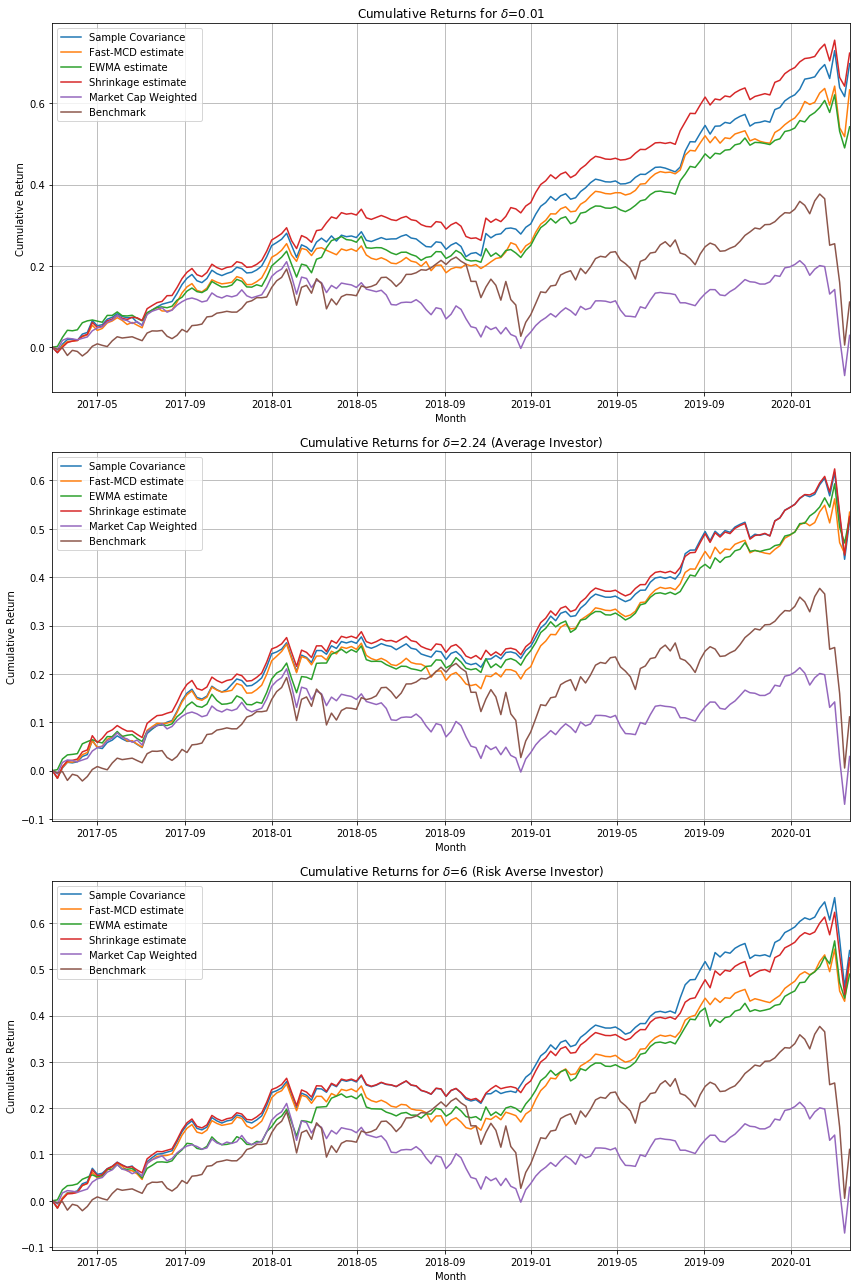

In [266]:
plt.figure(figsize=(12, 18))

plt.subplot(311)
plt.plot(Date, cum_ret_MCVaR[:, 0], label='Sample Covariance')
plt.plot(Date, cum_ret_MCVaR[:, 1], label='Fast-MCD estimate')
plt.plot(Date, cum_ret_MCVaR[:, 2], label='EWMA estimate')
plt.plot(Date, cum_ret_MCVaR[:, 3], label='Shrinkage estimate')
plt.plot(Date, cum_ret_mcap, label='Market Cap Weighted')
plt.plot(Date, cum_ret_bm, label='Benchmark')
plt.xlim(Date[0], Date[-1])
plt.xlabel('Month')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left')
plt.title('Cumulative Returns for $\delta$=0.01')
plt.grid(True)

plt.subplot(312)
plt.plot(Date, cum_ret_MCVaR[:, 4], label='Sample Covariance')
plt.plot(Date, cum_ret_MCVaR[:, 5], label='Fast-MCD estimate')
plt.plot(Date, cum_ret_MCVaR[:, 6], label='EWMA estimate')
plt.plot(Date, cum_ret_MCVaR[:, 7], label='Shrinkage estimate')
plt.plot(Date, cum_ret_mcap, label='Market Cap Weighted')
plt.plot(Date, cum_ret_bm, label='Benchmark')
plt.xlim(Date[0], Date[-1])
plt.xlabel('Month')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left')
plt.title('Cumulative Returns for $\delta$=2.24 (Average Investor)')
plt.grid(True)

plt.subplot(313)
plt.plot(Date, cum_ret_MCVaR[:, 8], label='Sample Covariance')
plt.plot(Date, cum_ret_MCVaR[:, 9], label='Fast-MCD estimate')
plt.plot(Date, cum_ret_MCVaR[:, 10], label='EWMA estimate')
plt.plot(Date, cum_ret_MCVaR[:, 11], label='Shrinkage estimate')
plt.plot(Date, cum_ret_mcap, label='Market Cap Weighted')
plt.plot(Date, cum_ret_bm, label='Benchmark')
plt.xlim(Date[0], Date[-1])
plt.xlabel('Month')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left')
plt.title('Cumulative Returns for $\delta$=6 (Risk Averse Investor)')
plt.grid(True)
plt.tight_layout()
plt.savefig('figure11.png', bbox_inches='tight')

In [199]:
cum_ret_MCVaR.max(axis=0).reshape(-1, 4)

array([[0.72960388, 0.64230689, 0.62084876, 0.75538349],
       [0.61642105, 0.56200214, 0.59308878, 0.62393115],
       [0.65518787, 0.54386342, 0.56170073, 0.62358921]])

In [200]:
print((weights1_MCVaR>1).any(), (weights2_MCVaR>1).any(), (weights3_MCVaR>1).any(), (weights4_MCVaR>1).any(), 
      (weights5_MCVaR>1).any(), (weights6_MCVaR>1).any(), (weights7_MCVaR>1).any(), (weights8_MCVaR>1).any(), 
      (weights9_MCVaR>1).any(), (weights10_MCVaR>1).any(), (weights11_MCVaR>1).any(), (weights12_MCVaR>1).any(), sep=', ')

False, False, False, False, False, False, False, False, False, False, False, False


In [201]:
print((weights1_MCVaR<0).any(), (weights2_MCVaR<0).any(), (weights3_MCVaR<0).any(), (weights4_MCVaR<0).any(), 
      (weights5_MCVaR<0).any(), (weights6_MCVaR<0).any(), (weights7_MCVaR<0).any(), (weights8_MCVaR<0).any(), 
      (weights9_MCVaR<0).any(), (weights10_MCVaR<0).any(), (weights11_MCVaR<0).any(), (weights12_MCVaR<0).any(), sep=', ')

False, False, False, False, False, False, False, False, False, False, False, False
